# Data Cleaning

In [1]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_1samp, shapiro, levene, f_oneway, kruskal, kstest
from statsmodels.stats.multicomp import MultiComparison

### Data Halal Indo

In [2]:
df_ina_halal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_indonesia_halal.csv')
df_ina_halal

Product_name Product_price  \
0         Indomie Mi Instan Rasa Soto Mie 70 gr x 40pcs     Rp127.300   
1                 Indomie Mi Instan Goreng 85 gr x 5pcs      Rp15.000   
2      Indomie Mi Instan Rasa Ayam Bawang 69 gr x 40pcs     Rp118.500   
3                Indomie Mi Instan Goreng 85 gr x 40pcs     Rp133.440   
4       Indomie Mi Instan Rasa Ayam Bawang 69 gr x 5pcs      Rp16.300   
...                                                 ...           ...   
1754  Sariayu White Aromatic All In One 150ml/Sariay...      Rp18.088   
1755  Sariayu Body Lotion Eksotik Tanjung Plus Refre...      Rp17.940   
1756  Paket 3in1 Sariayu Acne Care ( Lotion jerawat ...      Rp69.460   
1757  Obat Jerawat/SariAyu Anti Acne/Sariayu Intensi...      Rp22.462   
1758                      SARIAYU compact powder refill      Rp11.469   

       Product_sold Product_location     Product_category  
0     9,999 Terjual       Kota Depok      Makanan/minuman  
1     8,759 Terjual       Kota Depok      Makanan/minuman  
2     9,999 Terjual       Kota Depok      Makanan/minuman  
3     9,999 Terjual       Kota Depok      Makanan/minuman  
4     4,459 Terjual       Kota Depok      Makanan/minuman  
...             ...              ...                  ...  
1754    647 Terjual     Kab. Bandung  Kosmetik/kecantikan  
1755    421 Terjual     Kab. Bandung  Kosmetik/kecantikan  
1756    210 Terjual     Kab. Bandung  Kosmetik/kecantikan  
1757  5,212 Terjual     Kab. Bandung  Kosmetik/kecantikan  
1758  1,248 Terjual    Kab. Bandung  Kosmetik/kecantikan  

[1759 rows x 5 columns]

In [3]:
df_ina_halal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_name      1759 non-null   object
 1   Product_price     1759 non-null   object
 2   Product_sold      1699 non-null   object
 3   Product_location  1692 non-null   object
 4   Product_category  1759 non-null   object
dtypes: object(5)
memory usage: 68.8+ KB


In [4]:
df_ina_halal['Product_price'] = df_ina_halal['Product_price'].str.lstrip('Rp.')
df_ina_halal['Product_sold'] = df_ina_halal['Product_sold'].str.replace('Terjual', '')
df_ina_halal['Product_price'] = df_ina_halal['Product_price'].str.replace('.', '')
df_ina_halal['Product_sold'] = df_ina_halal['Product_sold'].str.replace(',', '')
df_ina_halal['Product_location'] = df_ina_halal['Product_location'].str.replace('', '')
df_ina_halal

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3712132496.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ina_halal['Product_price'] = df_ina_halal['Product_price'].str.replace('.', '')


Product_name Product_price  \
0         Indomie Mi Instan Rasa Soto Mie 70 gr x 40pcs        127300   
1                 Indomie Mi Instan Goreng 85 gr x 5pcs         15000   
2      Indomie Mi Instan Rasa Ayam Bawang 69 gr x 40pcs        118500   
3                Indomie Mi Instan Goreng 85 gr x 40pcs        133440   
4       Indomie Mi Instan Rasa Ayam Bawang 69 gr x 5pcs         16300   
...                                                 ...           ...   
1754  Sariayu White Aromatic All In One 150ml/Sariay...         18088   
1755  Sariayu Body Lotion Eksotik Tanjung Plus Refre...         17940   
1756  Paket 3in1 Sariayu Acne Care ( Lotion jerawat ...         69460   
1757  Obat Jerawat/SariAyu Anti Acne/Sariayu Intensi...         22462   
1758                      SARIAYU compact powder refill         11469   

     Product_sold Product_location     Product_category  
0           9999        Kota Depok      Makanan/minuman  
1           8759        Kota Depok      Makanan/minuman  
2           9999        Kota Depok      Makanan/minuman  
3           9999        Kota Depok      Makanan/minuman  
4           4459        Kota Depok      Makanan/minuman  
...           ...              ...                  ...  
1754         647      Kab. Bandung  Kosmetik/kecantikan  
1755         421      Kab. Bandung  Kosmetik/kecantikan  
1756         210      Kab. Bandung  Kosmetik/kecantikan  
1757        5212      Kab. Bandung  Kosmetik/kecantikan  
1758        1248      Kab. Bandung  Kosmetik/kecantikan  

[1759 rows x 5 columns]

In [5]:
df_ina_halal['Product_sold'] = pd.to_numeric(df_ina_halal['Product_sold'], errors='coerce')

In [6]:
df_ina_halal = df_ina_halal.drop(df_ina_halal[df_ina_halal['Product_sold'] == 0].index)
df_ina_halal = df_ina_halal.dropna()

In [7]:
df_ina_halal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [8]:
df_ina_halal['Product_price'] = df_ina_halal['Product_price'].astype(int)
df_ina_halal['Product_sold'] = df_ina_halal['Product_sold'].astype(int)

In [9]:
df_ina_halal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1758
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_name      1591 non-null   object
 1   Product_price     1591 non-null   int32 
 2   Product_sold      1591 non-null   int32 
 3   Product_location  1591 non-null   object
 4   Product_category  1591 non-null   object
dtypes: int32(2), object(3)
memory usage: 62.1+ KB


### Data Non-halal Indo

In [10]:
df_ina_nonhalal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_indonesia_nonhalal.csv')
df_ina_nonhalal

Product_name Product_price  \
0                           BINTANG BOTOL BESAR 620mili      Rp37.000   
1            BINTANG Anggur Merah Beer Bremer Bir 620ml      Rp49.000   
2                            Bir Bintang Pilsener 620ml      Rp42.000   
3                         BINTANG Pilsener kaleng 500ML      Rp28.000   
4                                     Bir Bintang 620ml      Rp40.500   
...                                                 ...           ...   
1646  [HALAL ] WULAMA Snack Camilan spicy Kulit tahu...      Rp18.800   
1647  Kellys Luncheon Ham Bacon Bits / Picante / Chi...      Rp52.500   
1648     gulong pork leg with mushroom 397 gr kaki babi      Rp45.999   
1649  GOLDEN BRIDGE LUNCHEON MEAT SINGAPORE, MULTIPA...     Rp299.500   
1650                       TTS MaLing ( Pork ) exp 2024      Rp31.650   

       Product_sold        Product_location  Product_category  
0       131 Terjual      kota jakarta barat  Makanann/minuman  
1         2 Terjual      kota jakarta utara  Makanann/minuman  
2     1,600 Terjual      kota jakarta barat  Makanann/minuman  
3       715 Terjual          kab. tangerang  Makanann/minuman  
4     1,500 Terjual           kota surabaya  Makanann/minuman  
...             ...                     ...               ...  
1646    232 Terjual          kota tangerang   Makanan/minuman  
1647    128 Terjual    kota jakarta selatan   Makanan/minuman  
1648     75 Terjual  kota tangerang selatan   Makanan/minuman  
1649     88 Terjual    kota jakarta selatan   Makanan/minuman  
1650  8,599 Terjual      kota jakarta utara   Makanan/minuman  

[1651 rows x 5 columns]

In [11]:
df_ina_nonhalal['Product_price'] = df_ina_nonhalal['Product_price'].str.lstrip('Rp.')
df_ina_nonhalal['Product_sold'] = df_ina_nonhalal['Product_sold'].str.replace('Terjual', '')
df_ina_nonhalal['Product_price'] = df_ina_nonhalal['Product_price'].str.replace('.', '')
df_ina_nonhalal['Product_sold'] = df_ina_nonhalal['Product_sold'].str.replace(',', '')
df_ina_nonhalal['Product_category'] = df_ina_nonhalal['Product_category'].replace('Makanann/minuman', 'Makanan/minuman')
df_ina_nonhalal

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3752699287.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ina_nonhalal['Product_price'] = df_ina_nonhalal['Product_price'].str.replace('.', '')


Product_name Product_price  \
0                           BINTANG BOTOL BESAR 620mili         37000   
1            BINTANG Anggur Merah Beer Bremer Bir 620ml         49000   
2                            Bir Bintang Pilsener 620ml         42000   
3                         BINTANG Pilsener kaleng 500ML         28000   
4                                     Bir Bintang 620ml         40500   
...                                                 ...           ...   
1646  [HALAL ] WULAMA Snack Camilan spicy Kulit tahu...         18800   
1647  Kellys Luncheon Ham Bacon Bits / Picante / Chi...         52500   
1648     gulong pork leg with mushroom 397 gr kaki babi         45999   
1649  GOLDEN BRIDGE LUNCHEON MEAT SINGAPORE, MULTIPA...        299500   
1650                       TTS MaLing ( Pork ) exp 2024         31650   

     Product_sold        Product_location Product_category  
0            131       kota jakarta barat  Makanan/minuman  
1              2       kota jakarta utara  Makanan/minuman  
2           1600       kota jakarta barat  Makanan/minuman  
3            715           kab. tangerang  Makanan/minuman  
4           1500            kota surabaya  Makanan/minuman  
...           ...                     ...              ...  
1646         232           kota tangerang  Makanan/minuman  
1647         128     kota jakarta selatan  Makanan/minuman  
1648          75   kota tangerang selatan  Makanan/minuman  
1649          88     kota jakarta selatan  Makanan/minuman  
1650        8599       kota jakarta utara  Makanan/minuman  

[1651 rows x 5 columns]

In [12]:
df_ina_nonhalal['Product_sold'] = pd.to_numeric(df_ina_nonhalal['Product_sold'], errors='coerce')

In [13]:
df_ina_nonhalal = df_ina_nonhalal.dropna()

In [14]:
df_ina_nonhalal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [15]:
df_ina_nonhalal['Product_price'] = df_ina_nonhalal['Product_price'].astype(int)
df_ina_nonhalal['Product_sold'] = df_ina_nonhalal['Product_sold'].astype(int)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\53628105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ina_nonhalal['Product_price'] = df_ina_nonhalal['Product_price'].astype(int)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\53628105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ina_nonhalal['Product_sold'] = df_ina_nonhalal['Product_sold'].astype(int)


In [16]:
df_ina_nonhalal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1650
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_name      1422 non-null   object
 1   Product_price     1422 non-null   int32 
 2   Product_sold      1422 non-null   int32 
 3   Product_location  1422 non-null   object
 4   Product_category  1422 non-null   object
dtypes: int32(2), object(3)
memory usage: 55.5+ KB


### Data Halal Malay

In [17]:
df_my_halal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_malaysia_halal.csv')
df_my_halal

Product_name Product_price  \
0               MAGGI Pedas Giler Roasted Chicken 5x76g        RM7.90   
1                 MAGGI 2-MINN Chicken 5 Packs 77g Each        RM4.70   
2                      MAGGI 2-MINN Asam Laksa 12X5X78G       RM57.80   
3                   MAGGI Nutrilicious Aglio Olio 5x77g        RM8.28   
4        MAGGI Marinade Paste Ayam Goreng Berempah 100g        RM4.40   
...                                                 ...           ...   
1755  Safi Naturals Facial Cleanser / Pembersih Muka...        RM9.30   
1756  Safi Hijabista Bodycare Antibacterial Deodoran...        RM7.80   
1757  SAFI Perfect White Light Foam Brightening Clea...        RM8.93   
1758  Safi Naturals Skincare Oil Control Gel Facial ...        RM9.49   
1759  NEUTROGENA DEEP CLEAN BRIGHTENING FOAMING CLEA...       RM18.99   

     Product_sold Product_location Product_category  
0      9,999 sold         Selangor  Makanan/minuman  
1      9,999 sold         Selangor  Makanan/minuman  
2      1,863 sold         Selangor  Makanan/minuman  
3        966 sold         Selangor  Makanan/minuman  
4        395 sold         Selangor  Makanan/minuman  
...           ...              ...              ...  
1755       0 sold         Selangor  Makanan/minuman  
1756      10 sold            Kedah  Makanan/minuman  
1757     154 sold         Selangor  Makanan/minuman  
1758      11 sold            Kedah  Makanan/minuman  
1759      53 sold            Kedah  Makanan/minuman  

[1760 rows x 5 columns]

In [18]:
df_my_halal['Product_price'] = df_my_halal['Product_price'].str.lstrip('RM')
df_my_halal['Product_sold'] = df_my_halal['Product_sold'].str.replace('sold', '')
# df_my_halal['Product_price'] = df_my_halal['Product_price'].str.replace('.', ',')
df_my_halal['Product_sold'] = df_my_halal['Product_sold'].str.replace(',', '')
df_my_halal

Product_name Product_price  \
0               MAGGI Pedas Giler Roasted Chicken 5x76g          7.90   
1                 MAGGI 2-MINN Chicken 5 Packs 77g Each          4.70   
2                      MAGGI 2-MINN Asam Laksa 12X5X78G         57.80   
3                   MAGGI Nutrilicious Aglio Olio 5x77g          8.28   
4        MAGGI Marinade Paste Ayam Goreng Berempah 100g          4.40   
...                                                 ...           ...   
1755  Safi Naturals Facial Cleanser / Pembersih Muka...          9.30   
1756  Safi Hijabista Bodycare Antibacterial Deodoran...          7.80   
1757  SAFI Perfect White Light Foam Brightening Clea...          8.93   
1758  Safi Naturals Skincare Oil Control Gel Facial ...          9.49   
1759  NEUTROGENA DEEP CLEAN BRIGHTENING FOAMING CLEA...         18.99   

     Product_sold Product_location Product_category  
0           9999          Selangor  Makanan/minuman  
1           9999          Selangor  Makanan/minuman  
2           1863          Selangor  Makanan/minuman  
3            966          Selangor  Makanan/minuman  
4            395          Selangor  Makanan/minuman  
...           ...              ...              ...  
1755           0          Selangor  Makanan/minuman  
1756          10             Kedah  Makanan/minuman  
1757         154          Selangor  Makanan/minuman  
1758          11             Kedah  Makanan/minuman  
1759          53             Kedah  Makanan/minuman  

[1760 rows x 5 columns]

In [19]:
df_my_halal['Product_sold'] = pd.to_numeric(df_my_halal['Product_sold'], errors='coerce')
df_my_halal['Product_price'] = pd.to_numeric(df_my_halal['Product_price'], errors='coerce')

In [20]:
df_my_halal

Product_name  Product_price  \
0               MAGGI Pedas Giler Roasted Chicken 5x76g           7.90   
1                 MAGGI 2-MINN Chicken 5 Packs 77g Each           4.70   
2                      MAGGI 2-MINN Asam Laksa 12X5X78G          57.80   
3                   MAGGI Nutrilicious Aglio Olio 5x77g           8.28   
4        MAGGI Marinade Paste Ayam Goreng Berempah 100g           4.40   
...                                                 ...            ...   
1755  Safi Naturals Facial Cleanser / Pembersih Muka...           9.30   
1756  Safi Hijabista Bodycare Antibacterial Deodoran...           7.80   
1757  SAFI Perfect White Light Foam Brightening Clea...           8.93   
1758  Safi Naturals Skincare Oil Control Gel Facial ...           9.49   
1759  NEUTROGENA DEEP CLEAN BRIGHTENING FOAMING CLEA...          18.99   

      Product_sold Product_location Product_category  
0           9999.0         Selangor  Makanan/minuman  
1           9999.0         Selangor  Makanan/minuman  
2           1863.0         Selangor  Makanan/minuman  
3            966.0         Selangor  Makanan/minuman  
4            395.0         Selangor  Makanan/minuman  
...            ...              ...              ...  
1755           0.0         Selangor  Makanan/minuman  
1756          10.0            Kedah  Makanan/minuman  
1757         154.0         Selangor  Makanan/minuman  
1758          11.0            Kedah  Makanan/minuman  
1759          53.0            Kedah  Makanan/minuman  

[1760 rows x 5 columns]

In [21]:
df_my_halal = df_my_halal.drop(df_my_halal[df_my_halal['Product_sold'] == 0].index)
df_my_halal = df_my_halal.dropna()

In [22]:
df_my_halal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [23]:
# df_my_halal['Product_sold'] = df_my_halal['Product_sold'].fillna(0)

In [24]:
df_my_halal['Product_price'] = df_my_halal['Product_price'].astype(float)
df_my_halal['Product_sold'] = df_my_halal['Product_sold'].astype(int)

In [25]:
df_my_halal

Product_name  Product_price  \
0               MAGGI Pedas Giler Roasted Chicken 5x76g           7.90   
1                 MAGGI 2-MINN Chicken 5 Packs 77g Each           4.70   
2                      MAGGI 2-MINN Asam Laksa 12X5X78G          57.80   
3                   MAGGI Nutrilicious Aglio Olio 5x77g           8.28   
4        MAGGI Marinade Paste Ayam Goreng Berempah 100g           4.40   
...                                                 ...            ...   
1754            Safi Skrub Muka Gel Habbatus Sauda 100G           9.90   
1756  Safi Hijabista Bodycare Antibacterial Deodoran...           7.80   
1757  SAFI Perfect White Light Foam Brightening Clea...           8.93   
1758  Safi Naturals Skincare Oil Control Gel Facial ...           9.49   
1759  NEUTROGENA DEEP CLEAN BRIGHTENING FOAMING CLEA...          18.99   

      Product_sold Product_location Product_category  
0             9999         Selangor  Makanan/minuman  
1             9999         Selangor  Makanan/minuman  
2             1863         Selangor  Makanan/minuman  
3              966         Selangor  Makanan/minuman  
4              395         Selangor  Makanan/minuman  
...            ...              ...              ...  
1754            50            Kedah  Makanan/minuman  
1756            10            Kedah  Makanan/minuman  
1757           154         Selangor  Makanan/minuman  
1758            11            Kedah  Makanan/minuman  
1759            53            Kedah  Makanan/minuman  

[1445 rows x 5 columns]

### Data Non-halal Malay

In [26]:
df_my_nonhalal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_malaysia_nonhalal.csv')
df_my_nonhalal

Product_name Product_price  \
0     [BBD: 2/7/2023] Kirin Ichiban Japanese Beer Ca...       RM59.99   
1               Carlsberg Danish Pilsner 320ml /per Can        RM6.99   
2               Carlsberg Danish Pilsner 320ml / 6 cans       RM39.99   
3       Erdinger Weissbier with Fine Yeast Beer (500ml)       RM22.50   
4        (Bestbefore:8/2023) Stella Artois Beer (330ml)       RM13.50   
...                                                 ...           ...   
1226  COSRX Centella Water Alcohol Free Toner 150ml ...       RM35.00   
1227               COSRX Sunny Snail Tone Up Cream 50ml       RM51.00   
1228  COSRX Full Fit Propolis Toner 280ML / Hydrium ...       RM27.70   
1229  Cosrx Acne Pimple Master Patch (24 patches) / ...        RM8.50   
1230  Cosrx Good Morning & Salicylic Acid Daily Gent...       RM26.50   

     Product_sold Product_location     Product_category  
0          5 sold         Selangor      Makanan/minuman  
1        134 sold       Terengganu      Makanan/minuman  
2         18 sold       Terengganu      Makanan/minuman  
3          5 sold         Selangor      Makanan/minuman  
4             NaN              NaN      Makanan/minuman  
...           ...              ...                  ...  
1226     108 sold  Wp Kuala Lumpur  Kosmetik/kecantikan  
1227      14 sold  Wp Kuala Lumpur  Kosmetik/kecantikan  
1228     133 sold         Selangor  Kosmetik/kecantikan  
1229     452 sold  Wp Kuala Lumpur  Kosmetik/kecantikan  
1230      74 sold  Wp Kuala Lumpur  Kosmetik/kecantikan  

[1231 rows x 5 columns]

In [27]:
df_my_nonhalal['Product_price'] = df_my_nonhalal['Product_price'].str.lstrip('RM')
df_my_nonhalal['Product_sold'] = df_my_nonhalal['Product_sold'].str.replace('sold', '')
df_my_nonhalal['Product_sold'] = df_my_nonhalal['Product_sold'].str.replace(',', '')
df_my_nonhalal

Product_name Product_price  \
0     [BBD: 2/7/2023] Kirin Ichiban Japanese Beer Ca...         59.99   
1               Carlsberg Danish Pilsner 320ml /per Can          6.99   
2               Carlsberg Danish Pilsner 320ml / 6 cans         39.99   
3       Erdinger Weissbier with Fine Yeast Beer (500ml)         22.50   
4        (Bestbefore:8/2023) Stella Artois Beer (330ml)         13.50   
...                                                 ...           ...   
1226  COSRX Centella Water Alcohol Free Toner 150ml ...         35.00   
1227               COSRX Sunny Snail Tone Up Cream 50ml         51.00   
1228  COSRX Full Fit Propolis Toner 280ML / Hydrium ...         27.70   
1229  Cosrx Acne Pimple Master Patch (24 patches) / ...          8.50   
1230  Cosrx Good Morning & Salicylic Acid Daily Gent...         26.50   

     Product_sold Product_location     Product_category  
0              5          Selangor      Makanan/minuman  
1            134        Terengganu      Makanan/minuman  
2             18        Terengganu      Makanan/minuman  
3              5          Selangor      Makanan/minuman  
4             NaN              NaN      Makanan/minuman  
...           ...              ...                  ...  
1226         108   Wp Kuala Lumpur  Kosmetik/kecantikan  
1227          14   Wp Kuala Lumpur  Kosmetik/kecantikan  
1228         133          Selangor  Kosmetik/kecantikan  
1229         452   Wp Kuala Lumpur  Kosmetik/kecantikan  
1230          74   Wp Kuala Lumpur  Kosmetik/kecantikan  

[1231 rows x 5 columns]

In [28]:
# df_my_nonhalal['Product_sold'] = df_my_nonhalal['Product_sold'].fillna(0)

In [29]:
df_my_nonhalal

Product_name Product_price  \
0     [BBD: 2/7/2023] Kirin Ichiban Japanese Beer Ca...         59.99   
1               Carlsberg Danish Pilsner 320ml /per Can          6.99   
2               Carlsberg Danish Pilsner 320ml / 6 cans         39.99   
3       Erdinger Weissbier with Fine Yeast Beer (500ml)         22.50   
4        (Bestbefore:8/2023) Stella Artois Beer (330ml)         13.50   
...                                                 ...           ...   
1226  COSRX Centella Water Alcohol Free Toner 150ml ...         35.00   
1227               COSRX Sunny Snail Tone Up Cream 50ml         51.00   
1228  COSRX Full Fit Propolis Toner 280ML / Hydrium ...         27.70   
1229  Cosrx Acne Pimple Master Patch (24 patches) / ...          8.50   
1230  Cosrx Good Morning & Salicylic Acid Daily Gent...         26.50   

     Product_sold Product_location     Product_category  
0              5          Selangor      Makanan/minuman  
1            134        Terengganu      Makanan/minuman  
2             18        Terengganu      Makanan/minuman  
3              5          Selangor      Makanan/minuman  
4             NaN              NaN      Makanan/minuman  
...           ...              ...                  ...  
1226         108   Wp Kuala Lumpur  Kosmetik/kecantikan  
1227          14   Wp Kuala Lumpur  Kosmetik/kecantikan  
1228         133          Selangor  Kosmetik/kecantikan  
1229         452   Wp Kuala Lumpur  Kosmetik/kecantikan  
1230          74   Wp Kuala Lumpur  Kosmetik/kecantikan  

[1231 rows x 5 columns]

In [30]:
df_my_nonhalal['Product_sold'] = pd.to_numeric(df_my_nonhalal['Product_sold'], errors='coerce')
df_my_nonhalal['Product_price'] = pd.to_numeric(df_my_nonhalal['Product_price'], errors='coerce')

In [31]:
df_my_nonhalal = df_my_nonhalal.drop(df_my_nonhalal[df_my_nonhalal['Product_sold'] == 0].index)
df_my_nonhalal = df_my_nonhalal.dropna()

In [32]:
df_my_nonhalal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [33]:
df_my_nonhalal['Product_price'] = df_my_nonhalal['Product_price'].astype(float)
df_my_nonhalal['Product_sold'] = df_my_nonhalal['Product_sold'].astype(int)
df_my_nonhalal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 1230
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      933 non-null    object 
 1   Product_price     933 non-null    float64
 2   Product_sold      933 non-null    int32  
 3   Product_location  933 non-null    object 
 4   Product_category  933 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 40.1+ KB


### Data Halal Sg

In [34]:
df_sg_halal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_singapore_halal.csv')
df_sg_halal

Product_name Product_price  \
0                     Cowhead Cheese Sandwich Crackers        $2.85    
1                          Cowhead Milk Cream Crackers        $2.85    
2                    Cowhead Cappuccino Butter Cookies        $2.85    
3                       Cowhead Crispy Cheese Crackers        $2.85    
4                       Cowhead Crispy Butter Crackers        $2.85    
..                                                 ...           ...   
569  Julies Oat 25 Biscuits With Ten Grains (Laz Ma...        $3.23    
570                         Julies Wheat Crackers 250g        $4.30    
571                     Julies Veggie Crackers Biscuit        $2.93    
572  Julies Cheese Milk Cracker Choco More Sandwich...        $6.90    
573  Julies Le-mond Cheddar Cheese Cream Puff Sandw...        $3.23    

    Product_sold Product_location Product_category  
0     9,999 sold        Singapore  Makanan/minuman  
1     9,999 sold        Singapore  Makanan/minuman  
2     9,999 sold        Singapore  Makanan/minuman  
3     8,135 sold        Singapore  Makanan/minuman  
4     6,547 sold        Singapore  Makanan/minuman  
..           ...              ...              ...  
569     142 sold        Singapore  Makanan/minuman  
570       0 sold        Singapore  Makanan/minuman  
571   2,416 sold        Singapore  Makanan/minuman  
572       0 sold        Singapore  Makanan/minuman  
573      13 sold        Singapore  Makanan/minuman  

[574 rows x 5 columns]

In [35]:
df_sg_halal['Product_price'] =df_sg_halal['Product_price'].str.lstrip('$')
df_sg_halal['Product_sold'] = df_sg_halal['Product_sold'].str.replace('sold', '')
df_sg_halal['Product_sold'] = df_sg_halal['Product_sold'].str.replace(',', '')
df_sg_halal

Product_name Product_price  \
0                     Cowhead Cheese Sandwich Crackers         2.85    
1                          Cowhead Milk Cream Crackers         2.85    
2                    Cowhead Cappuccino Butter Cookies         2.85    
3                       Cowhead Crispy Cheese Crackers         2.85    
4                       Cowhead Crispy Butter Crackers         2.85    
..                                                 ...           ...   
569  Julies Oat 25 Biscuits With Ten Grains (Laz Ma...         3.23    
570                         Julies Wheat Crackers 250g         4.30    
571                     Julies Veggie Crackers Biscuit         2.93    
572  Julies Cheese Milk Cracker Choco More Sandwich...         6.90    
573  Julies Le-mond Cheddar Cheese Cream Puff Sandw...         3.23    

    Product_sold Product_location Product_category  
0          9999         Singapore  Makanan/minuman  
1          9999         Singapore  Makanan/minuman  
2          9999         Singapore  Makanan/minuman  
3          8135         Singapore  Makanan/minuman  
4          6547         Singapore  Makanan/minuman  
..           ...              ...              ...  
569         142         Singapore  Makanan/minuman  
570           0         Singapore  Makanan/minuman  
571        2416         Singapore  Makanan/minuman  
572           0         Singapore  Makanan/minuman  
573          13         Singapore  Makanan/minuman  

[574 rows x 5 columns]

In [36]:
# df_sg_halal['Product_location'] = df_sg_halal['Product_location'].fillna('Singapore')
# df_sg_halal['Product_sold'] = df_sg_halal['Product_sold'].fillna(0)
# df_sg_halal

In [37]:
df_sg_halal['Product_sold'] = pd.to_numeric(df_sg_halal['Product_sold'], errors='coerce')
df_sg_halal['Product_price'] = pd.to_numeric(df_sg_halal['Product_price'], errors='coerce')

In [38]:
df_sg_halal

Product_name  Product_price  \
0                     Cowhead Cheese Sandwich Crackers           2.85   
1                          Cowhead Milk Cream Crackers           2.85   
2                    Cowhead Cappuccino Butter Cookies           2.85   
3                       Cowhead Crispy Cheese Crackers           2.85   
4                       Cowhead Crispy Butter Crackers           2.85   
..                                                 ...            ...   
569  Julies Oat 25 Biscuits With Ten Grains (Laz Ma...           3.23   
570                         Julies Wheat Crackers 250g           4.30   
571                     Julies Veggie Crackers Biscuit           2.93   
572  Julies Cheese Milk Cracker Choco More Sandwich...           6.90   
573  Julies Le-mond Cheddar Cheese Cream Puff Sandw...           3.23   

     Product_sold Product_location Product_category  
0          9999.0        Singapore  Makanan/minuman  
1          9999.0        Singapore  Makanan/minuman  
2          9999.0        Singapore  Makanan/minuman  
3          8135.0        Singapore  Makanan/minuman  
4          6547.0        Singapore  Makanan/minuman  
..            ...              ...              ...  
569         142.0        Singapore  Makanan/minuman  
570           0.0        Singapore  Makanan/minuman  
571        2416.0        Singapore  Makanan/minuman  
572           0.0        Singapore  Makanan/minuman  
573          13.0        Singapore  Makanan/minuman  

[574 rows x 5 columns]

In [39]:
df_sg_halal.isnull().sum()

Product_name         0
Product_price        0
Product_sold        42
Product_location     0
Product_category     0
dtype: int64

In [40]:
df_sg_halal = df_sg_halal.drop(df_sg_halal[df_sg_halal['Product_sold'] == 0].index)
df_sg_halal = df_sg_halal.dropna()

In [41]:
df_sg_halal['Product_price'] = df_sg_halal['Product_price'].astype(float)
df_sg_halal['Product_sold'] = df_sg_halal['Product_sold'].astype(int)
df_sg_halal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 573
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      421 non-null    object 
 1   Product_price     421 non-null    float64
 2   Product_sold      421 non-null    int32  
 3   Product_location  421 non-null    object 
 4   Product_category  421 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 18.1+ KB


### Data Non-halal Sg

In [42]:
df_sg_nonhalal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_singapore_nonhalal.csv')
df_sg_nonhalal

Product_name Product_price  \
0                       Monster Pipeline Punch (355ML)        $2.75    
1           Monster Pipeline Punch (24 X 355ML) - Case       $57.60    
2    MONSTER ENERGY PACIFIC PUNCH EUROPE 500ML X 24...       $59.90    
3    MONSTER ENERGY YELLOW RIPPER EUROPE 500ML X 24...       $59.90    
4    MONSTER ENERGY ULTRA GOLD EUROPE 500ML X 24 (C...       $65.90    
..                                                 ...           ...   
757  KORYOMART - [Ottogi] Jin Jjajang Ramen Cup 70g...        $1.60    
758                    Ottogi Low Calories Cup Noodles       $19.90    
759               Ottogi Real Cheese Ramen 135g x 4pkt        $9.70    
760  Ottogi Japchae Korean Traditional Instant Nood...        $3.50    
761  Ottogi Japchae Korean Traditional Instant Nood...       $24.00    

    Product_sold Product_location Product_category  
0     2,035 sold        Singapore  Makanan/minuman  
1       293 sold        Singapore  Makanan/minuman  
2            NaN              NaN  Makanan/minuman  
3         5 sold        Singapore  Makanan/minuman  
4         7 sold        Singapore  Makanan/minuman  
..           ...              ...              ...  
757      30 sold        Singapore  Makanan/minuman  
758          NaN              NaN  Makanan/minuman  
759      47 sold        Singapore  Makanan/minuman  
760      15 sold        Singapore  Makanan/minuman  
761       8 sold       Singapore  Makanan/minuman  

[762 rows x 5 columns]

In [43]:
df_sg_nonhalal['Product_price'] =df_sg_nonhalal['Product_price'].str.lstrip('$')
df_sg_nonhalal['Product_sold'] = df_sg_nonhalal['Product_sold'].str.replace('sold', '')
df_sg_nonhalal['Product_sold'] = df_sg_nonhalal['Product_sold'].str.replace(',', '')
df_sg_nonhalal['Product_location'] = df_sg_nonhalal['Product_location'].str.replace('', '')
df_sg_nonhalal

Product_name Product_price  \
0                       Monster Pipeline Punch (355ML)         2.75    
1           Monster Pipeline Punch (24 X 355ML) - Case        57.60    
2    MONSTER ENERGY PACIFIC PUNCH EUROPE 500ML X 24...        59.90    
3    MONSTER ENERGY YELLOW RIPPER EUROPE 500ML X 24...        59.90    
4    MONSTER ENERGY ULTRA GOLD EUROPE 500ML X 24 (C...        65.90    
..                                                 ...           ...   
757  KORYOMART - [Ottogi] Jin Jjajang Ramen Cup 70g...         1.60    
758                    Ottogi Low Calories Cup Noodles        19.90    
759               Ottogi Real Cheese Ramen 135g x 4pkt         9.70    
760  Ottogi Japchae Korean Traditional Instant Nood...         3.50    
761  Ottogi Japchae Korean Traditional Instant Nood...        24.00    

    Product_sold Product_location Product_category  
0          2035         Singapore  Makanan/minuman  
1           293         Singapore  Makanan/minuman  
2            NaN              NaN  Makanan/minuman  
3             5         Singapore  Makanan/minuman  
4             7         Singapore  Makanan/minuman  
..           ...              ...              ...  
757          30         Singapore  Makanan/minuman  
758          NaN              NaN  Makanan/minuman  
759          47         Singapore  Makanan/minuman  
760          15         Singapore  Makanan/minuman  
761           8         Singapore  Makanan/minuman  

[762 rows x 5 columns]

In [44]:
df_sg_nonhalal['Product_location'] = df_sg_nonhalal['Product_location'].fillna('Singapore')
# df_sg_nonhalal['Product_sold'] = df_sg_nonhalal['Product_sold'].fillna(0)
df_sg_nonhalal

Product_name Product_price  \
0                       Monster Pipeline Punch (355ML)         2.75    
1           Monster Pipeline Punch (24 X 355ML) - Case        57.60    
2    MONSTER ENERGY PACIFIC PUNCH EUROPE 500ML X 24...        59.90    
3    MONSTER ENERGY YELLOW RIPPER EUROPE 500ML X 24...        59.90    
4    MONSTER ENERGY ULTRA GOLD EUROPE 500ML X 24 (C...        65.90    
..                                                 ...           ...   
757  KORYOMART - [Ottogi] Jin Jjajang Ramen Cup 70g...         1.60    
758                    Ottogi Low Calories Cup Noodles        19.90    
759               Ottogi Real Cheese Ramen 135g x 4pkt         9.70    
760  Ottogi Japchae Korean Traditional Instant Nood...         3.50    
761  Ottogi Japchae Korean Traditional Instant Nood...        24.00    

    Product_sold Product_location Product_category  
0          2035         Singapore  Makanan/minuman  
1           293         Singapore  Makanan/minuman  
2            NaN        Singapore  Makanan/minuman  
3             5         Singapore  Makanan/minuman  
4             7         Singapore  Makanan/minuman  
..           ...              ...              ...  
757          30         Singapore  Makanan/minuman  
758          NaN        Singapore  Makanan/minuman  
759          47         Singapore  Makanan/minuman  
760          15         Singapore  Makanan/minuman  
761           8         Singapore  Makanan/minuman  

[762 rows x 5 columns]

In [45]:
df_sg_nonhalal['Product_sold'] = pd.to_numeric(df_sg_nonhalal['Product_sold'], errors='coerce')
df_sg_nonhalal['Product_price'] = pd.to_numeric(df_sg_nonhalal['Product_price'], errors='coerce')

In [46]:
df_sg_nonhalal = df_sg_nonhalal.dropna()

In [47]:
df_sg_nonhalal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [48]:
df_sg_nonhalal['Product_price'] = df_sg_nonhalal['Product_price'].astype(float)
df_sg_nonhalal['Product_sold'] = df_sg_nonhalal['Product_sold'].astype(int)
df_sg_nonhalal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 761
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      649 non-null    object 
 1   Product_price     649 non-null    float64
 2   Product_sold      649 non-null    int32  
 3   Product_location  649 non-null    object 
 4   Product_category  649 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 27.9+ KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\1471647323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sg_nonhalal['Product_price'] = df_sg_nonhalal['Product_price'].astype(float)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\1471647323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sg_nonhalal['Product_sold'] = df_sg_nonhalal['Product_sold'].astype(int)


### Data Halal Thai

In [49]:
df_th_halal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_thailand_halal.csv')
df_th_halal

Product_name Product_price  \
0                           Lucky Me Pancit Canton 80g        ?27.00   
1                        lucky Me Beef (Sept.10, 2023)        ?20.00   
2                Pancit Canton Kalamansi New Packaging        ?25.00   
3             Pancit Canton Chilimansi (New packaging)        ?25.00   
4     lucky me pancit canton original 80g(oct 17 2022)        ?25.00   
..                                                 ...           ...   
626  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรต้นตำรับ ผสมหญ...       ?279.00   
627  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...       ?359.00   
628  Hotta Fushion Ginger Match Latte ฮอทต้า ฟิวชั่...       ?138.00   
629  Hotta Fushion Ginger Lime ฮอทต้า ฟิวชั่น ขิงมะ...       ?138.00   
630  HOTTA น้ำขิงฮอทต้า เครื่องดื่มสมุนไพรขิงผงสำเร...       ?489.00   

    Product_sold Product_location Product_category  
0     1,193 sold          Bangkok  Makanan/minuman  
1       139 sold         Chonburi  Makanan/minuman  
2       404 sold          Bangkok  Makanan/minuman  
3       504 sold          Bangkok  Makanan/minuman  
4         7 sold         Chonburi  Makanan/minuman  
..           ...              ...              ...  
626      11 sold              NaN  Makanan/minuman  
627      55 sold     Kanchanaburi  Makanan/minuman  
628          NaN              NaN  Makanan/minuman  
629          NaN              NaN  Makanan/minuman  
630          NaN              NaN  Makanan/minuman  

[631 rows x 5 columns]

In [50]:
df_th_halal['Product_price'] =df_th_halal['Product_price'].str.lstrip('?')
df_th_halal['Product_sold'] = df_th_halal['Product_sold'].str.replace('sold', '')
df_th_halal['Product_sold'] = df_th_halal['Product_sold'].str.replace(',', '')
df_th_halal

Product_name Product_price  \
0                           Lucky Me Pancit Canton 80g         27.00   
1                        lucky Me Beef (Sept.10, 2023)         20.00   
2                Pancit Canton Kalamansi New Packaging         25.00   
3             Pancit Canton Chilimansi (New packaging)         25.00   
4     lucky me pancit canton original 80g(oct 17 2022)         25.00   
..                                                 ...           ...   
626  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรต้นตำรับ ผสมหญ...        279.00   
627  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...        359.00   
628  Hotta Fushion Ginger Match Latte ฮอทต้า ฟิวชั่...        138.00   
629  Hotta Fushion Ginger Lime ฮอทต้า ฟิวชั่น ขิงมะ...        138.00   
630  HOTTA น้ำขิงฮอทต้า เครื่องดื่มสมุนไพรขิงผงสำเร...        489.00   

    Product_sold Product_location Product_category  
0          1193           Bangkok  Makanan/minuman  
1           139          Chonburi  Makanan/minuman  
2           404           Bangkok  Makanan/minuman  
3           504           Bangkok  Makanan/minuman  
4             7          Chonburi  Makanan/minuman  
..           ...              ...              ...  
626          11               NaN  Makanan/minuman  
627          55      Kanchanaburi  Makanan/minuman  
628          NaN              NaN  Makanan/minuman  
629          NaN              NaN  Makanan/minuman  
630          NaN              NaN  Makanan/minuman  

[631 rows x 5 columns]

In [51]:
# df_th_halal['Product_sold'] = df_th_halal['Product_sold'].fillna(0)
df_th_halal['Product_location'] = df_th_halal['Product_location'].fillna('Bangkok')
df_th_halal

Product_name Product_price  \
0                           Lucky Me Pancit Canton 80g         27.00   
1                        lucky Me Beef (Sept.10, 2023)         20.00   
2                Pancit Canton Kalamansi New Packaging         25.00   
3             Pancit Canton Chilimansi (New packaging)         25.00   
4     lucky me pancit canton original 80g(oct 17 2022)         25.00   
..                                                 ...           ...   
626  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรต้นตำรับ ผสมหญ...        279.00   
627  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...        359.00   
628  Hotta Fushion Ginger Match Latte ฮอทต้า ฟิวชั่...        138.00   
629  Hotta Fushion Ginger Lime ฮอทต้า ฟิวชั่น ขิงมะ...        138.00   
630  HOTTA น้ำขิงฮอทต้า เครื่องดื่มสมุนไพรขิงผงสำเร...        489.00   

    Product_sold Product_location Product_category  
0          1193           Bangkok  Makanan/minuman  
1           139          Chonburi  Makanan/minuman  
2           404           Bangkok  Makanan/minuman  
3           504           Bangkok  Makanan/minuman  
4             7          Chonburi  Makanan/minuman  
..           ...              ...              ...  
626          11           Bangkok  Makanan/minuman  
627          55      Kanchanaburi  Makanan/minuman  
628          NaN          Bangkok  Makanan/minuman  
629          NaN          Bangkok  Makanan/minuman  
630          NaN          Bangkok  Makanan/minuman  

[631 rows x 5 columns]

In [52]:
df_th_halal['Product_sold'] = pd.to_numeric(df_th_halal['Product_sold'], errors='coerce')
df_th_halal['Product_price'] = pd.to_numeric(df_th_halal['Product_price'], errors='coerce')

In [53]:
df_th_halal = df_th_halal.dropna()

In [54]:
df_th_halal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [55]:
df_th_halal['Product_price'] = df_th_halal['Product_price'].astype(float)
df_th_halal['Product_sold'] = df_th_halal['Product_sold'].astype(int)
df_th_halal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 627
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      464 non-null    object 
 1   Product_price     464 non-null    float64
 2   Product_sold      464 non-null    int32  
 3   Product_location  464 non-null    object 
 4   Product_category  464 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 19.9+ KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3339288290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_th_halal['Product_price'] = df_th_halal['Product_price'].astype(float)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3339288290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_th_halal['Product_sold'] = df_th_halal['Product_sold'].astype(int)


### Data Non-halal Thai

In [56]:
df_th_nonhalal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Project\Code\All_thailand_nonhalal.csv')
df_th_nonhalal

Product_name Product_price  \
0    RED BULL Energy Drink (Europe Imported) เรดบูล...       ฿349.00   
1    เรดบูล เอ็กซ์ตร้า 170 มล. 24 ขวด ยกลัง RED BUL...       ฿349.00   
2    ใหม่ล่าสุด! กระทิงแดง เอ็กซ์ตร้า เอบีซี เครื่อ...       ฿133.00   
3    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส เมนโทลิปตัส 170 มล...       ฿348.00   
4    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส วอเตอร์เมลอน 170 ม...       ฿348.00   
..                                                 ...           ...   
566  ❤พร้อมส่ง ของอยู่ไทย❤ เถ้าแก่น้อย สาหร่ายทอดสล...       ?589.00   
567  ❗❗ของมีจำนวนจำกัด❗❗ เถ้าแก่น้อย TAO KAE NOI สา...     ?1,479.00   
568  ✨ของมีจำนวนจำกัด✨ สาหร่าย เถ้าแก่น้อย TAO KAE ...       ?809.00   
569  !!มาใหม่!! เถ้าแก่น้อย สาหร่ายเทมปุระ,TAO KAE ...       ?489.00   
570  ⚡ของมีจำนวนจำกัด⚡ สาหร่าย เถ้าแก่น้อย บิ๊กชีส ...       ?259.00   

    Product_sold Product_location Product_category  
0        90 sold     Samut Prakan  Makanan/minuman  
1     8,012 sold          Bangkok  Makanan/minuman  
2            NaN              NaN  Makanan/minuman  
3       100 sold          Bangkok  Makanan/minuman  
4       131 sold          Bangkok  Makanan/minuman  
..           ...              ...              ...  
566          NaN              NaN  Makanan/minuman  
567          NaN              NaN  Makanan/minuman  
568          NaN              NaN  Makanan/minuman  
569          NaN              NaN  Makanan/minuman  
570          NaN              NaN  Makanan/minuman  

[571 rows x 5 columns]

In [57]:
df_th_nonhalal['Product_price'] =df_th_nonhalal['Product_price'].str.lstrip('?')
df_th_nonhalal['Product_price'] =df_th_nonhalal['Product_price'].str.lstrip('฿')
df_th_nonhalal['Product_price'] = df_th_nonhalal['Product_price'].str.replace(',', '')
df_th_nonhalal['Product_sold'] = df_th_nonhalal['Product_sold'].str.replace('sold', '')
df_th_nonhalal['Product_sold'] = df_th_nonhalal['Product_sold'].str.replace(',', '')
df_th_nonhalal

Product_name Product_price  \
0    RED BULL Energy Drink (Europe Imported) เรดบูล...        349.00   
1    เรดบูล เอ็กซ์ตร้า 170 มล. 24 ขวด ยกลัง RED BUL...        349.00   
2    ใหม่ล่าสุด! กระทิงแดง เอ็กซ์ตร้า เอบีซี เครื่อ...        133.00   
3    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส เมนโทลิปตัส 170 มล...        348.00   
4    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส วอเตอร์เมลอน 170 ม...        348.00   
..                                                 ...           ...   
566  ❤พร้อมส่ง ของอยู่ไทย❤ เถ้าแก่น้อย สาหร่ายทอดสล...        589.00   
567  ❗❗ของมีจำนวนจำกัด❗❗ เถ้าแก่น้อย TAO KAE NOI สา...       1479.00   
568  ✨ของมีจำนวนจำกัด✨ สาหร่าย เถ้าแก่น้อย TAO KAE ...        809.00   
569  !!มาใหม่!! เถ้าแก่น้อย สาหร่ายเทมปุระ,TAO KAE ...        489.00   
570  ⚡ของมีจำนวนจำกัด⚡ สาหร่าย เถ้าแก่น้อย บิ๊กชีส ...        259.00   

    Product_sold Product_location Product_category  
0            90      Samut Prakan  Makanan/minuman  
1          8012           Bangkok  Makanan/minuman  
2            NaN              NaN  Makanan/minuman  
3           100           Bangkok  Makanan/minuman  
4           131           Bangkok  Makanan/minuman  
..           ...              ...              ...  
566          NaN              NaN  Makanan/minuman  
567          NaN              NaN  Makanan/minuman  
568          NaN              NaN  Makanan/minuman  
569          NaN              NaN  Makanan/minuman  
570          NaN              NaN  Makanan/minuman  

[571 rows x 5 columns]

In [58]:
# df_th_nonhalal['Product_sold'] = df_th_nonhalal['Product_sold'].fillna(0)
df_th_nonhalal['Product_location'] = df_th_nonhalal['Product_location'].fillna('Bangkok')
df_th_nonhalal

Product_name Product_price  \
0    RED BULL Energy Drink (Europe Imported) เรดบูล...        349.00   
1    เรดบูล เอ็กซ์ตร้า 170 มล. 24 ขวด ยกลัง RED BUL...        349.00   
2    ใหม่ล่าสุด! กระทิงแดง เอ็กซ์ตร้า เอบีซี เครื่อ...        133.00   
3    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส เมนโทลิปตัส 170 มล...        348.00   
4    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส วอเตอร์เมลอน 170 ม...        348.00   
..                                                 ...           ...   
566  ❤พร้อมส่ง ของอยู่ไทย❤ เถ้าแก่น้อย สาหร่ายทอดสล...        589.00   
567  ❗❗ของมีจำนวนจำกัด❗❗ เถ้าแก่น้อย TAO KAE NOI สา...       1479.00   
568  ✨ของมีจำนวนจำกัด✨ สาหร่าย เถ้าแก่น้อย TAO KAE ...        809.00   
569  !!มาใหม่!! เถ้าแก่น้อย สาหร่ายเทมปุระ,TAO KAE ...        489.00   
570  ⚡ของมีจำนวนจำกัด⚡ สาหร่าย เถ้าแก่น้อย บิ๊กชีส ...        259.00   

    Product_sold Product_location Product_category  
0            90      Samut Prakan  Makanan/minuman  
1          8012           Bangkok  Makanan/minuman  
2            NaN          Bangkok  Makanan/minuman  
3           100           Bangkok  Makanan/minuman  
4           131           Bangkok  Makanan/minuman  
..           ...              ...              ...  
566          NaN          Bangkok  Makanan/minuman  
567          NaN          Bangkok  Makanan/minuman  
568          NaN          Bangkok  Makanan/minuman  
569          NaN          Bangkok  Makanan/minuman  
570          NaN          Bangkok  Makanan/minuman  

[571 rows x 5 columns]

In [59]:
df_th_nonhalal['Product_sold'] = pd.to_numeric(df_th_nonhalal['Product_sold'], errors='coerce')
df_th_nonhalal['Product_price'] = pd.to_numeric(df_th_nonhalal['Product_price'], errors='coerce')

In [60]:
df_th_nonhalal

Product_name  Product_price  \
0    RED BULL Energy Drink (Europe Imported) เรดบูล...          349.0   
1    เรดบูล เอ็กซ์ตร้า 170 มล. 24 ขวด ยกลัง RED BUL...          349.0   
2    ใหม่ล่าสุด! กระทิงแดง เอ็กซ์ตร้า เอบีซี เครื่อ...          133.0   
3    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส เมนโทลิปตัส 170 มล...          348.0   
4    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส วอเตอร์เมลอน 170 ม...          348.0   
..                                                 ...            ...   
566  ❤พร้อมส่ง ของอยู่ไทย❤ เถ้าแก่น้อย สาหร่ายทอดสล...          589.0   
567  ❗❗ของมีจำนวนจำกัด❗❗ เถ้าแก่น้อย TAO KAE NOI สา...         1479.0   
568  ✨ของมีจำนวนจำกัด✨ สาหร่าย เถ้าแก่น้อย TAO KAE ...          809.0   
569  !!มาใหม่!! เถ้าแก่น้อย สาหร่ายเทมปุระ,TAO KAE ...          489.0   
570  ⚡ของมีจำนวนจำกัด⚡ สาหร่าย เถ้าแก่น้อย บิ๊กชีส ...          259.0   

     Product_sold Product_location Product_category  
0            90.0     Samut Prakan  Makanan/minuman  
1          8012.0          Bangkok  Makanan/minuman  
2             NaN          Bangkok  Makanan/minuman  
3           100.0          Bangkok  Makanan/minuman  
4           131.0          Bangkok  Makanan/minuman  
..            ...              ...              ...  
566           NaN          Bangkok  Makanan/minuman  
567           NaN          Bangkok  Makanan/minuman  
568           NaN          Bangkok  Makanan/minuman  
569           NaN          Bangkok  Makanan/minuman  
570           NaN          Bangkok  Makanan/minuman  

[571 rows x 5 columns]

In [61]:
df_th_nonhalal = df_th_nonhalal.dropna()

In [62]:
df_th_nonhalal.isnull().sum()

Product_name        0
Product_price       0
Product_sold        0
Product_location    0
Product_category    0
dtype: int64

In [63]:
df_th_nonhalal['Product_price'] = df_th_nonhalal['Product_price'].astype(float)
df_th_nonhalal['Product_sold'] = df_th_nonhalal['Product_sold'].astype(int)
df_th_nonhalal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 552
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      401 non-null    object 
 1   Product_price     401 non-null    float64
 2   Product_sold      401 non-null    int32  
 3   Product_location  401 non-null    object 
 4   Product_category  401 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 17.2+ KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\1636014141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_th_nonhalal['Product_price'] = df_th_nonhalal['Product_price'].astype(float)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\1636014141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_th_nonhalal['Product_sold'] = df_th_nonhalal['Product_sold'].astype(int)


In [64]:
# Export Data
# df_ina_halal.to_csv('All_indonesia_halal_fix.csv')
# df_ina_nonhalal.to_csv('All_indonesia_nonhalal_fix.csv')
# df_my_halal.to_csv('All_my_halal_fix.csv')
# df_my_nonhalal.to_csv('All_my_nonhalal_fix.csv')
# df_sg_halal.to_csv('All_sg_halal_fix.csv')
# df_sg_nonhalal.to_csv('All_sg_nonhalal_fix.csv')
# df_th_halal.to_csv('All_thai_halal_fix.csv')
# df_th_nonhalal.to_csv('All_thai_nonhalal_fix.csv')

# Data Pre-Processing & Data Exploratory

### Task list:
* Melihat deskripsi data 
* Melihat perbandingan jumlah kategori produk
* Melihat perbandingan jumlah penjualan berdasarkan kategori
* Melihat perbandingan revenue produk
* Melihat korelasi antar variabel
* Melihat distribusi data 

### (INA) Data Halal dan Non-halal Negara Indonesia

#### Data Halal Indonesia

In [65]:
df_ina_halal

Product_name  Product_price  \
0         Indomie Mi Instan Rasa Soto Mie 70 gr x 40pcs         127300   
1                 Indomie Mi Instan Goreng 85 gr x 5pcs          15000   
2      Indomie Mi Instan Rasa Ayam Bawang 69 gr x 40pcs         118500   
3                Indomie Mi Instan Goreng 85 gr x 40pcs         133440   
4       Indomie Mi Instan Rasa Ayam Bawang 69 gr x 5pcs          16300   
...                                                 ...            ...   
1754  Sariayu White Aromatic All In One 150ml/Sariay...          18088   
1755  Sariayu Body Lotion Eksotik Tanjung Plus Refre...          17940   
1756  Paket 3in1 Sariayu Acne Care ( Lotion jerawat ...          69460   
1757  Obat Jerawat/SariAyu Anti Acne/Sariayu Intensi...          22462   
1758                      SARIAYU compact powder refill          11469   

      Product_sold Product_location     Product_category  
0             9999       Kota Depok      Makanan/minuman  
1             8759       Kota Depok      Makanan/minuman  
2             9999       Kota Depok      Makanan/minuman  
3             9999       Kota Depok      Makanan/minuman  
4             4459       Kota Depok      Makanan/minuman  
...            ...              ...                  ...  
1754           647     Kab. Bandung  Kosmetik/kecantikan  
1755           421     Kab. Bandung  Kosmetik/kecantikan  
1756           210     Kab. Bandung  Kosmetik/kecantikan  
1757          5212     Kab. Bandung  Kosmetik/kecantikan  
1758          1248     Kab. Bandung  Kosmetik/kecantikan  

[1591 rows x 5 columns]

In [66]:
statistics.mode(df_ina_halal['Product_price'])

132500

In [67]:
statistics.mode(df_ina_halal['Product_location'])

'Kota Surabaya'

In [68]:
df_ina_halal.describe()

Product_price   Product_sold
count    1591.000000    1591.000000
mean    37177.370207    1815.934004
std     44921.218014    5207.360910
min      1000.000000       5.000000
25%      8550.000000      65.000000
50%     17377.000000     258.000000
75%     46800.000000    1252.000000
max    299000.000000  100000.000000

In [69]:
df_ina_halal.sort_values('Product_sold')

Product_name  Product_price  \
1683  Sariayu Acne Care Facial Foam 75gr Bisa Bayar ...          18499   
408                 NUTRISARI JERUK PERAS 14 GR X 5 PCS          10390   
193              MIE SEDAP REBUS AYAM BAWANG ISI 40pcs.         111500   
1415   Maybelline Fit Me Concealer Camouflant 103352133         106744   
571                    Roma Biscuit Kelapa Kaleng 345 g          46300   
...                                                 ...            ...   
1001           WARDAH Exlusive Matte Lip Cream Terlaris          15899   
1468  Maybelline Volum Express Hypercurl Waterproof ...          62900   
5                                     INDOMIE MI GORENG           3122   
1475  Maybelline Superstay Matte Ink Liquid Matte Li...          86200   
1401  COD promo lipstik maybelline/hold m/revlon pal...           5997   

      Product_sold      Product_location     Product_category  
1683             5         Kab. Sidoarjo  Kosmetik/kecantikan  
408              5  Kota Jakarta Selatan      Makanan/minuman  
193              5           Kab. Subang      Makanan/minuman  
1415             5        Kab. Tangerang  Kosmetik/kecantikan  
571              5        Kota Tangerang      Makanan/minuman  
...            ...                   ...                  ...  
1001          9999    Kota Jakarta Utara  Kosmetik/kecantikan  
1468          9999            Kota Depok  Kosmetik/kecantikan  
5           100000        Kab. Mojokerto      Makanan/minuman  
1475        100000            Kota Depok  Kosmetik/kecantikan  
1401        100000           Kab. Bekasi  Kosmetik/kecantikan  

[1591 rows x 5 columns]

<Axes: >

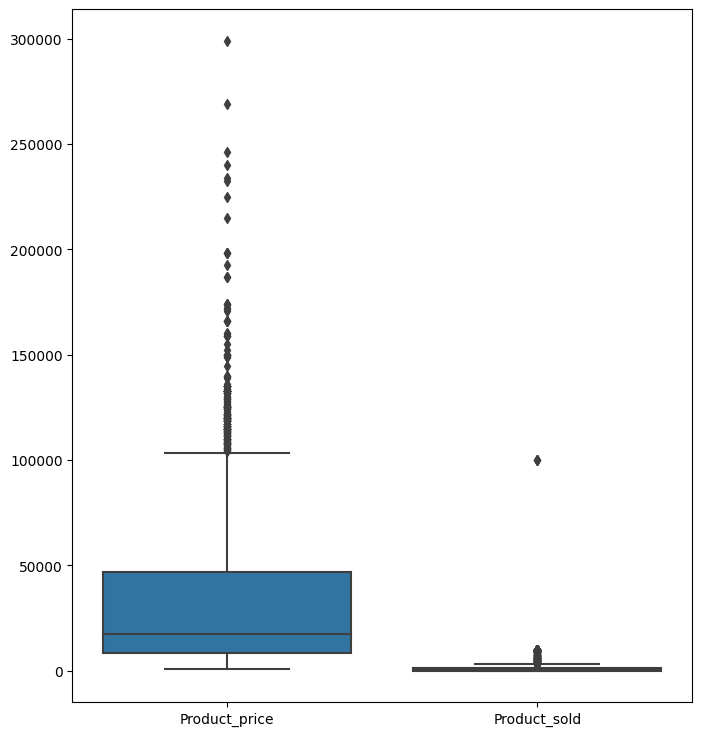

In [70]:
plt.figure(figsize=(8,9))
sns.boxplot(data = df_ina_halal[['Product_price', 'Product_sold']])

**Masih Terdapat Outlier pada Product_price dan Product_sold**

In [71]:
# df_ina_halal['Product_price'] = winsorize(df_ina_halal['Product_price'], (0.02, 0.2))

In [72]:
for i in range(0,2):
    Q1 = df_ina_halal['Product_price'].quantile(0.25)
    Q3 = df_ina_halal['Product_price'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df_ina_halal = df_ina_halal[(df_ina_halal['Product_price'] >= lower_bound) & (df_ina_halal['Product_price'] <= upper_bound)]
    i+=1

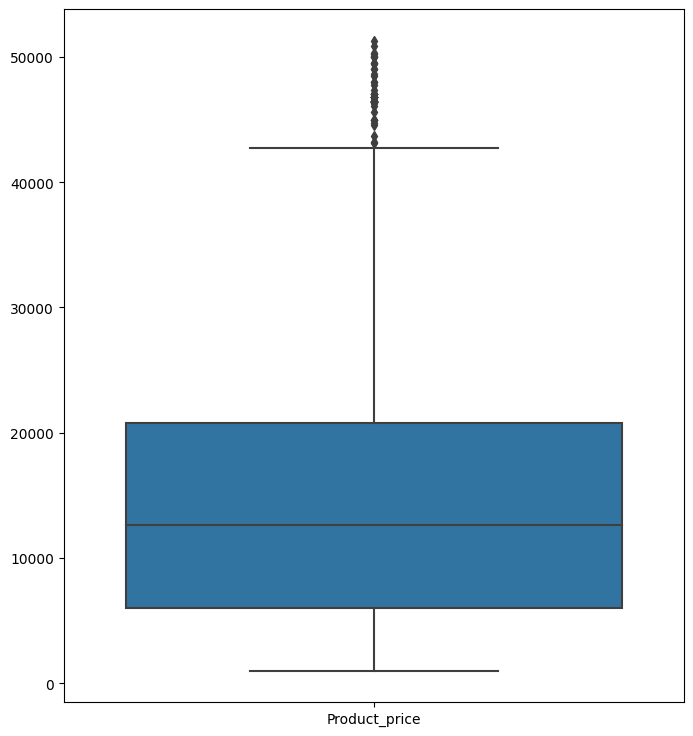

In [73]:
plt.figure(figsize=(8,9))
sns.boxplot(data = df_ina_halal[['Product_price']])
plt.show()

In [74]:
# df_ina_halal['Product_price'] = (df_ina_halal['Product_price'] - df_ina_halal['Product_price'].min())/(df_ina_halal['Product_price'].max() - df_ina_halal['Product_price'].min())

In [75]:
# df_ina_halal['Product_sold'] = winsorize(df_ina_halal['Product_sold'], (0.05, 0.2))

In [76]:
# for i in range(0,2):
#     Q1_1 = df_ina_halal['Product_sold'].quantile(0.25)
#     Q3_1 = df_ina_halal['Product_sold'].quantile(0.75)
#     IQR_1 = Q3_1-Q1_1
#     lower_1 = Q1_1 - 1.5*IQR_1
#     upper_1 = Q3_1 + 1.5*IQR_1

#     # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] < lower_1, lower_1, df_ina_halal['Product_price'])
#     # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] > upper_1, upper_1, df_ina_halal['Product_price'])
#     df_ina_halal = df_ina_halal[(df_ina_halal['Product_sold'] >= lower_1) & (df_ina_halal['Product_sold'] <= upper_1)]
#     i+=1

# median = np.median(df_ina_halal['Product_sold'])

# Q1 = df_ina_halal['Product_sold'].quantile(0.25)
# Q3 = df_ina_halal['Product_sold'].quantile(0.75)
# IQR = Q3-Q1
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# df_ina_halal['Product_sold'] = np.where((df_ina_halal['Product_sold'] < lower_bound) | (df_ina_halal['Product_sold'] > upper_bound), median, df_ina_halal['Product_sold'])


In [77]:
df_ina_halal = df_ina_halal.loc[(df_ina_halal['Product_sold'] >= 200) & (df_ina_halal['Product_sold'] <= 1200)]

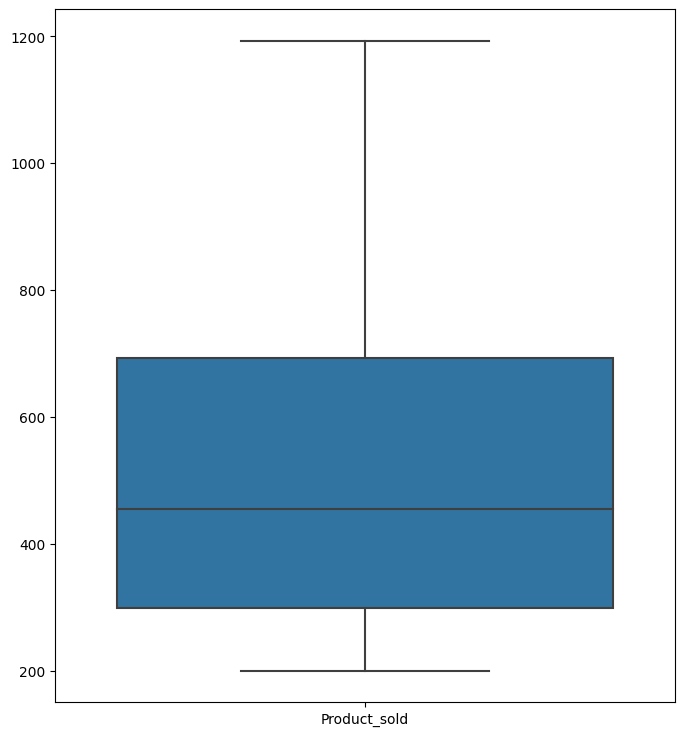

In [78]:
plt.figure(figsize=(8,9))
sns.boxplot(data = df_ina_halal[['Product_sold']])
plt.show()

In [79]:
df_ina_halal.describe()

Product_price  Product_sold
count     359.000000    359.000000
mean    13796.841226    524.732591
std     10566.538539    264.870266
min      1000.000000    200.000000
25%      5347.500000    298.000000
50%     11600.000000    455.000000
75%     18900.000000    692.500000
max     49500.000000   1193.000000

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\1327049103.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ina_halal.corr(), annot=True)


<Axes: >

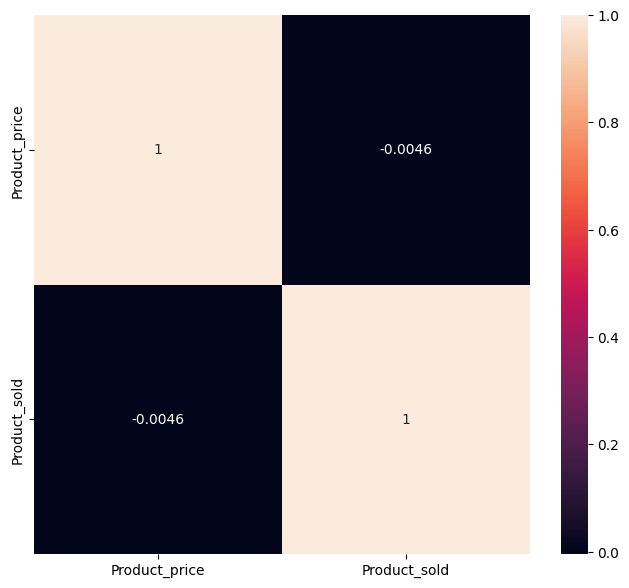

In [80]:
plt.figure(figsize=(8,7))
sns.heatmap(df_ina_halal.corr(), annot=True)

**Dari kolom produk halal Indonesia tidak ada yang memiliki korelasi di atas 0,5**

In [81]:
# Query
Category_ina_halal = df_ina_halal['Product_category'].value_counts()
Location_ina_halal = df_ina_halal['Product_location'].value_counts()
Sold_ina_halal = df_ina_halal.groupby('Product_category')['Product_sold'].sum()
Location_ina_halal = Location_ina_halal.head(5)

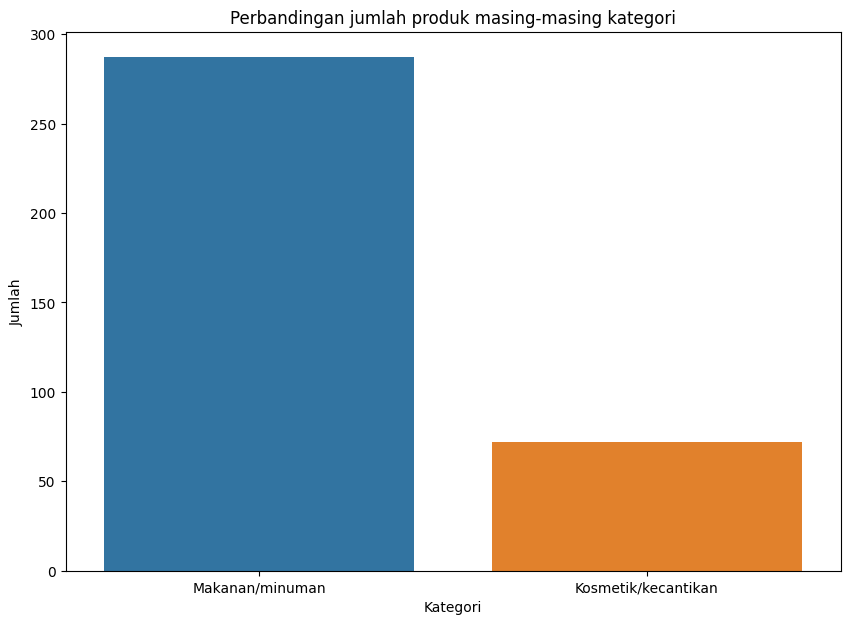

In [82]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_ina_halal.index, y= Category_ina_halal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk masing-masing kategori')
plt.show()

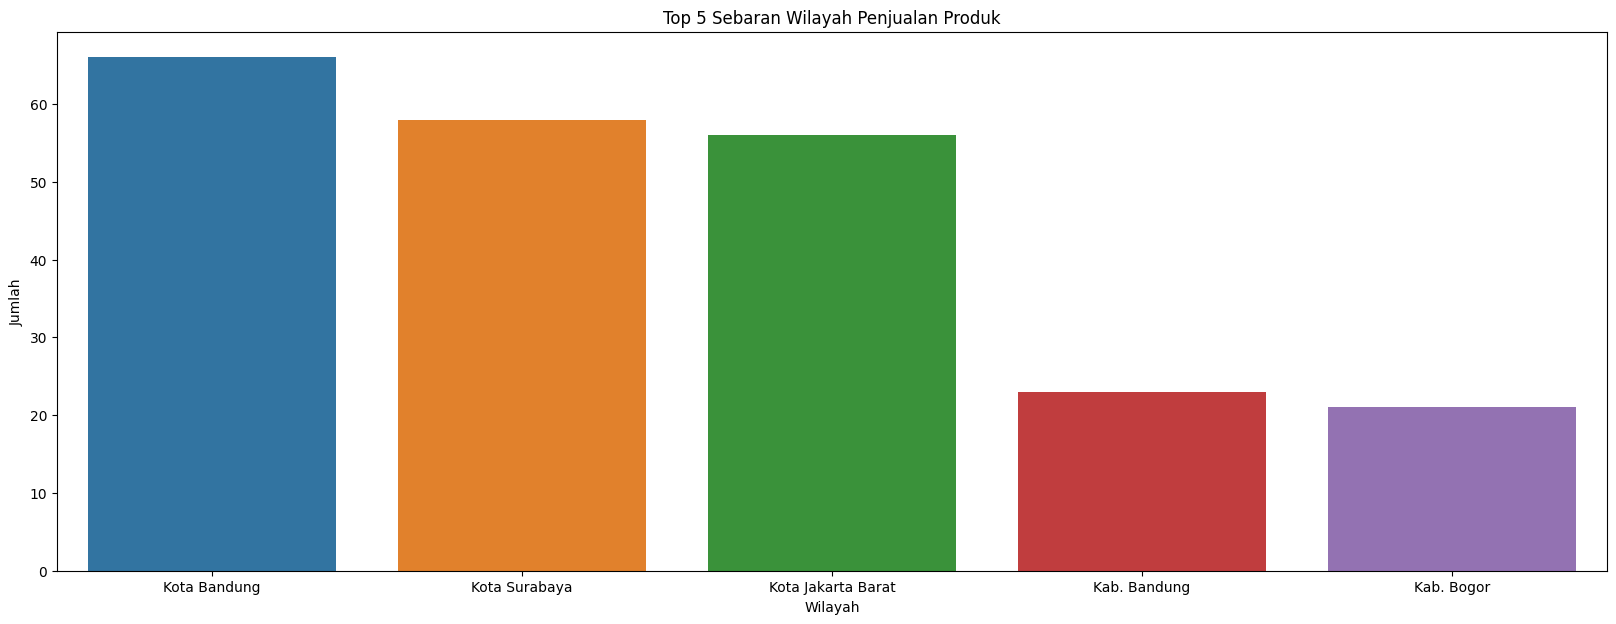

In [83]:
plt.figure(figsize=(20,7))
sns.barplot(x= Location_ina_halal.index, y= Location_ina_halal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

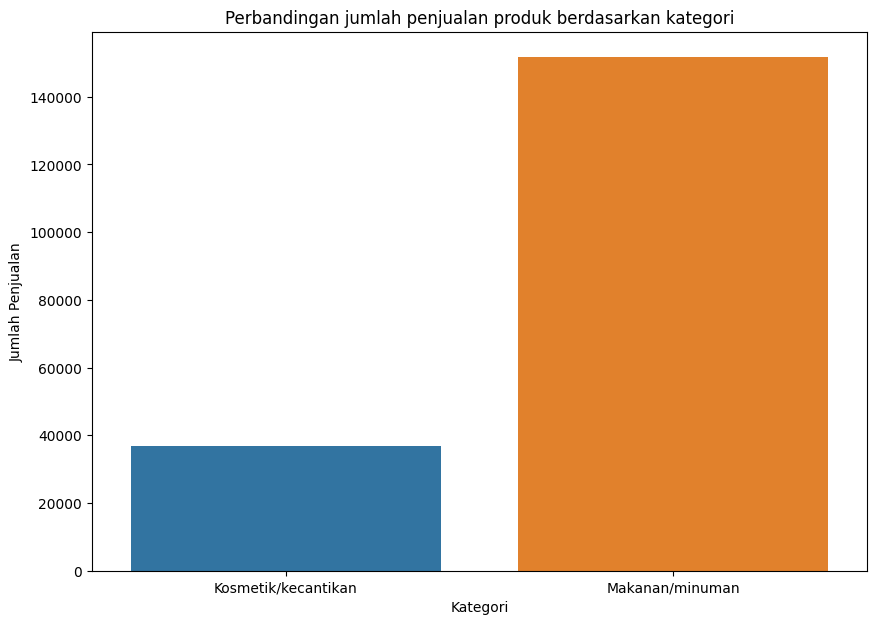

In [84]:
plt.figure(figsize=(10,7))
sns.barplot(x= Sold_ina_halal.index, y= Sold_ina_halal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penjualan')
plt.title('Perbandingan jumlah penjualan produk berdasarkan kategori')
plt.show()

In [85]:
Sold_ina_halal

Product_category
Kosmetik/kecantikan     36770
Makanan/minuman        151609
Name: Product_sold, dtype: int32

In [86]:
df_ina_halal['Product_revenue'] = df_ina_halal['Product_price'] * df_ina_halal['Product_sold']
df_ina_halal

Product_name  Product_price  \
11    Indomie Mi Instan Goreng Jumbo Rasa Ayam Pangg...          21100   
20                        JUMBO INDOMIE MI GORENG JUMBO           4114   
23                                  indomie AYAM GEPREK           3588   
24                               INDOMIE KARI KARE AYAM           3588   
26    Paket Bundling Indomie Mie Instan Goreng Rasa ...          16050   
...                                                 ...            ...   
1739          Sariayu Two Way Cake SPF 15 (Gold Series)          45578   
1751  Sariayu Two Way Cake With Spf 15 02 Natural/Sa...          47763   
1752  Bedak Refill Isi Ulang Dwiguna Sari Ayu/Sariay...          23434   
1754  Sariayu White Aromatic All In One 150ml/Sariay...          18088   
1755  Sariayu Body Lotion Eksotik Tanjung Plus Refre...          17940   

      Product_sold      Product_location     Product_category  Product_revenue  
11             335  Kota Jakarta Selatan      Makanan/minuman          7068500  
20             901        Kab. Mojokerto      Makanan/minuman          3706714  
23             509        Kab. Mojokerto      Makanan/minuman          1826292  
24             703        Kab. Mojokerto      Makanan/minuman          2522364  
26             700        Kota Tangerang      Makanan/minuman         11235000  
...            ...                   ...                  ...              ...  
1739           583            Kab. Bogor  Kosmetik/kecantikan         26571974  
1751           924          Kab. Bandung  Kosmetik/kecantikan         44133012  
1752           201          Kab. Bandung  Kosmetik/kecantikan          4710234  
1754           647          Kab. Bandung  Kosmetik/kecantikan         11702936  
1755           421          Kab. Bandung  Kosmetik/kecantikan          7552740  

[359 rows x 6 columns]

In [87]:
df_ina_halal['Country_label'] = 'INA'
df_ina_halal

Product_name  Product_price  \
11    Indomie Mi Instan Goreng Jumbo Rasa Ayam Pangg...          21100   
20                        JUMBO INDOMIE MI GORENG JUMBO           4114   
23                                  indomie AYAM GEPREK           3588   
24                               INDOMIE KARI KARE AYAM           3588   
26    Paket Bundling Indomie Mie Instan Goreng Rasa ...          16050   
...                                                 ...            ...   
1739          Sariayu Two Way Cake SPF 15 (Gold Series)          45578   
1751  Sariayu Two Way Cake With Spf 15 02 Natural/Sa...          47763   
1752  Bedak Refill Isi Ulang Dwiguna Sari Ayu/Sariay...          23434   
1754  Sariayu White Aromatic All In One 150ml/Sariay...          18088   
1755  Sariayu Body Lotion Eksotik Tanjung Plus Refre...          17940   

      Product_sold      Product_location     Product_category  \
11             335  Kota Jakarta Selatan      Makanan/minuman   
20             901        Kab. Mojokerto      Makanan/minuman   
23             509        Kab. Mojokerto      Makanan/minuman   
24             703        Kab. Mojokerto      Makanan/minuman   
26             700        Kota Tangerang      Makanan/minuman   
...            ...                   ...                  ...   
1739           583            Kab. Bogor  Kosmetik/kecantikan   
1751           924          Kab. Bandung  Kosmetik/kecantikan   
1752           201          Kab. Bandung  Kosmetik/kecantikan   
1754           647          Kab. Bandung  Kosmetik/kecantikan   
1755           421          Kab. Bandung  Kosmetik/kecantikan   

      Product_revenue Country_label  
11            7068500           INA  
20            3706714           INA  
23            1826292           INA  
24            2522364           INA  
26           11235000           INA  
...               ...           ...  
1739         26571974           INA  
1751         44133012           INA  
1752          4710234           INA  
1754         11702936           INA  
1755          7552740           INA  

[359 rows x 7 columns]

In [88]:
df_ina_halal.describe()

Product_price  Product_sold  Product_revenue
count     359.000000    359.000000     3.590000e+02
mean    13796.841226    524.732591     7.226746e+06
std     10566.538539    264.870266     7.315198e+06
min      1000.000000    200.000000     2.790000e+05
25%      5347.500000    298.000000     2.456724e+06
50%     11600.000000    455.000000     4.802400e+06
75%     18900.000000    692.500000     9.133000e+06
max     49500.000000   1193.000000     4.624630e+07

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\720850096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ina_halal.corr(), annot= True)


<Axes: >

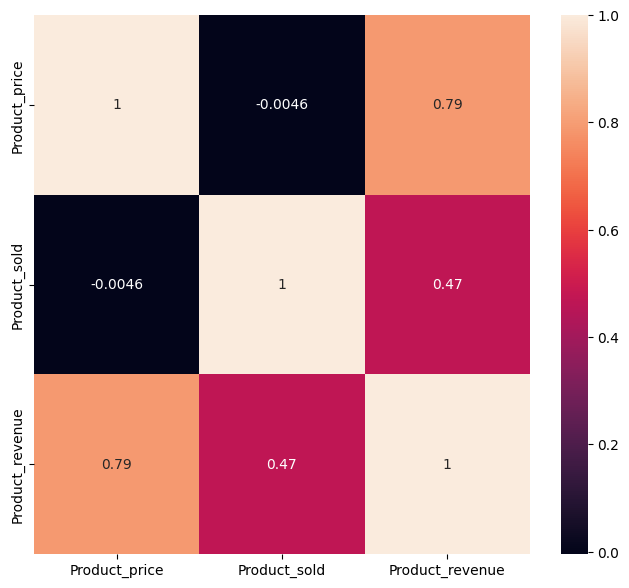

In [89]:
plt.figure(figsize=(8,7))
sns.heatmap(df_ina_halal.corr(), annot= True)

> 1. Terlihat dari Product_price, Product_sold, Product_sold 
> 2. Product Revenue memiliki korelasi cukup baik pada Product_price dan Product_sold dengan nilai > 0.5

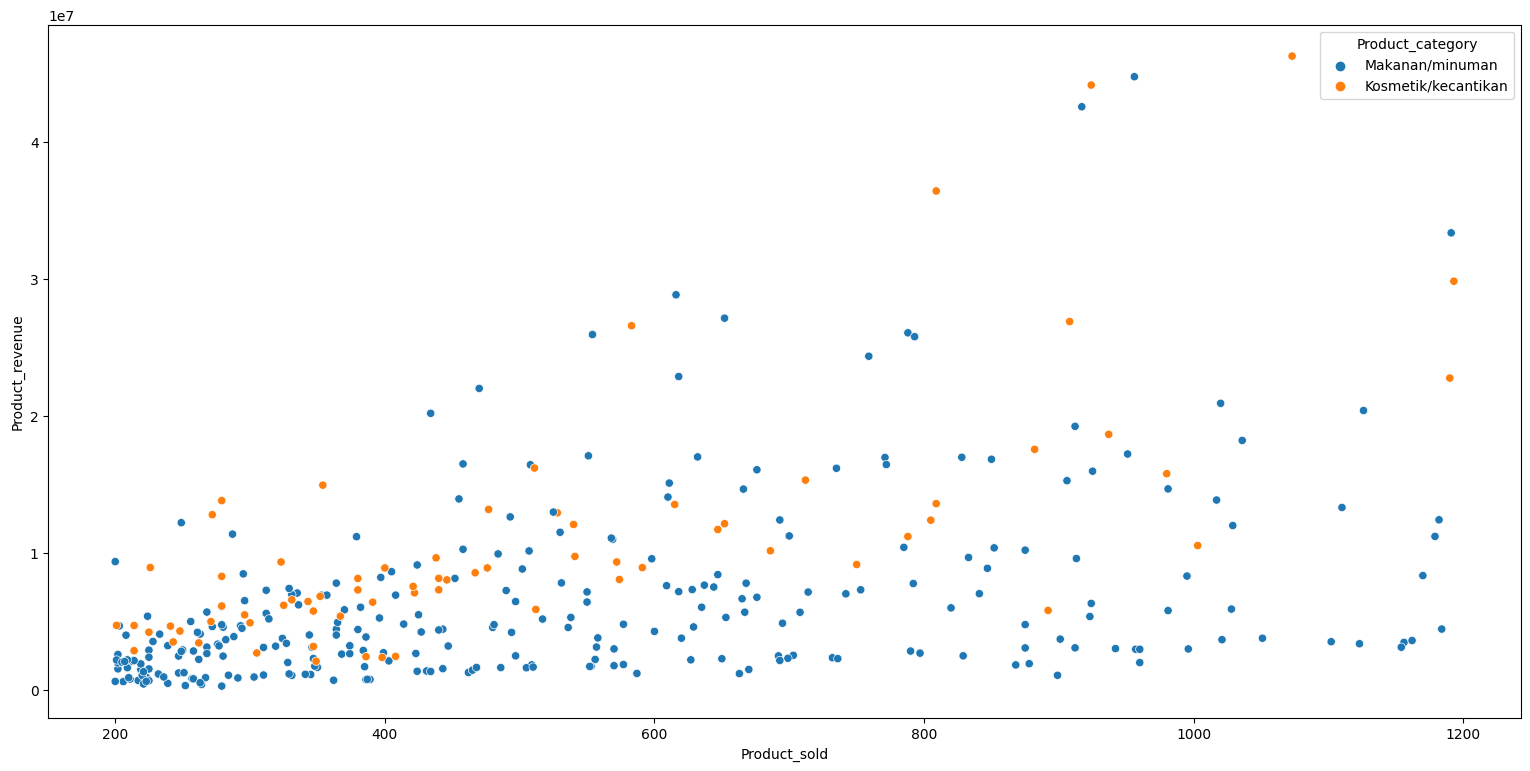

In [90]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue= 'Product_category', data=df_ina_halal)
plt.show()

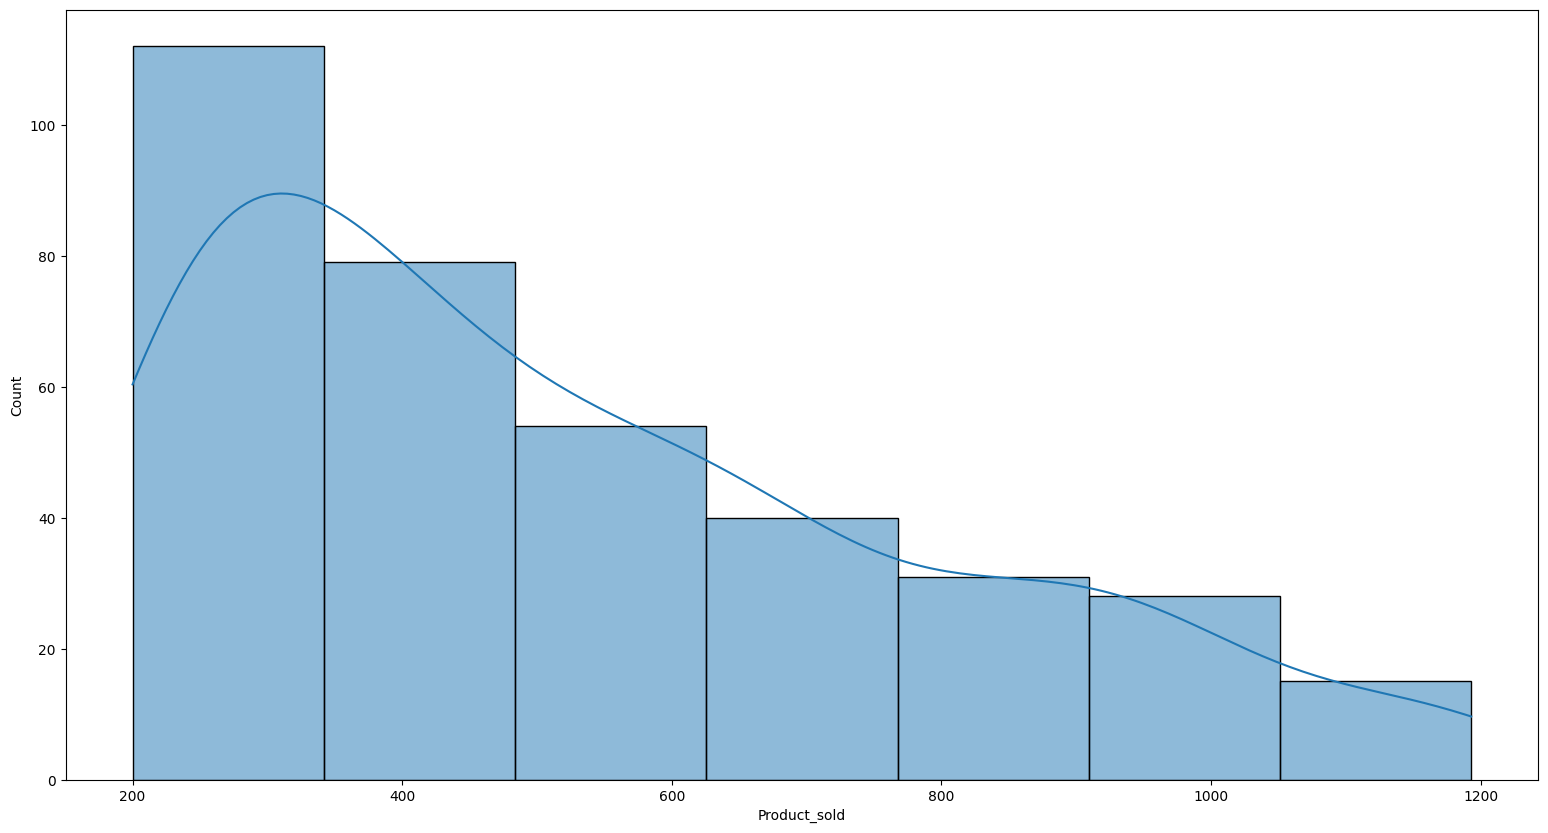

In [91]:
# Visualize Product_sold with histogram to see the distribution
plt.figure(figsize=(19,10))
sns.histplot(df_ina_halal['Product_sold'] ,kde=True, bins= 7)
plt.show()

In [92]:
# Transform data with log to normalize
# df_ina_halal['Product_sold'] = np.log(df_ina_halal['Product_sold'])

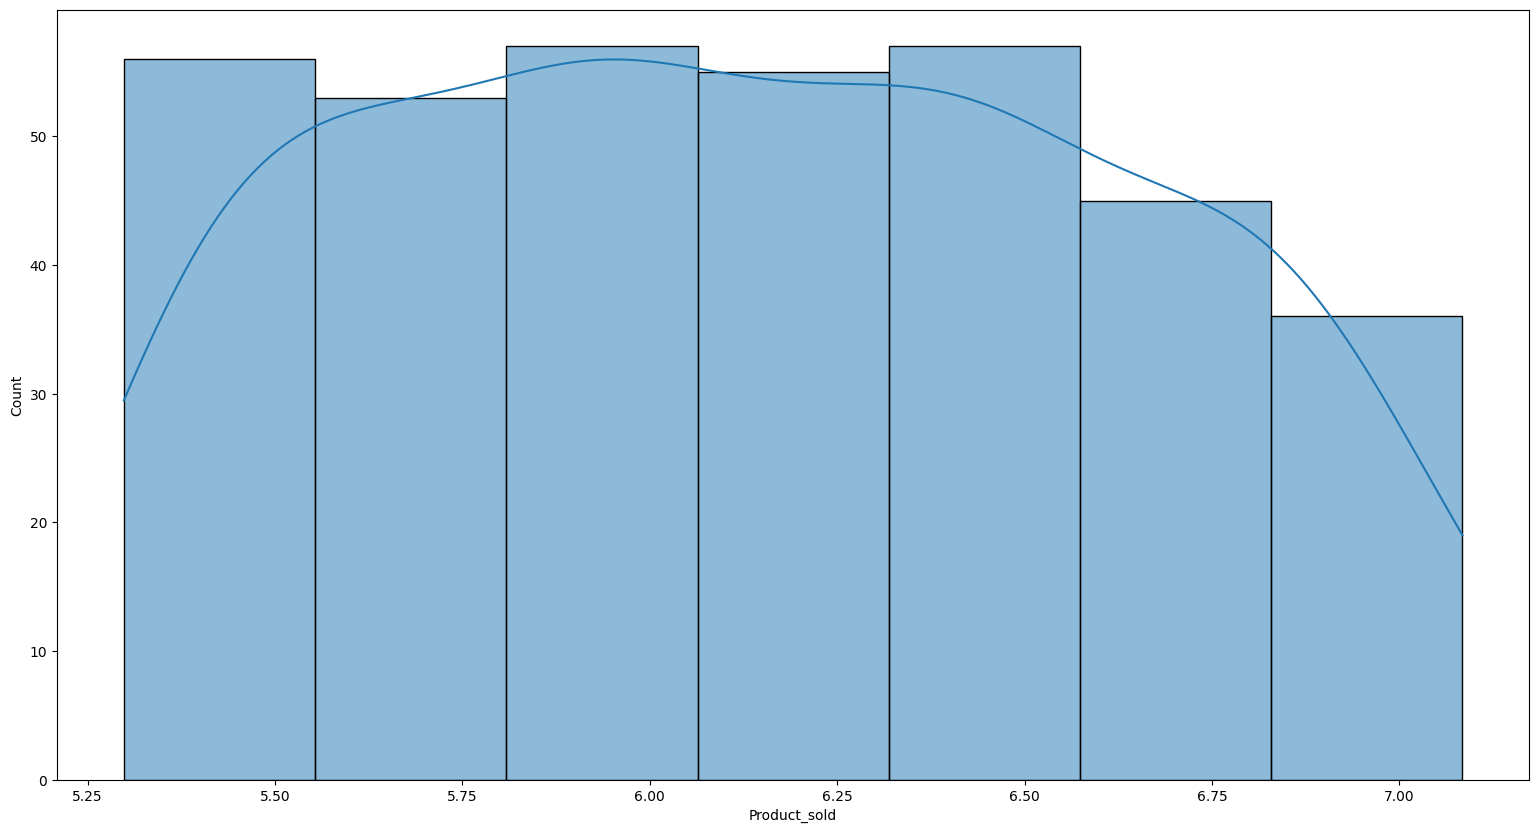

In [93]:
# Visualization after normalize
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_ina_halal['Product_sold']) ,kde=True, bins= 7)
plt.show()

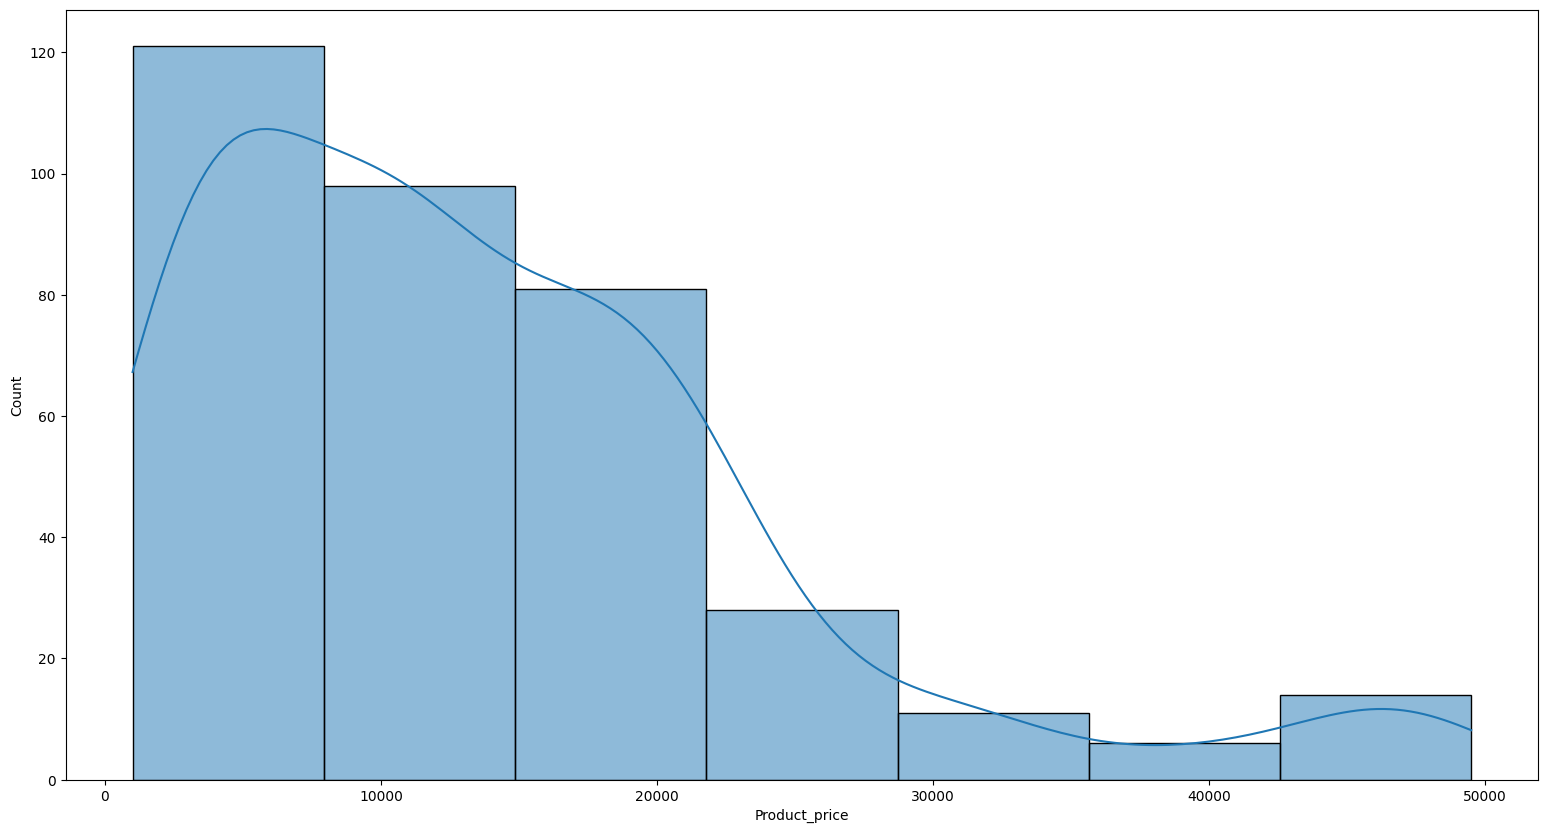

In [94]:
# Visualize Product_price with histogram to see the distribution
plt.figure(figsize=(19,10))
sns.histplot(df_ina_halal['Product_price'], kde=True, bins= 7)
plt.show()

In [95]:
# Transform data with log to normalize 
# df_ina_halal['Product_price'] = np.log(df_ina_halal['Product_price'])

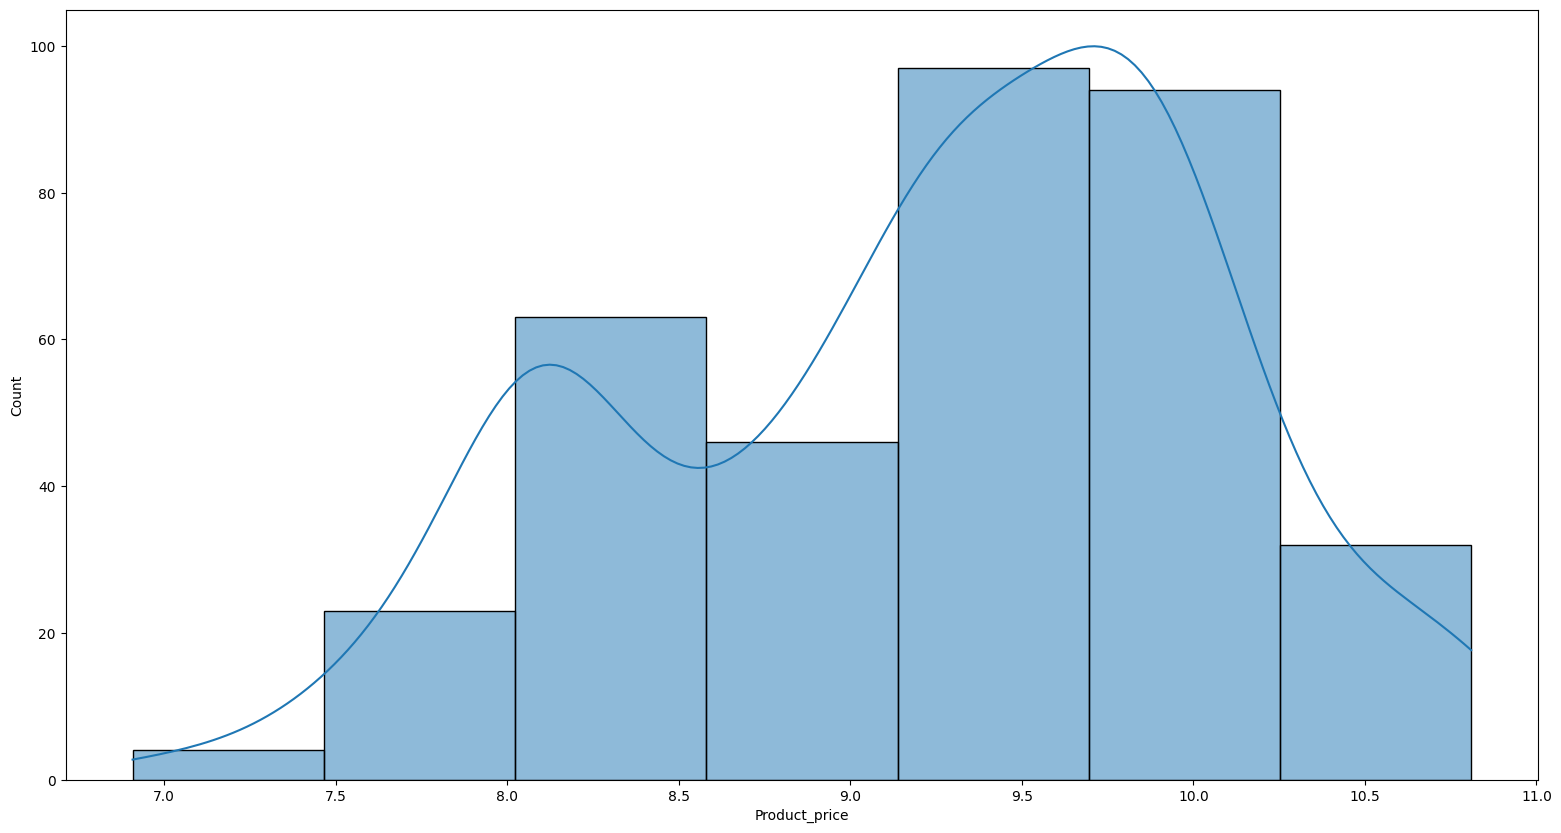

In [96]:
# Visualization after normalize
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_ina_halal['Product_price']), kde=True, bins= 7)
plt.show()

In [97]:
df_ina_halal.describe()

Product_price  Product_sold  Product_revenue
count     359.000000    359.000000     3.590000e+02
mean    13796.841226    524.732591     7.226746e+06
std     10566.538539    264.870266     7.315198e+06
min      1000.000000    200.000000     2.790000e+05
25%      5347.500000    298.000000     2.456724e+06
50%     11600.000000    455.000000     4.802400e+06
75%     18900.000000    692.500000     9.133000e+06
max     49500.000000   1193.000000     4.624630e+07

In [98]:
bins = np.histogram_bin_edges(df_ina_halal['Product_sold'], bins='fd')
print(bins)

[ 200.          310.33333333  420.66666667  531.          641.33333333
  751.66666667  862.          972.33333333 1082.66666667 1193.        ]


#### Data Non-Halal Indonesia

In [99]:
df_ina_nonhalal

Product_name  Product_price  \
0                           BINTANG BOTOL BESAR 620mili          37000   
1            BINTANG Anggur Merah Beer Bremer Bir 620ml          49000   
2                            Bir Bintang Pilsener 620ml          42000   
3                         BINTANG Pilsener kaleng 500ML          28000   
4                                     Bir Bintang 620ml          40500   
...                                                 ...            ...   
1646  [HALAL ] WULAMA Snack Camilan spicy Kulit tahu...          18800   
1647  Kellys Luncheon Ham Bacon Bits / Picante / Chi...          52500   
1648     gulong pork leg with mushroom 397 gr kaki babi          45999   
1649  GOLDEN BRIDGE LUNCHEON MEAT SINGAPORE, MULTIPA...         299500   
1650                       TTS MaLing ( Pork ) exp 2024          31650   

      Product_sold        Product_location Product_category  
0              131      kota jakarta barat  Makanan/minuman  
1                2      kota jakarta utara  Makanan/minuman  
2             1600      kota jakarta barat  Makanan/minuman  
3              715          kab. tangerang  Makanan/minuman  
4             1500           kota surabaya  Makanan/minuman  
...            ...                     ...              ...  
1646           232          kota tangerang  Makanan/minuman  
1647           128    kota jakarta selatan  Makanan/minuman  
1648            75  kota tangerang selatan  Makanan/minuman  
1649            88    kota jakarta selatan  Makanan/minuman  
1650          8599      kota jakarta utara  Makanan/minuman  

[1422 rows x 5 columns]

In [100]:
df_ina_nonhalal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1650
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_name      1422 non-null   object
 1   Product_price     1422 non-null   int32 
 2   Product_sold      1422 non-null   int32 
 3   Product_location  1422 non-null   object
 4   Product_category  1422 non-null   object
dtypes: int32(2), object(3)
memory usage: 55.5+ KB


In [101]:
pd.set_option('float_format', '{:.2f}'.format)
df_ina_nonhalal.describe()

Product_price  Product_sold
count        1422.00       1422.00
mean       127051.32       1433.59
std        341212.21       6371.33
min           800.00          1.00
25%         24125.00         24.00
50%         47340.50        106.50
75%         91169.50        551.25
max       3950000.00     100000.00

<Axes: >

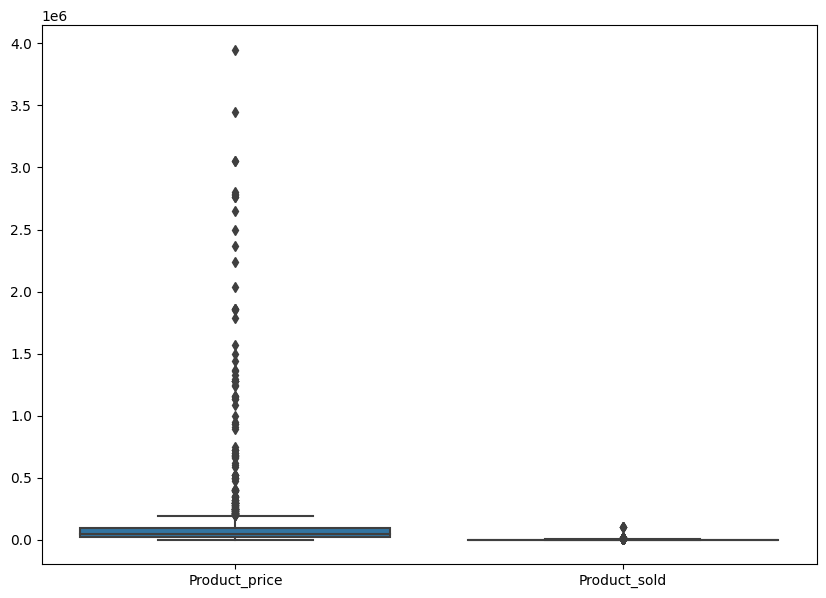

In [102]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_ina_nonhalal[['Product_price', 'Product_sold']])

**Masih terdapat Outlier pada kedua kolom**

In [103]:
for i in range(0,2):
    Q1 = df_ina_nonhalal['Product_price'].quantile(0.25)
    Q3 = df_ina_nonhalal['Product_price'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    df_ina_nonhalal = df_ina_nonhalal[(df_ina_nonhalal['Product_price'] >= lower_bound) & (df_ina_nonhalal['Product_price'] <= upper_bound)]
    i+=1

<Axes: >

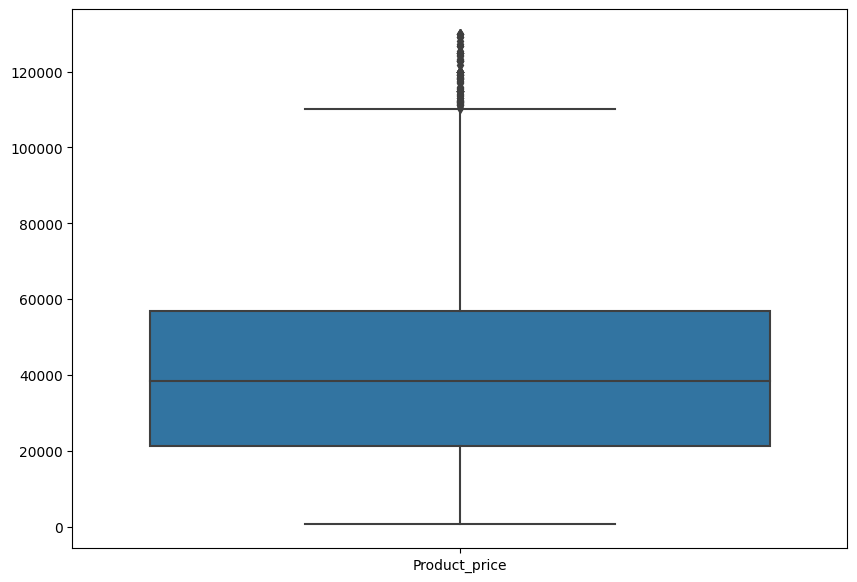

In [104]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_ina_nonhalal[['Product_price']])

In [105]:
# Q1_1 = df_ina_nonhalal['Product_sold'].quantile(0.25)
# Q3_1 = df_ina_nonhalal['Product_sold'].quantile(0.75)
# IQR_1 = Q3_1-Q1_1
# lower_1 = Q1_1 - 1.5*IQR_1
# upper_1 = Q1_1 + 1.5*IQR_1

# # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] < lower_1, lower_1, df_ina_halal['Product_price'])
# # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] > upper_1, upper_1, df_ina_halal['Product_price'])
# df_ina_nonhalal = df_ina_nonhalal[(df_ina_nonhalal['Product_sold'] >= lower_1) & (df_ina_nonhalal['Product_sold'] <= upper_1)]

In [106]:
df_ina_nonhalal = df_ina_nonhalal.loc[(df_ina_nonhalal['Product_sold'] >= 250) & (df_ina_nonhalal['Product_sold'] <= 2000)]

<Axes: >

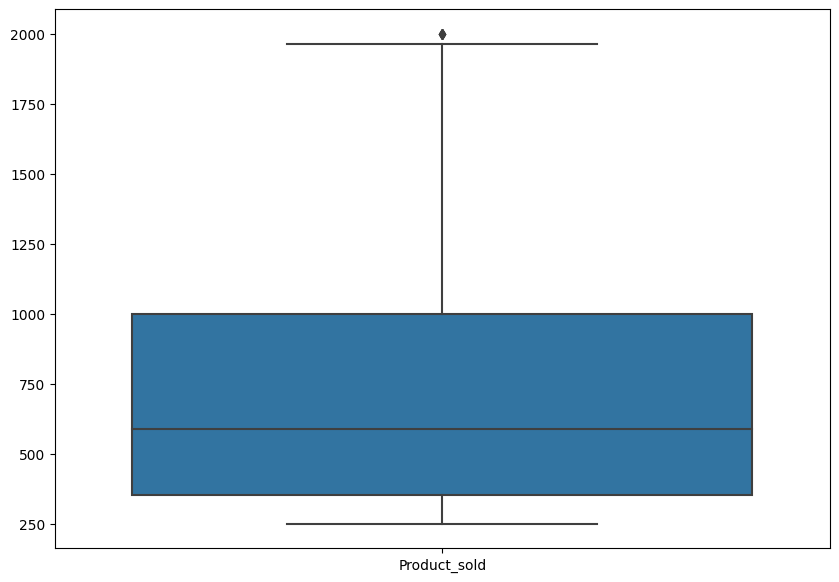

In [107]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_ina_nonhalal[['Product_sold']])

> Data sudah tidak memiliki outlier yang begitu signifikan dengan melakukan filtering kedua dengan menggunakan conditional

In [108]:
df_ina_nonhalal = df_ina_nonhalal.reset_index(drop='True')

In [109]:
df_ina_nonhalal['Product_revenue'] = df_ina_nonhalal['Product_price'] * df_ina_nonhalal['Product_sold']

In [110]:
df_ina_nonhalal['Country_label'] = 'INA'

In [111]:
df_ina_nonhalal.describe()

Product_price  Product_sold  Product_revenue
count         279.00        279.00           279.00
mean        40193.34        741.94      28878864.30
std         25943.52        479.37      29024512.33
min          2705.00        250.00        706005.00
25%         20345.50        352.00      10433214.00
50%         36432.00        589.00      17862000.00
75%         52000.00       1000.00      36003500.00
max        118000.00       2000.00     219510190.00

In [112]:
df_ina_nonhalal

Product_name  Product_price  \
0                           Bir Bintang Pilsener 620ml          42000   
1                        BINTANG Pilsener kaleng 500ML          28000   
2                                    Bir Bintang 620ml          40500   
3               Bir Bintang Pilsener Botol Jumbo 620ml          38500   
4    Bir Bintang Pilsener can 500 ml Beer bintang k...          28500   
..                                                 ...            ...   
274  (Exp Terbaru FEB 2025) Spam Classic Korea 200g...         100000   
275               Spam meat Korea 200 gram Tidak Halal          75000   
276     SPAM ORIGINAL MADE IN KOREA /ALL VARIANT READY         110000   
277                                      Spam USA pork          87888   
278                SPAM Korea Single 80gr CLASSIC/MILD          55000   

     Product_sold    Product_location Product_category  Product_revenue  \
0            1600  kota jakarta barat  Makanan/minuman         67200000   
1             715      kab. tangerang  Makanan/minuman         20020000   
2            1500       kota surabaya  Makanan/minuman         60750000   
3             307  kota jakarta pusat  Makanan/minuman         11819500   
4            1500  kota jakarta utara  Makanan/minuman         42750000   
..            ...                 ...              ...              ...   
274           668      kab. tangerang  Makanan/minuman         66800000   
275           473  kota jakarta barat  Makanan/minuman         35475000   
276           259  kota jakarta timur  Makanan/minuman         28490000   
277           326  kota jakarta utara  Makanan/minuman         28651488   
278           646  kota jakarta timur  Makanan/minuman         35530000   

    Country_label  
0             INA  
1             INA  
2             INA  
3             INA  
4             INA  
..            ...  
274           INA  
275           INA  
276           INA  
277           INA  
278           INA  

[279 rows x 7 columns]

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\2125462433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ina_nonhalal.corr(), annot=True)


<Axes: >

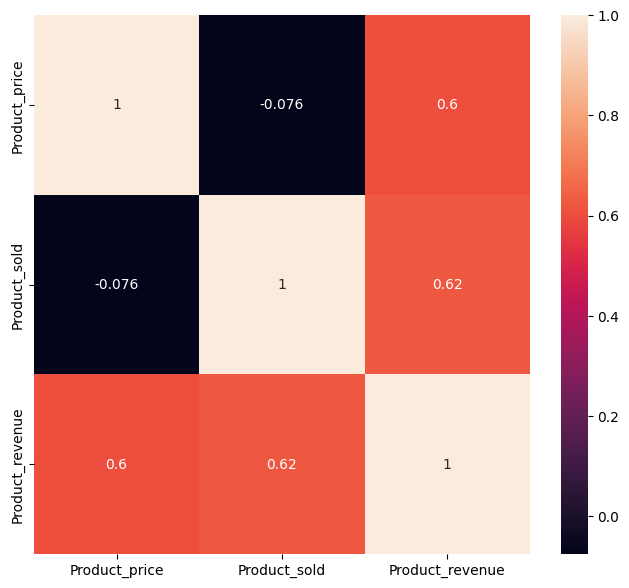

In [113]:
plt.figure(figsize=(8,7))
sns.heatmap(df_ina_nonhalal.corr(), annot=True)

> 1. Terlihat dari Product_price, Product_sold, Product_revenue , Product revenue memiliki korelasi cukup baik pada Product_sold dengan nilai > 0.5

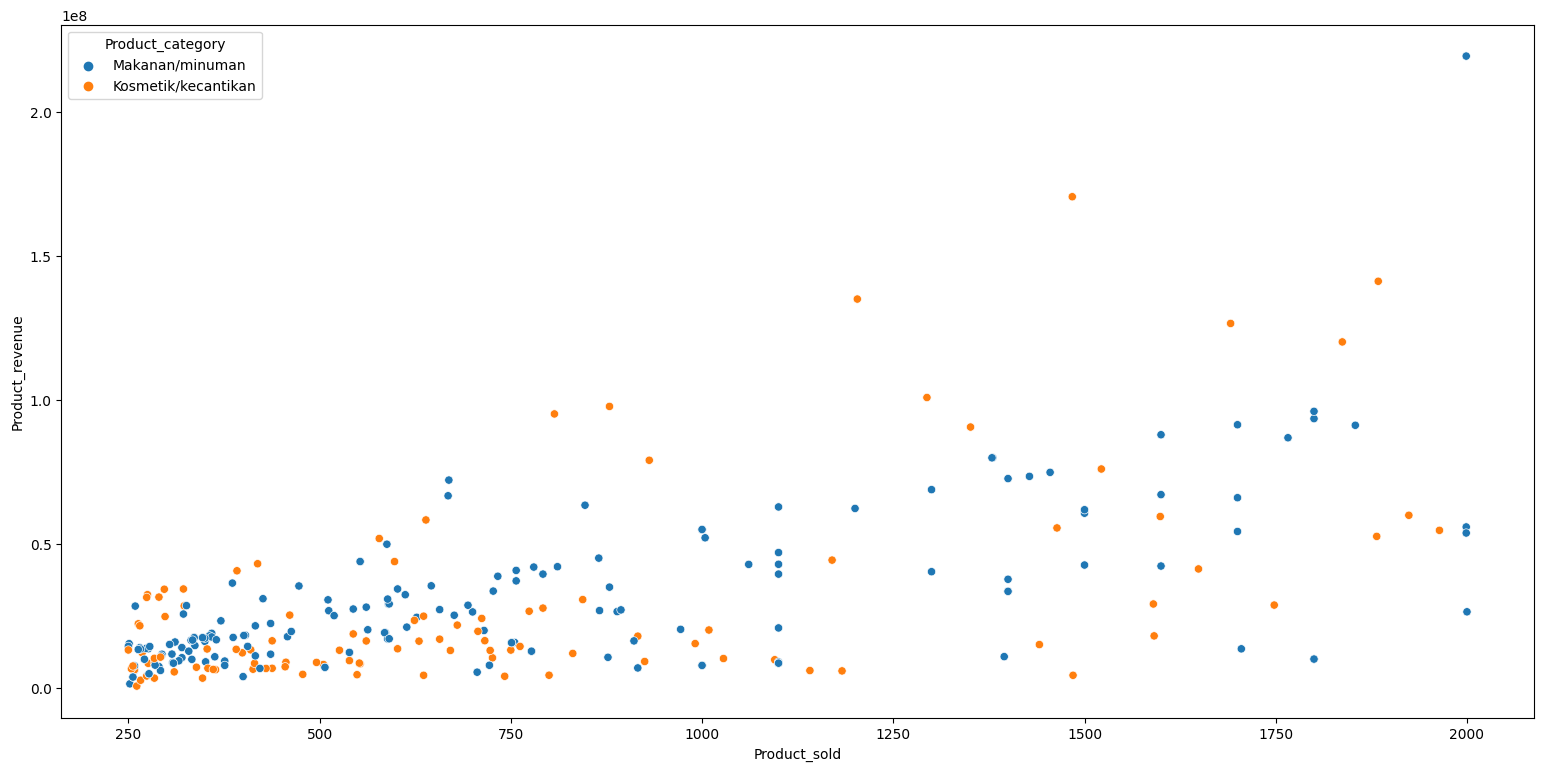

In [114]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue= 'Product_category', data=df_ina_nonhalal)
plt.show()

In [115]:
# Querry
Category_ina_nonhalal = df_ina_nonhalal['Product_category'].value_counts()
Location_ina_nonhalal = df_ina_nonhalal['Product_location'].value_counts()
Sold_ina_nonhalal = df_ina_nonhalal.groupby('Product_category')['Product_sold'].sum()
Location_ina_nonhalal = Location_ina_nonhalal.head(5)

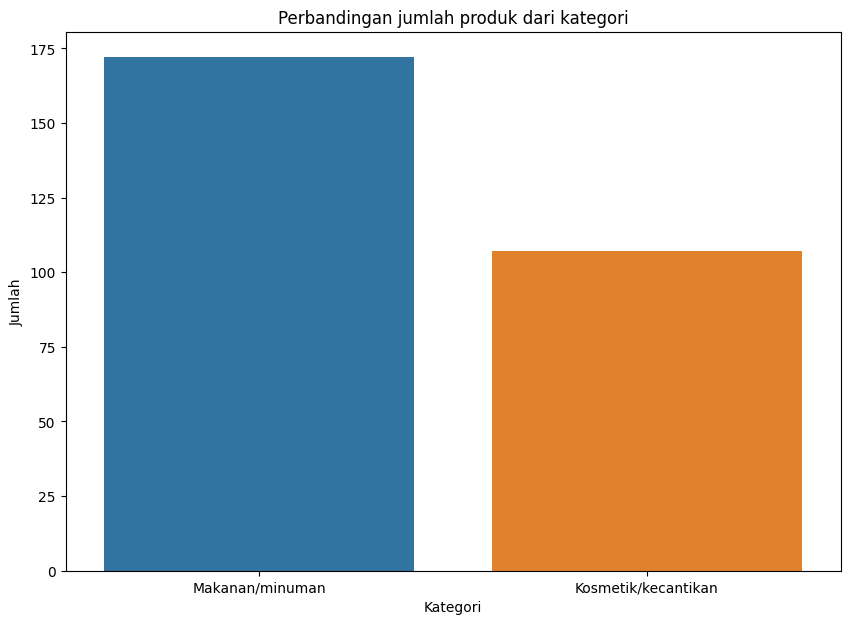

In [116]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_ina_nonhalal.index, y= Category_ina_nonhalal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk dari kategori')
plt.show()

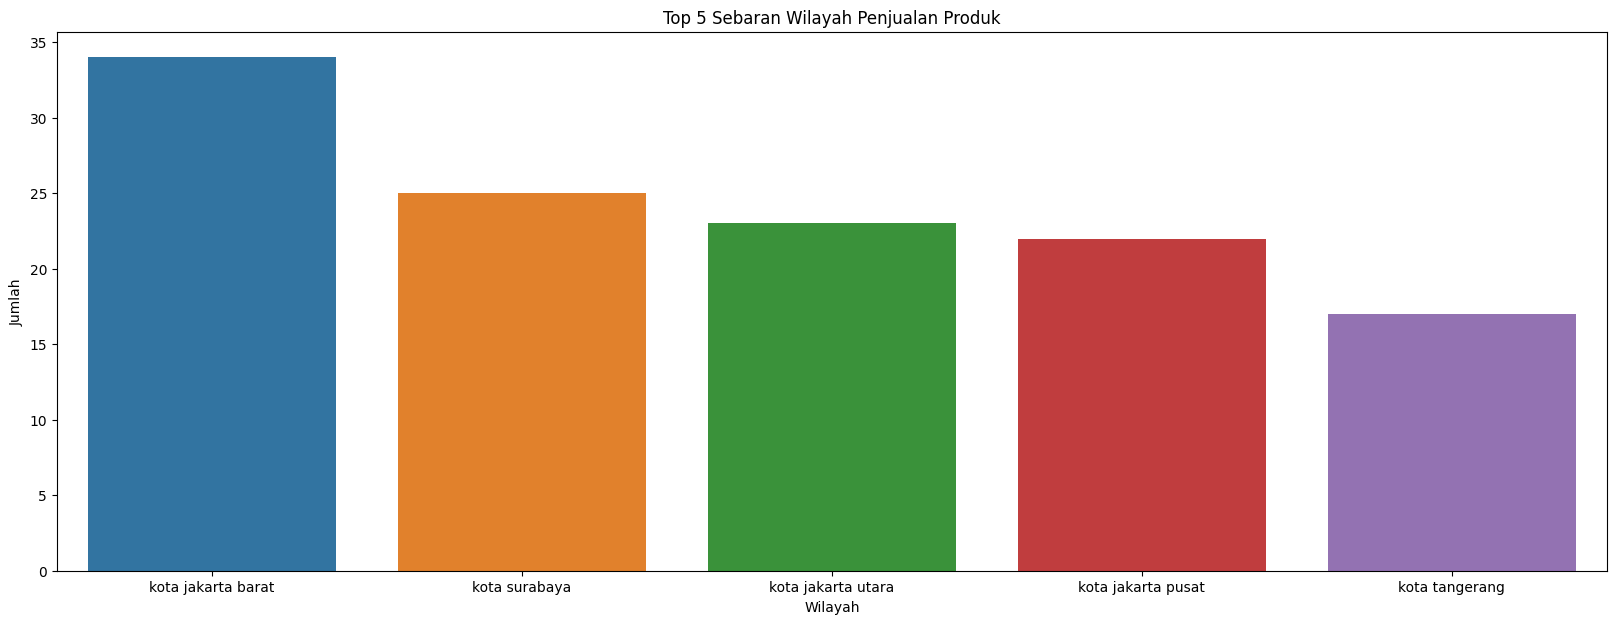

In [117]:
plt.figure(figsize=(20,7))
sns.barplot(x= Location_ina_nonhalal.index, y= Location_ina_nonhalal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

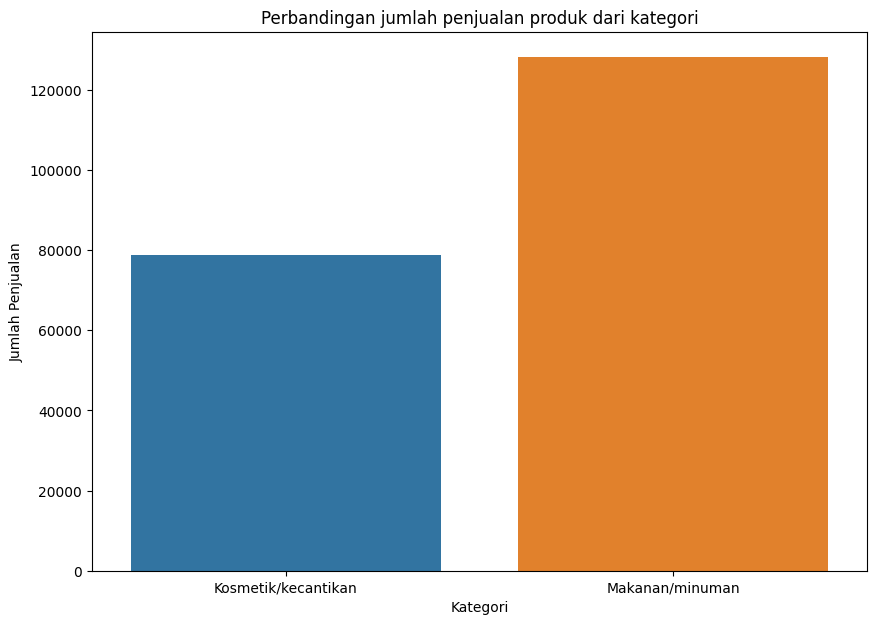

In [118]:
plt.figure(figsize=(10,7))
sns.barplot(x= Sold_ina_nonhalal.index, y= Sold_ina_nonhalal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penjualan')
plt.title('Perbandingan jumlah penjualan produk dari kategori')
plt.show()

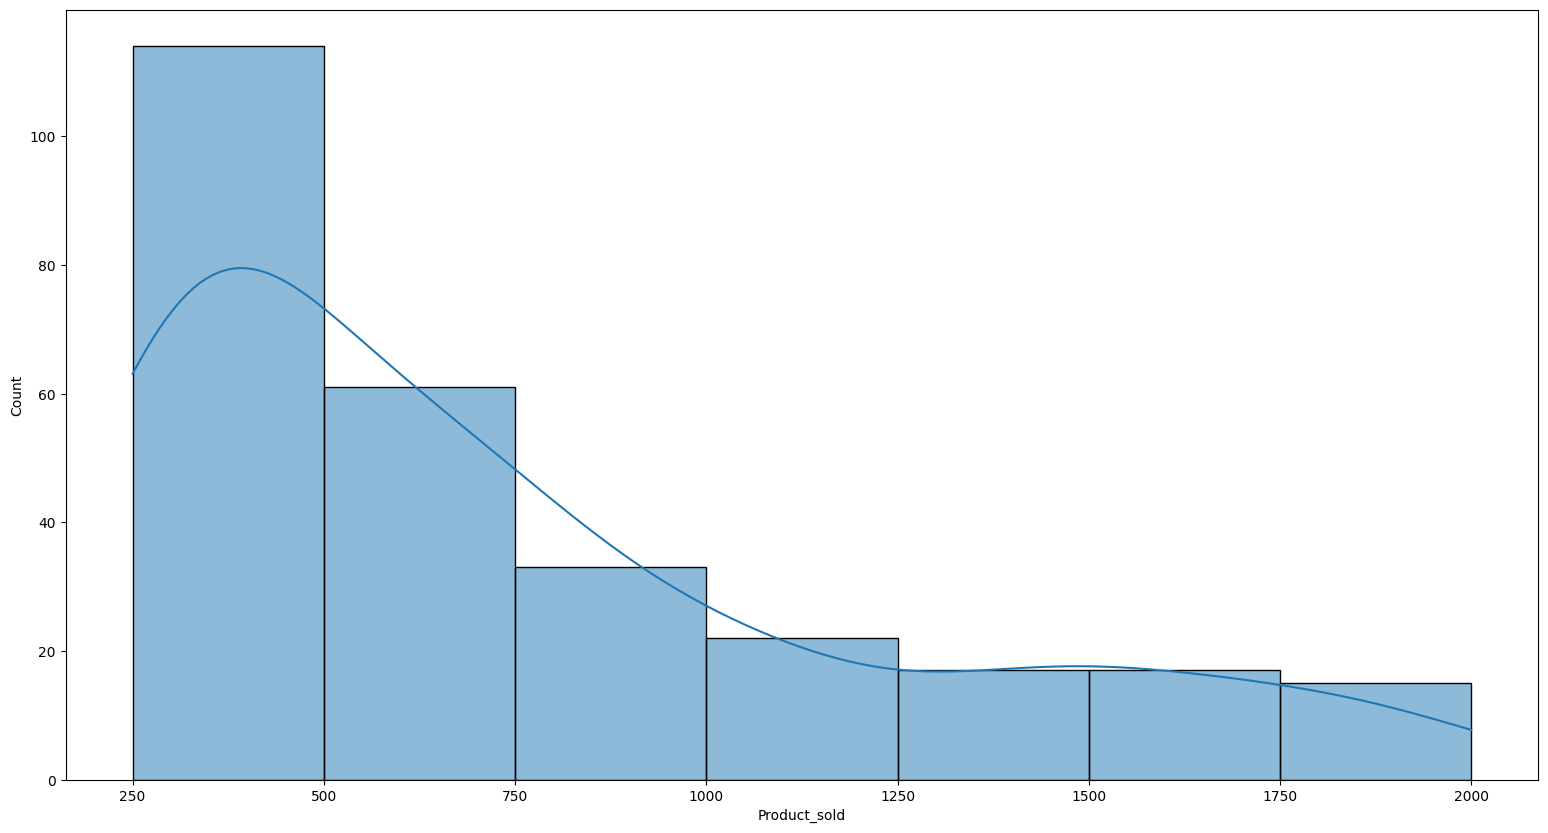

In [119]:
plt.figure(figsize=(19,10))
sns.histplot(df_ina_nonhalal['Product_sold'], kde=True, bins=7)
plt.show()

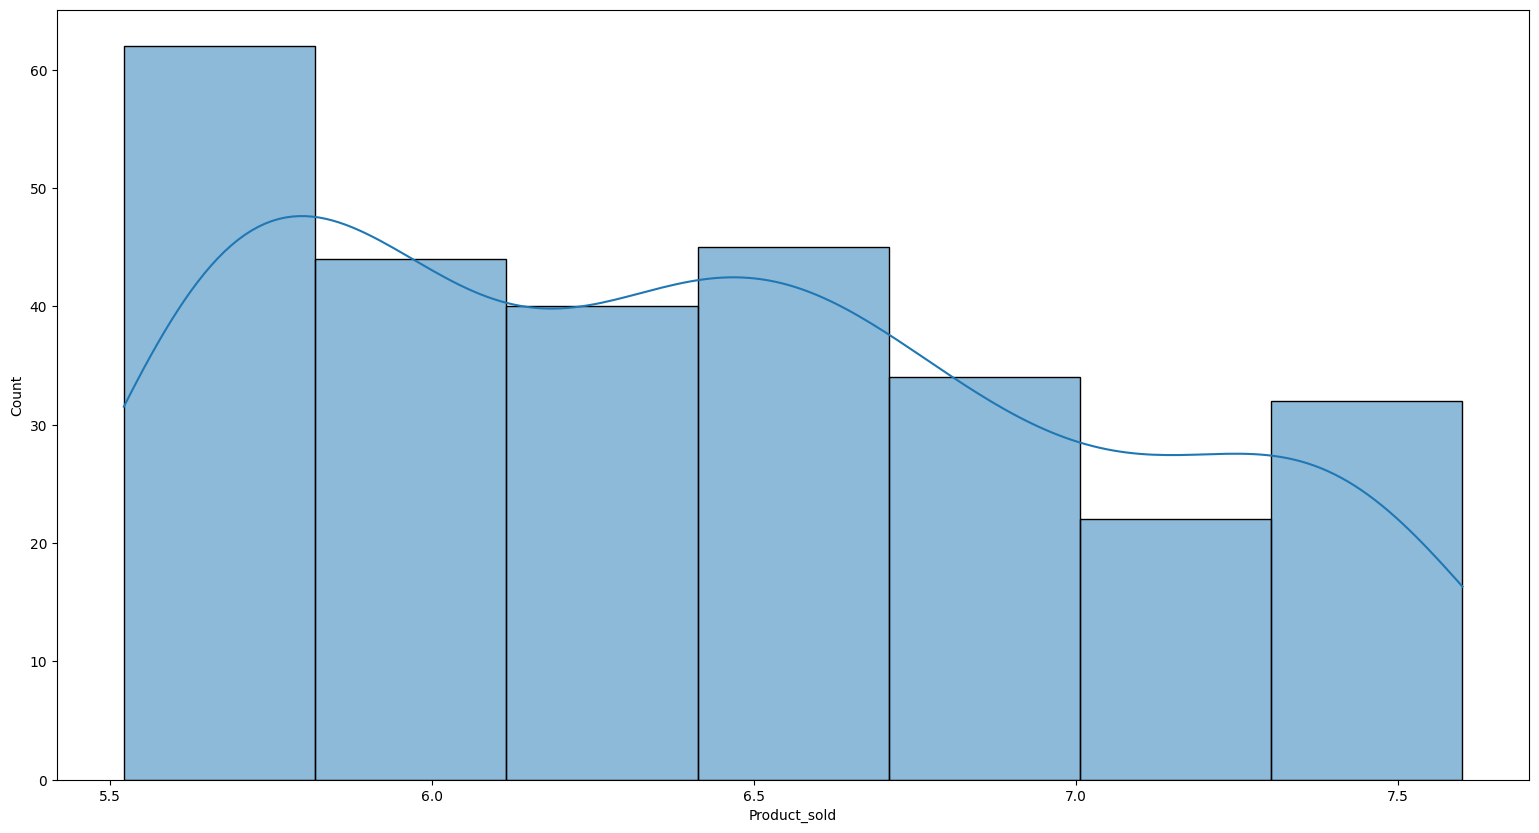

In [120]:
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_ina_nonhalal['Product_sold']), kde=True, bins=7)
plt.show()

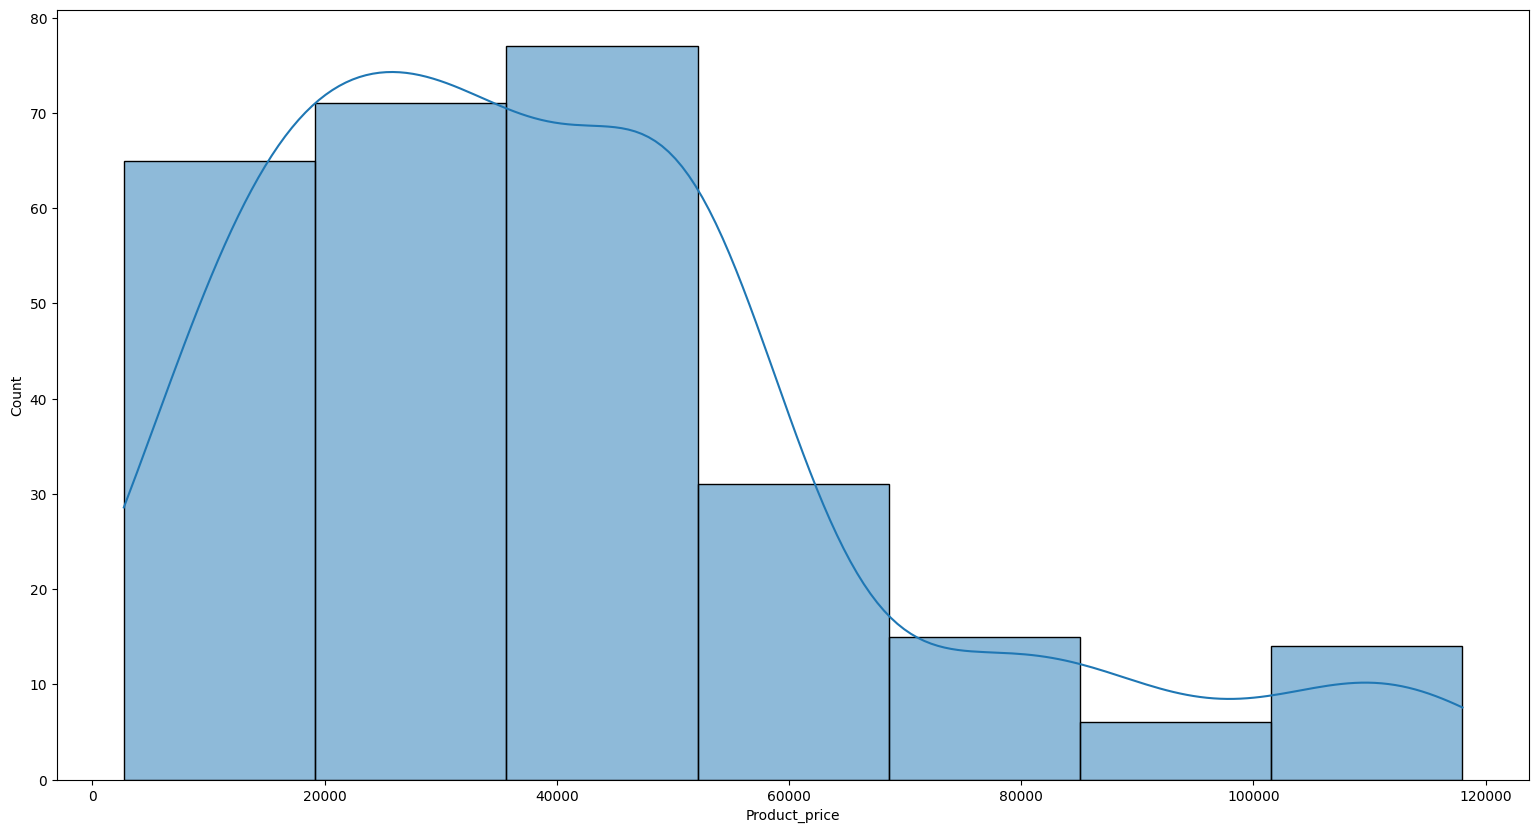

In [121]:
plt.figure(figsize=(19,10))
sns.histplot(df_ina_nonhalal['Product_price'], kde=True, bins=7)
plt.show()

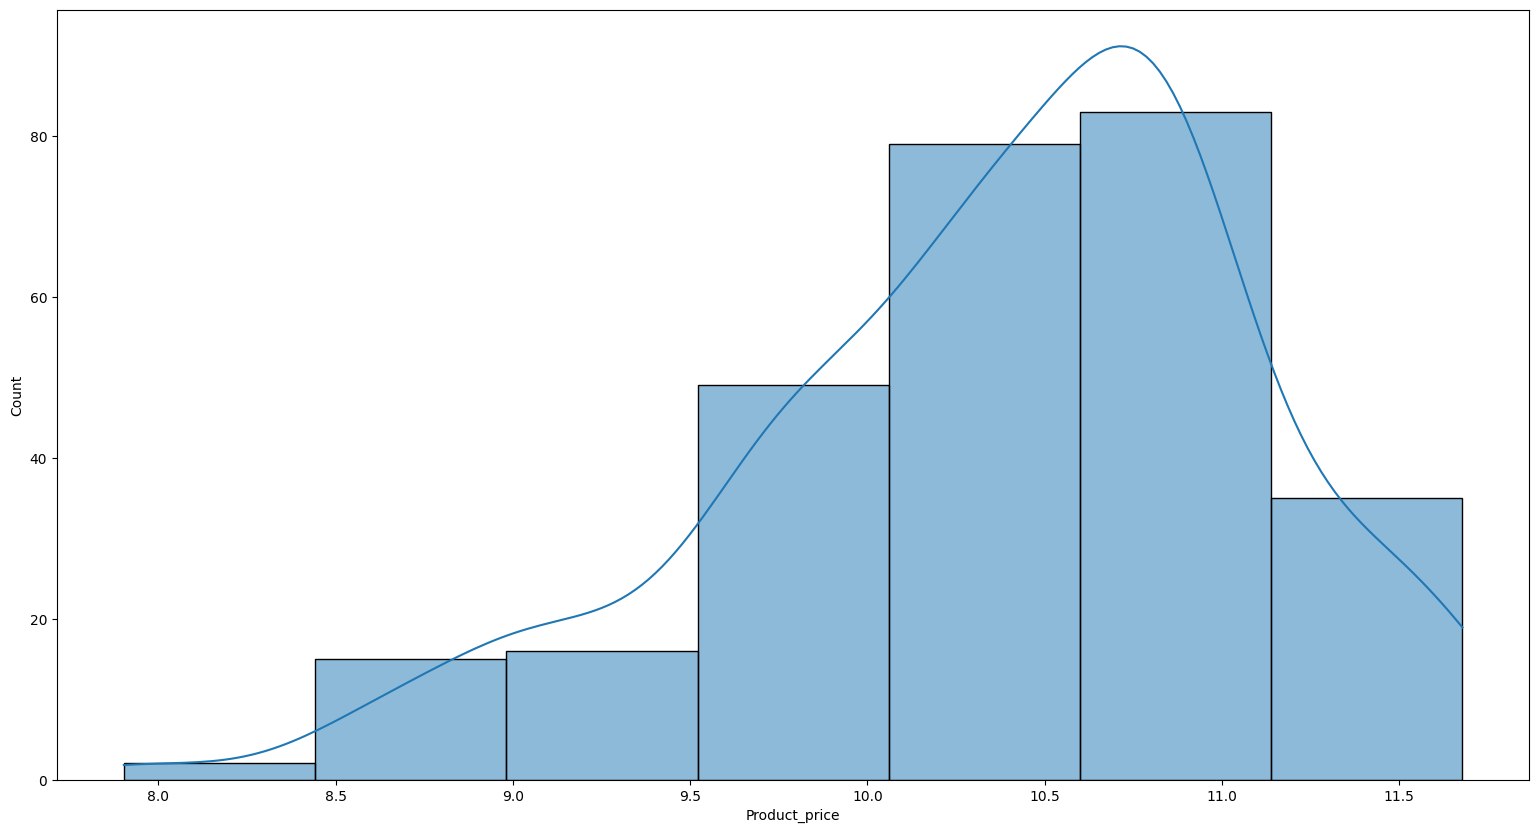

In [122]:
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_ina_nonhalal['Product_price']), kde=True, bins=7)
plt.show()

### (MY) Data Halal dan Non-Halal Malaysia

#### Data Halal Malaysia

In [123]:
df_my_halal

Product_name  Product_price  \
0               MAGGI Pedas Giler Roasted Chicken 5x76g           7.90   
1                 MAGGI 2-MINN Chicken 5 Packs 77g Each           4.70   
2                      MAGGI 2-MINN Asam Laksa 12X5X78G          57.80   
3                   MAGGI Nutrilicious Aglio Olio 5x77g           8.28   
4        MAGGI Marinade Paste Ayam Goreng Berempah 100g           4.40   
...                                                 ...            ...   
1754            Safi Skrub Muka Gel Habbatus Sauda 100G           9.90   
1756  Safi Hijabista Bodycare Antibacterial Deodoran...           7.80   
1757  SAFI Perfect White Light Foam Brightening Clea...           8.93   
1758  Safi Naturals Skincare Oil Control Gel Facial ...           9.49   
1759  NEUTROGENA DEEP CLEAN BRIGHTENING FOAMING CLEA...          18.99   

      Product_sold Product_location Product_category  
0             9999         Selangor  Makanan/minuman  
1             9999         Selangor  Makanan/minuman  
2             1863         Selangor  Makanan/minuman  
3              966         Selangor  Makanan/minuman  
4              395         Selangor  Makanan/minuman  
...            ...              ...              ...  
1754            50            Kedah  Makanan/minuman  
1756            10            Kedah  Makanan/minuman  
1757           154         Selangor  Makanan/minuman  
1758            11            Kedah  Makanan/minuman  
1759            53            Kedah  Makanan/minuman  

[1445 rows x 5 columns]

In [124]:
df_my_halal.describe()

Product_price  Product_sold
count        1445.00       1445.00
mean           18.74       1181.00
std            26.15       4276.01
min             0.80          5.00
25%             5.90         49.00
50%            11.90        206.00
75%            20.40        768.00
max           274.80     100000.00

<Axes: >

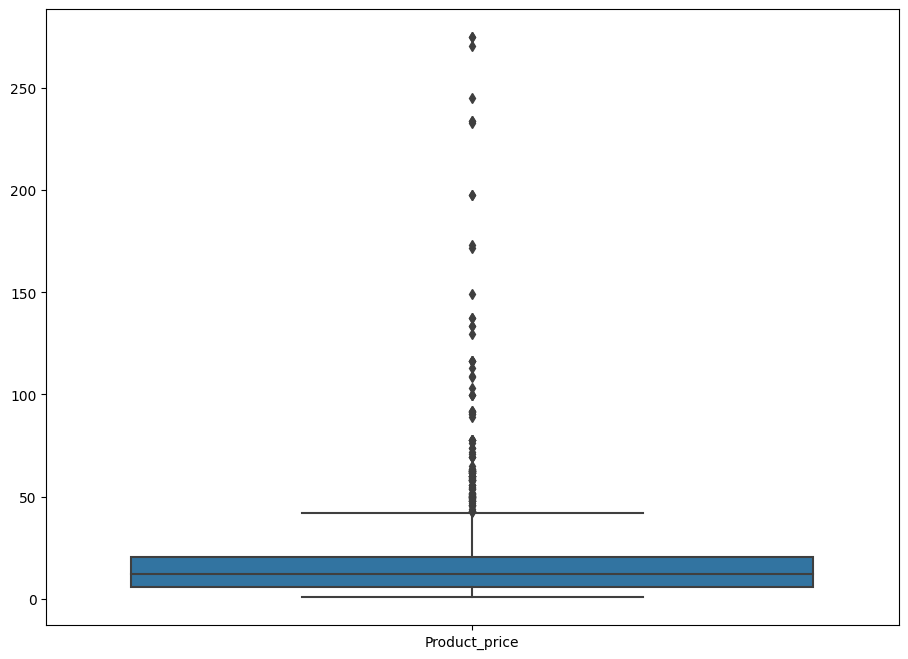

In [125]:
plt.figure(figsize=(11,8))
sns.boxplot(data= df_my_halal[['Product_price']])

In [126]:
Q1 = df_my_halal['Product_price'].quantile(0.25)
Q3 = df_my_halal['Product_price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_my_halal = df_my_halal[(df_my_halal['Product_price'] >= lower_bound) & (df_my_halal['Product_price'] <= upper_bound)]

<Axes: >

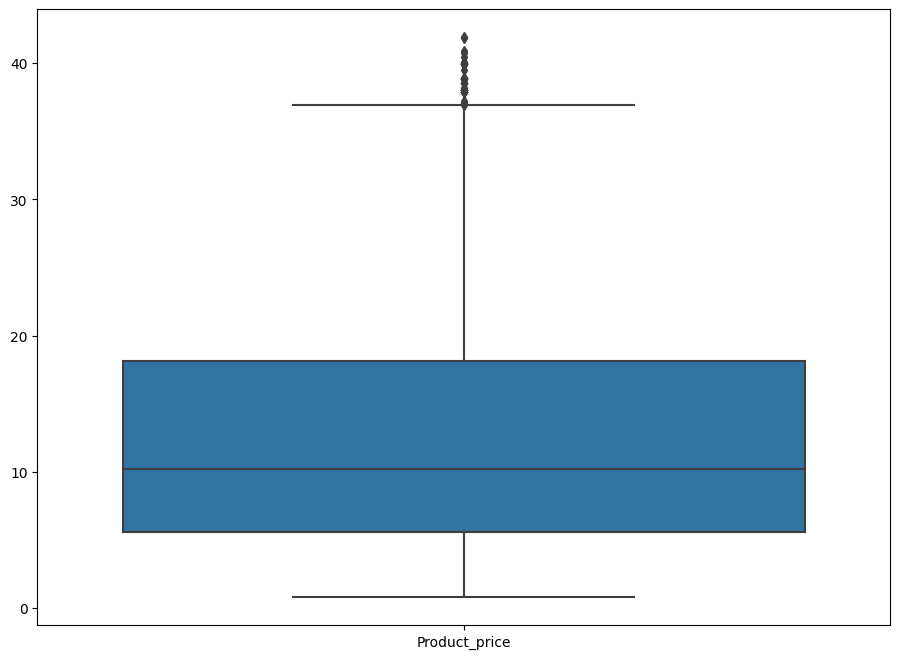

In [127]:
plt.figure(figsize=(11,8))
sns.boxplot(data= df_my_halal[['Product_price']])

<Axes: >

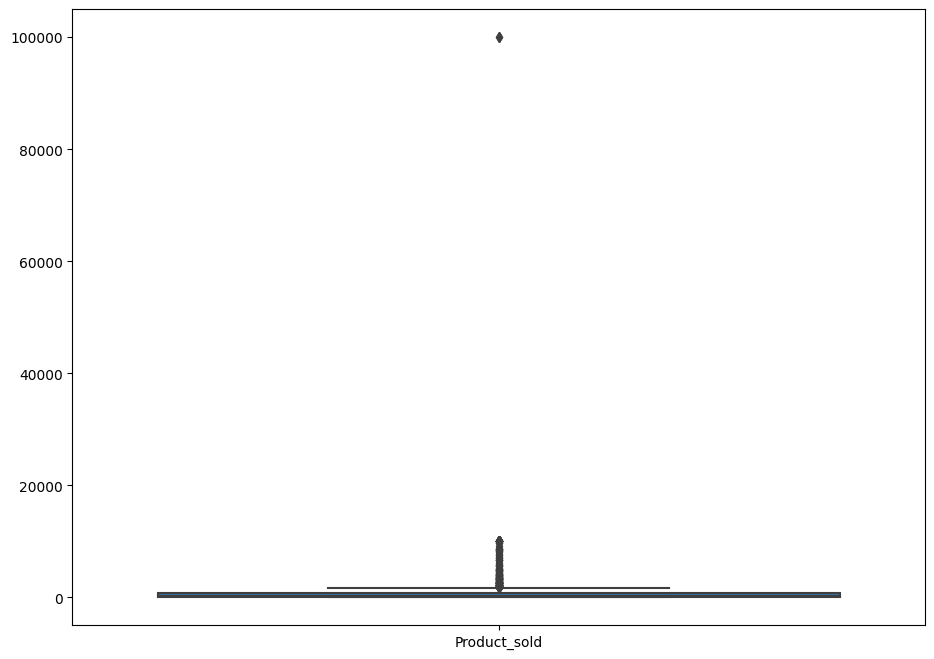

In [128]:
plt.figure(figsize=(11,8))
sns.boxplot(data= df_my_halal[['Product_sold']])

In [129]:
df_my_halal = df_my_halal.loc[(df_my_halal['Product_sold'] >= 300.0) & (df_my_halal['Product_sold'] <= 2000)]

In [130]:
for i in range(0,2):
    Q1 = df_my_halal['Product_sold'].quantile(0.25)
    Q3 = df_my_halal['Product_sold'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df_my_halal = df_my_halal[(df_my_halal['Product_sold'] >= lower_bound) & (df_my_halal['Product_sold'] <= upper_bound)]
    i+=1

<Axes: >

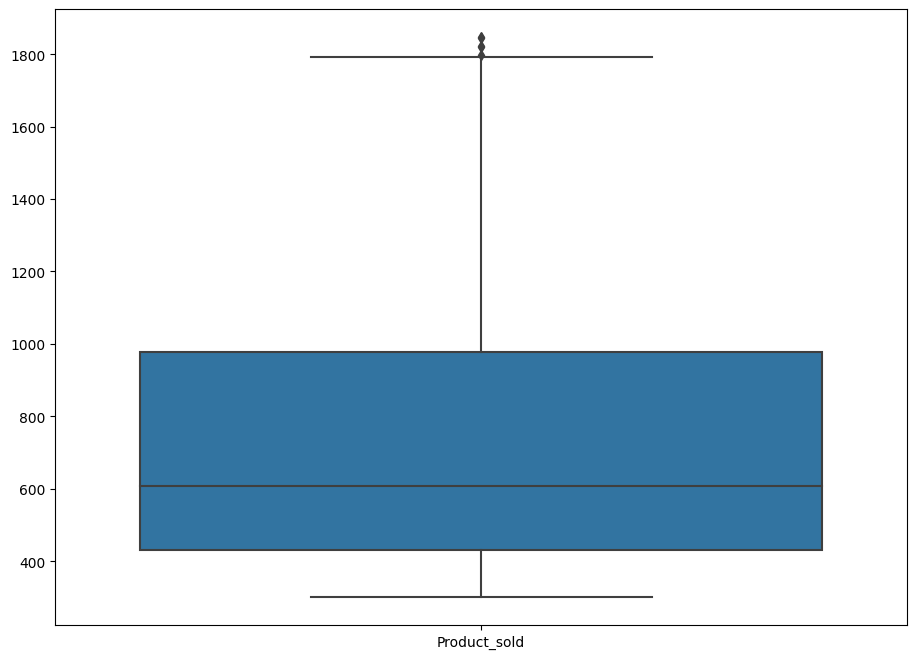

In [131]:
plt.figure(figsize=(11,8))
sns.boxplot(data= df_my_halal[['Product_sold']])

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\2022671838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_my_halal.corr(), annot=True)


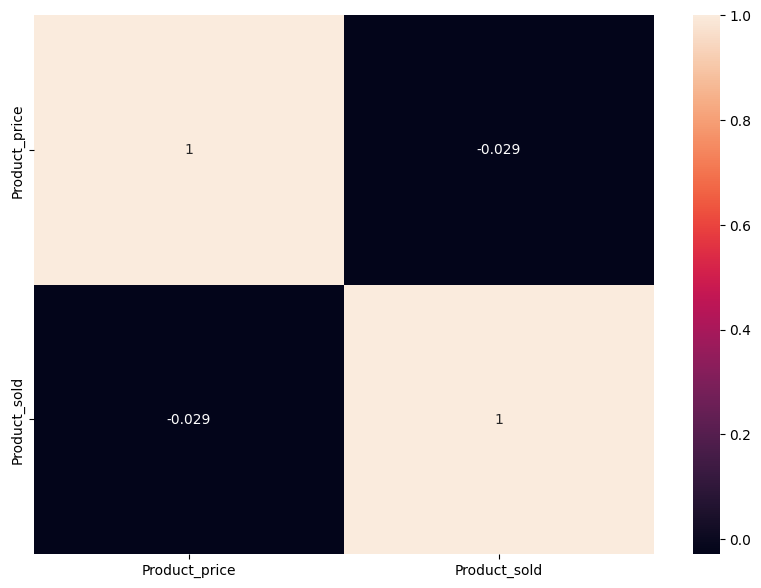

In [132]:
plt.figure(figsize=(10,7))
sns.heatmap(df_my_halal.corr(), annot=True)
plt.show()

In [133]:
df_my_halal['Product_revenue'] = df_my_halal['Product_price'] * df_my_halal['Product_sold']

In [134]:
df_my_halal['Country_label'] = 'MY'

In [135]:
df_my_halal.describe()

Product_price  Product_sold  Product_revenue
count         378.00        378.00           378.00
mean           11.99        742.84          8808.19
std             8.55        390.92          7954.39
min             0.85        301.00           430.26
25%             5.25        432.50          3321.05
50%             9.73        608.00          6594.74
75%            16.03        977.00         11708.09
max            39.90       1847.00         59529.60

In [136]:
df_my_halal = df_my_halal.reset_index(drop=True)
df_my_halal

Product_name  Product_price  \
0                  MAGGI Nutrilicious Aglio Olio 5x77g           8.28   
1       MAGGI Marinade Paste Ayam Goreng Berempah 100g           4.40   
2                         MAGGI Liquid Seasoning 200ml           6.78   
3    Maggi Hot Cup Chicken (6 x 57g) [KL & Selangor...          12.82   
4    CLS Maggi Mee / Mi Segera 2 - MINN / Minit Per...           1.00   
..                                                 ...            ...   
373  SAFI Naturals Facial Scrub Habbatus Sauda 100g...          10.98   
374           Safi Shayla Shampoo 640g ( 520g + 120g )          15.90   
375  Safi Deodorant Anti Perspirant Anti-Peluh 24 J...           5.26   
376  SAFI SHAYLA Shampoo Smooth & Manageable [Halal...          12.87   
377  Safi Shayla Botanical Silk Shampoo (480g) - 4 ...          15.29   

     Product_sold Product_location Product_category  Product_revenue  \
0             966         Selangor  Makanan/minuman          7998.48   
1             395         Selangor  Makanan/minuman          1738.00   
2             922         Selangor  Makanan/minuman          6251.16   
3            1029  Wp Kuala Lumpur  Makanan/minuman         13191.78   
4             442         Selangor  Makanan/minuman           442.00   
..            ...              ...              ...              ...   
373           867         Selangor  Makanan/minuman          9519.66   
374           474            Perak  Makanan/minuman          7536.60   
375           377            Perak  Makanan/minuman          1983.02   
376           571         Selangor  Makanan/minuman          7348.77   
377           333            Perak  Makanan/minuman          5091.57   

    Country_label  
0              MY  
1              MY  
2              MY  
3              MY  
4              MY  
..            ...  
373            MY  
374            MY  
375            MY  
376            MY  
377            MY  

[378 rows x 7 columns]

In [137]:
df_my_halal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      378 non-null    object 
 1   Product_price     378 non-null    float64
 2   Product_sold      378 non-null    int32  
 3   Product_location  378 non-null    object 
 4   Product_category  378 non-null    object 
 5   Product_revenue   378 non-null    float64
 6   Country_label     378 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 19.3+ KB


C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\2022671838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_my_halal.corr(), annot=True)


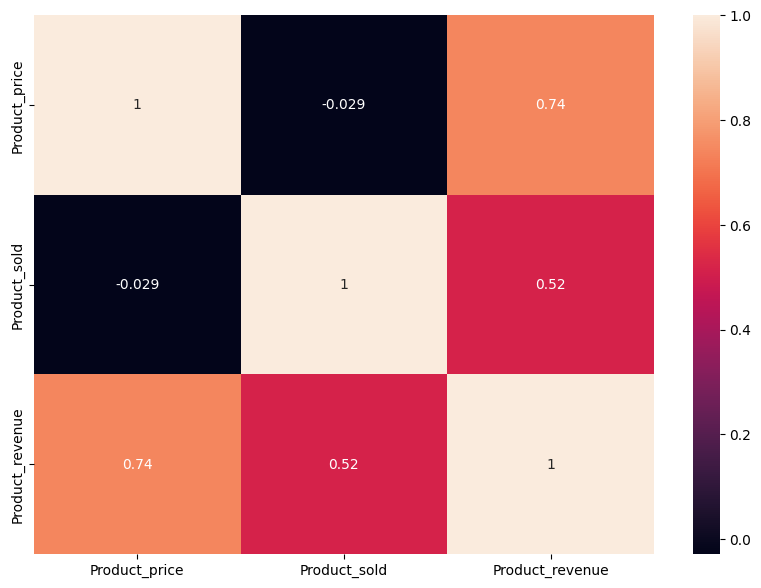

In [138]:
plt.figure(figsize=(10,7))
sns.heatmap(df_my_halal.corr(), annot=True)
plt.show()

In [139]:
# Querry
Category_my_halal = df_my_halal['Product_category'].value_counts()
Location_my_halal = df_my_halal['Product_location'].value_counts()
Sold_my_halal = df_my_halal.groupby('Product_category')['Product_sold'].sum()
Location_my_halal = Location_my_halal.head(5)

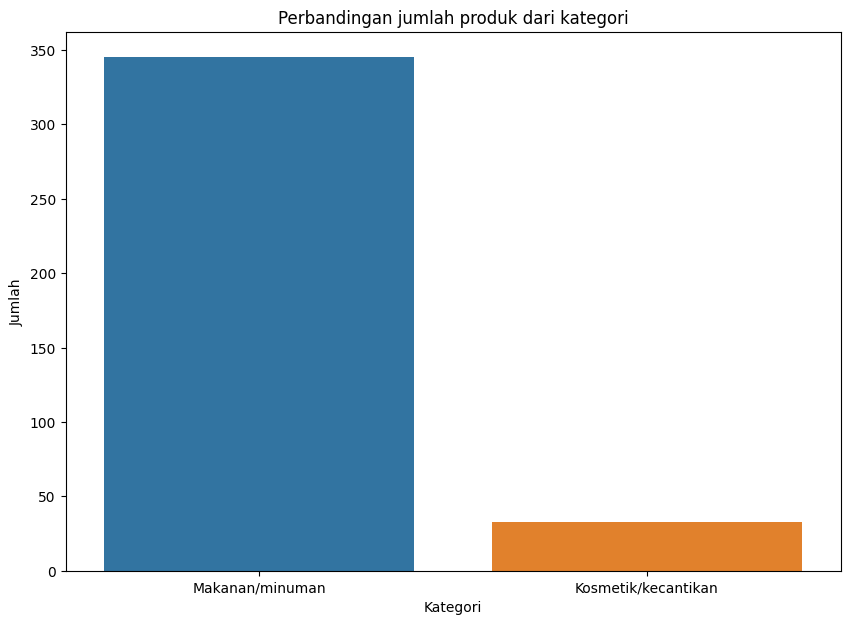

In [140]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_my_halal.index, y= Category_my_halal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk dari kategori')
plt.show()

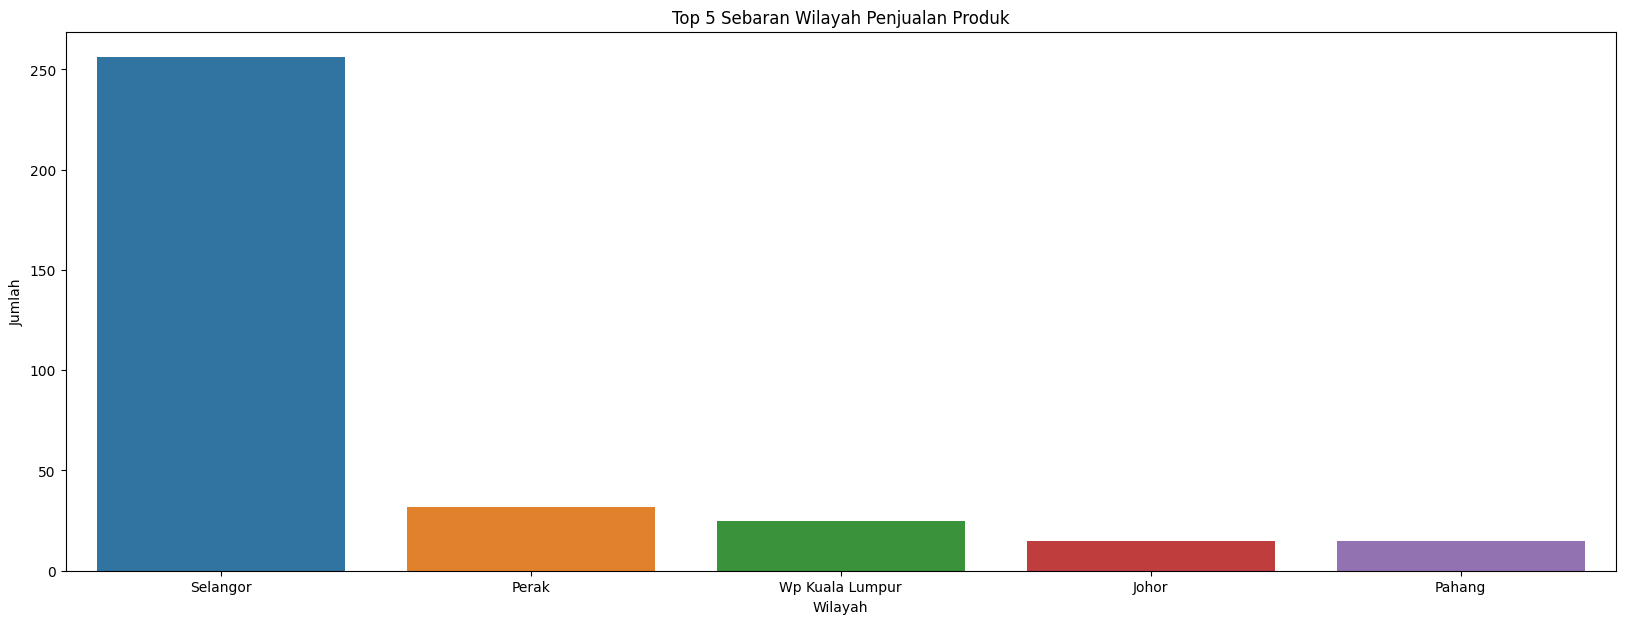

In [141]:
plt.figure(figsize=(20,7))
sns.barplot(x= Location_my_halal.index, y= Location_my_halal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

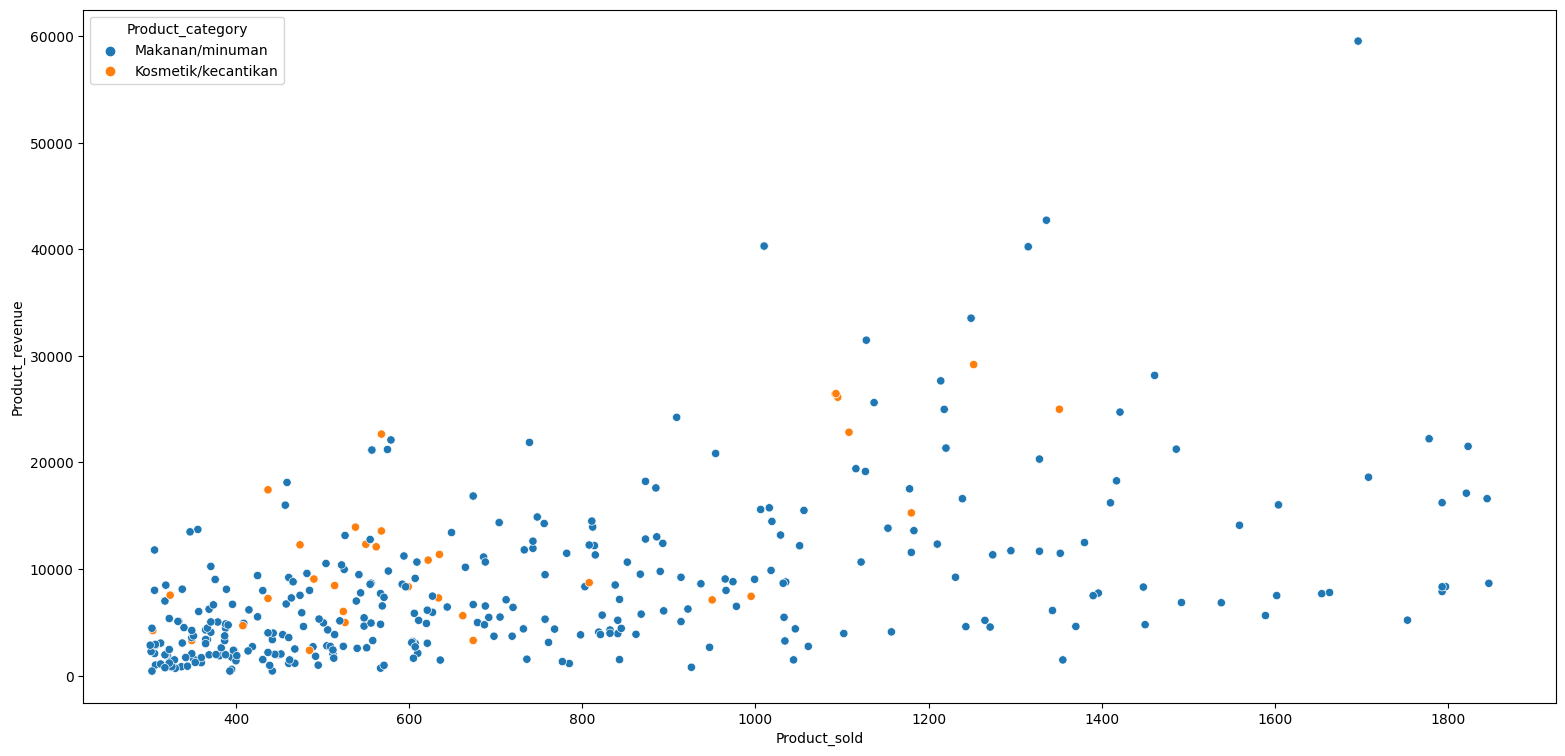

In [142]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue= 'Product_category', data=df_my_halal)
plt.show()

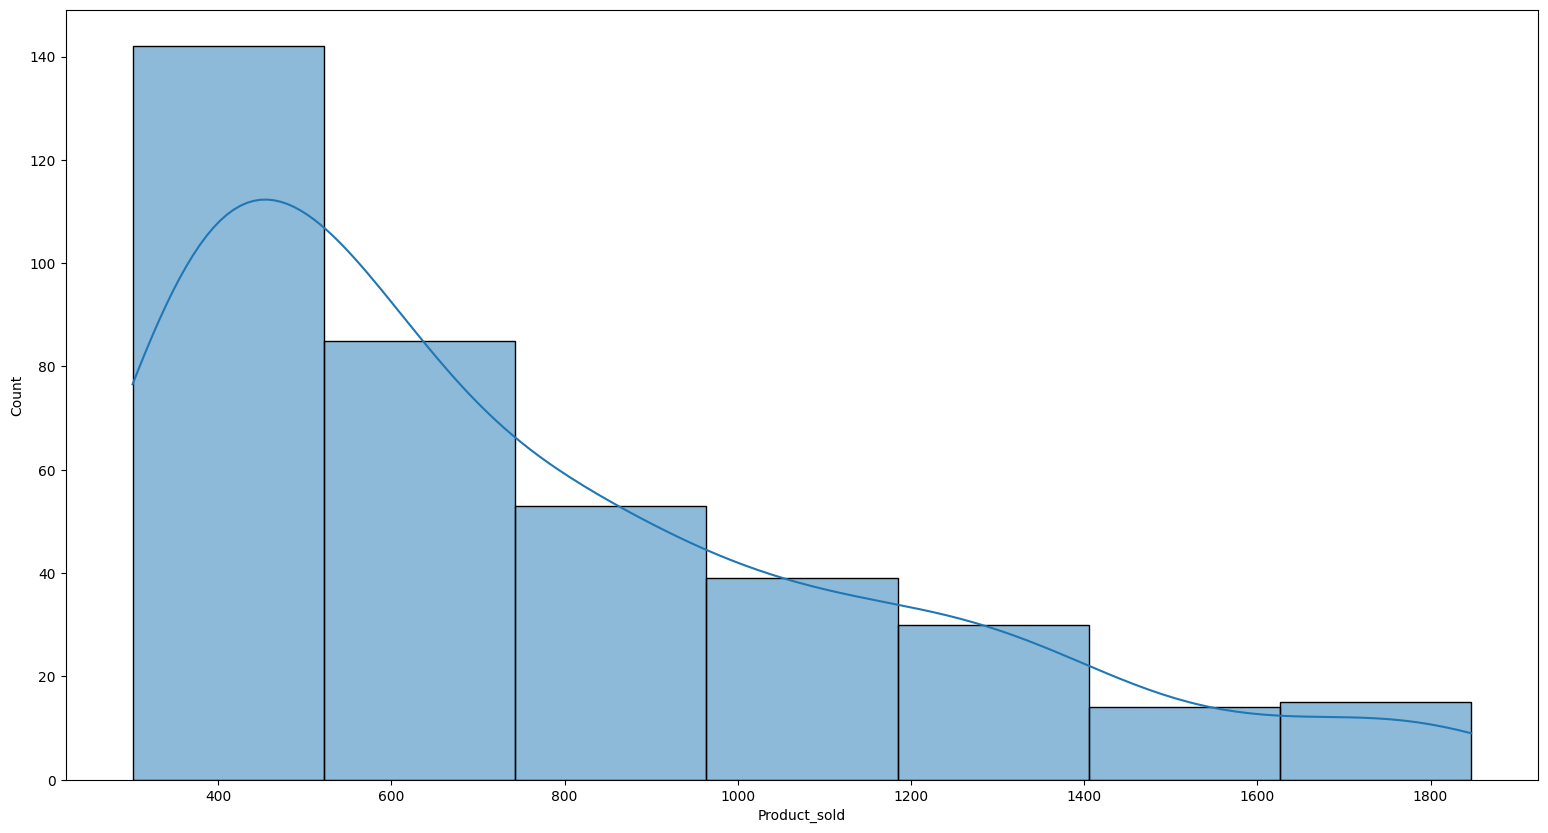

In [143]:
plt.figure(figsize=(19,10))
sns.histplot(df_my_halal['Product_sold'], kde=True, bins= 7)
plt.show()

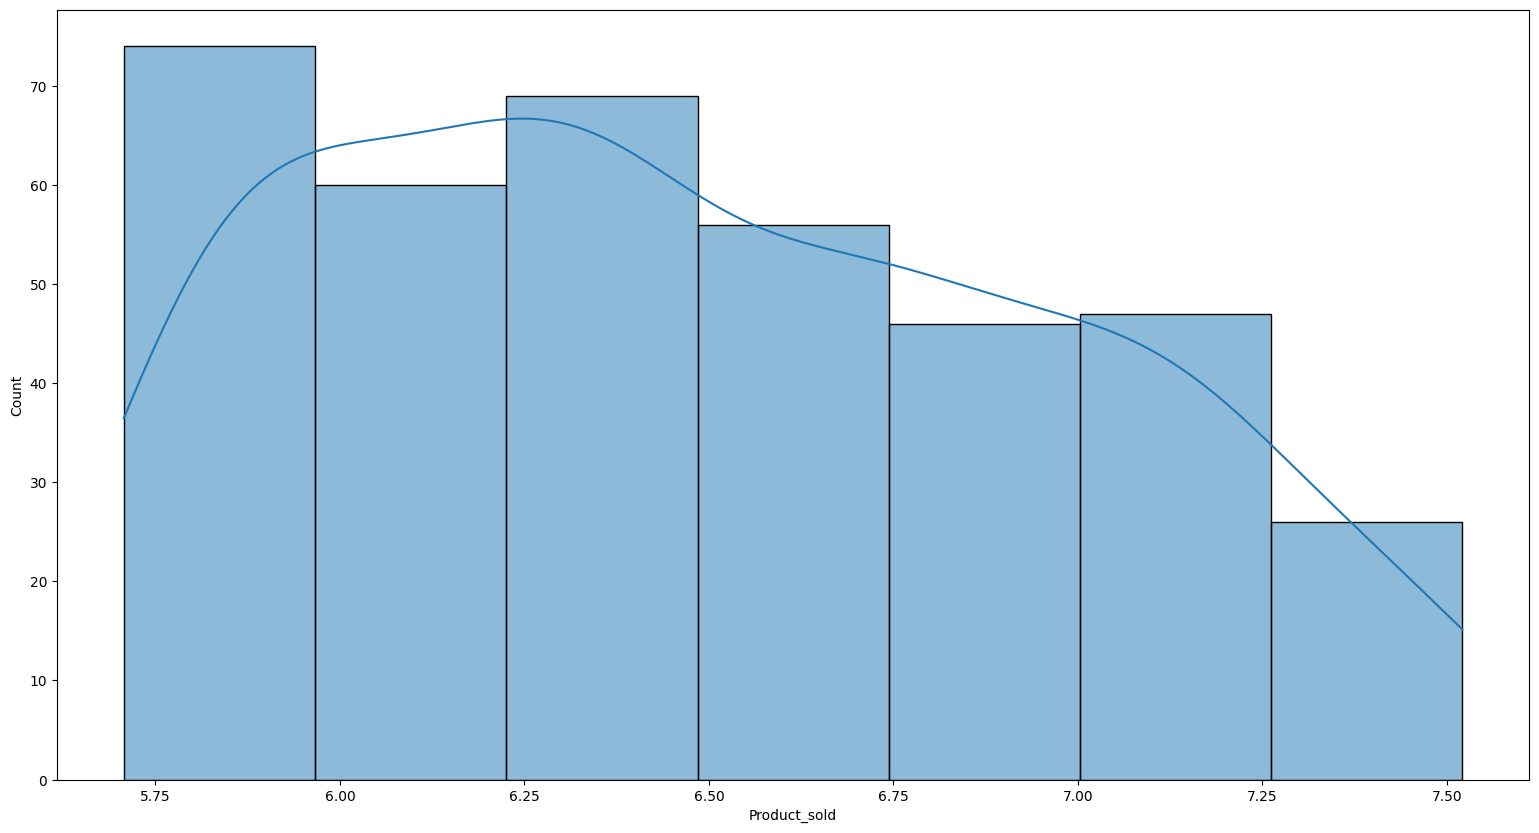

In [144]:
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_my_halal['Product_sold']), kde=True, bins= 7)
plt.show()

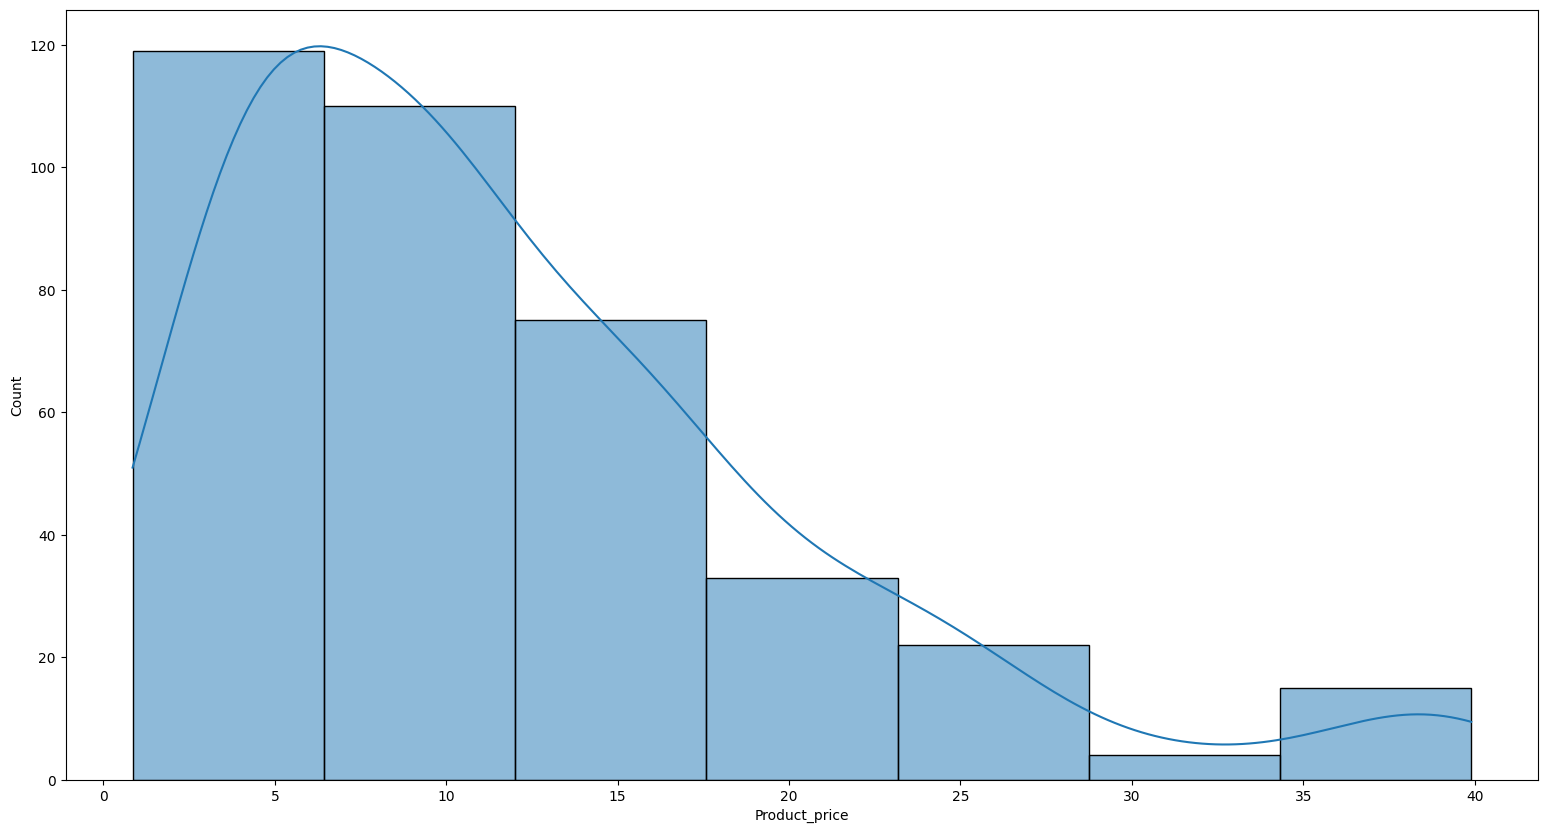

In [145]:
plt.figure(figsize=(19,10))
sns.histplot(df_my_halal['Product_price'], kde=True, bins= 7)
plt.show()

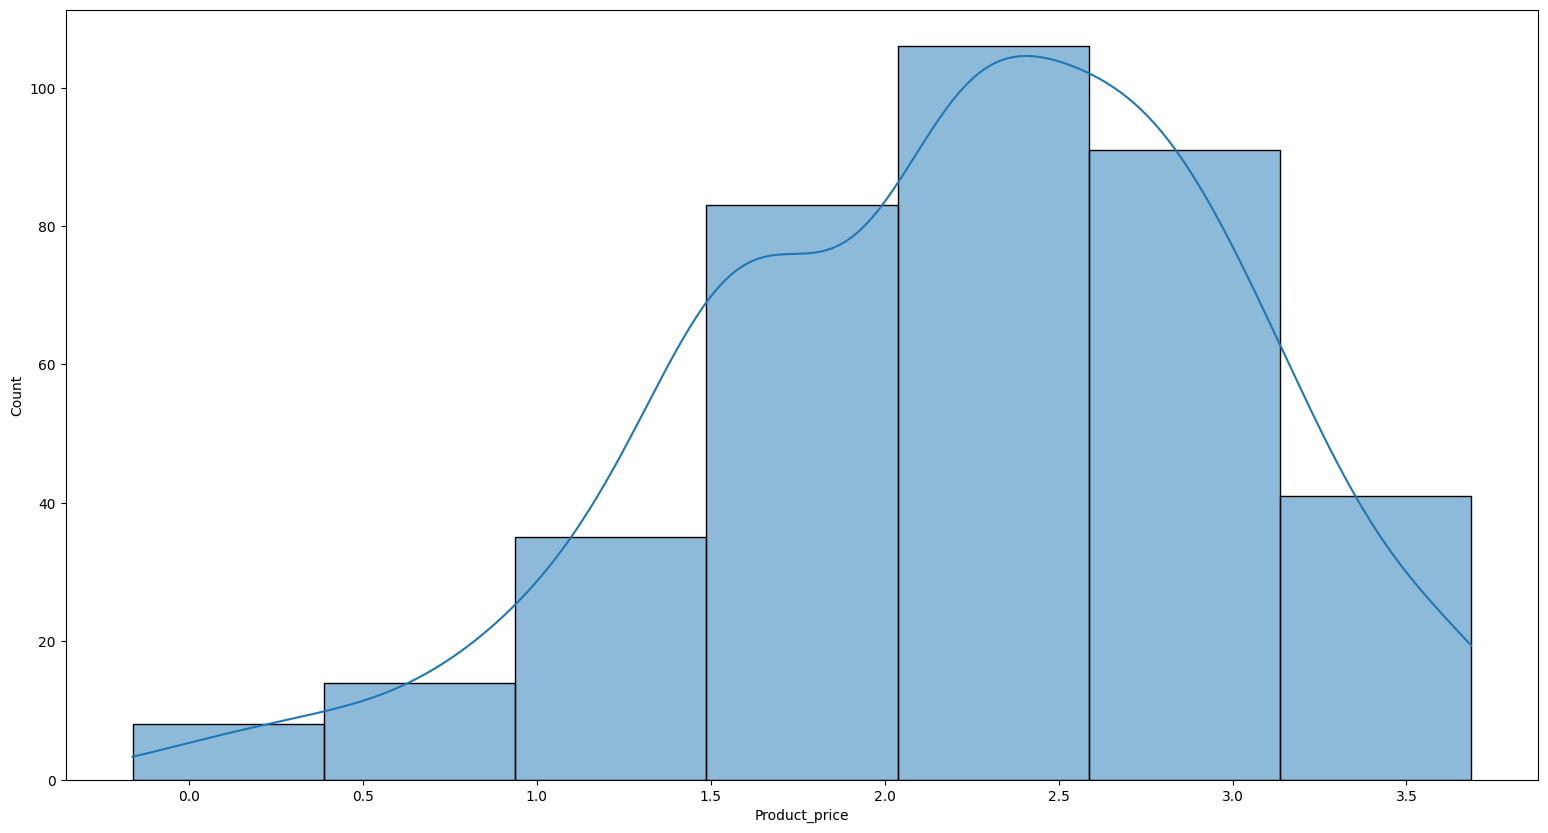

In [146]:
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_my_halal['Product_price']), kde=True, bins= 7)
plt.show()

#### Data Non-Halal Malaysia

In [147]:
df_my_nonhalal

Product_name  Product_price  \
0     [BBD: 2/7/2023] Kirin Ichiban Japanese Beer Ca...          59.99   
1               Carlsberg Danish Pilsner 320ml /per Can           6.99   
2               Carlsberg Danish Pilsner 320ml / 6 cans          39.99   
3       Erdinger Weissbier with Fine Yeast Beer (500ml)          22.50   
5              Franziskaner Hefe Weissbier Beer (500ml)          24.00   
...                                                 ...            ...   
1226  COSRX Centella Water Alcohol Free Toner 150ml ...          35.00   
1227               COSRX Sunny Snail Tone Up Cream 50ml          51.00   
1228  COSRX Full Fit Propolis Toner 280ML / Hydrium ...          27.70   
1229  Cosrx Acne Pimple Master Patch (24 patches) / ...           8.50   
1230  Cosrx Good Morning & Salicylic Acid Daily Gent...          26.50   

      Product_sold Product_location     Product_category  
0                5         Selangor      Makanan/minuman  
1              134       Terengganu      Makanan/minuman  
2               18       Terengganu      Makanan/minuman  
3                5         Selangor      Makanan/minuman  
5               13         Selangor      Makanan/minuman  
...            ...              ...                  ...  
1226           108  Wp Kuala Lumpur  Kosmetik/kecantikan  
1227            14  Wp Kuala Lumpur  Kosmetik/kecantikan  
1228           133         Selangor  Kosmetik/kecantikan  
1229           452  Wp Kuala Lumpur  Kosmetik/kecantikan  
1230            74  Wp Kuala Lumpur  Kosmetik/kecantikan  

[933 rows x 5 columns]

In [148]:
df_my_nonhalal.describe()

Product_price  Product_sold
count         933.00        933.00
mean           36.97        867.38
std            39.03       1757.40
min             1.60          5.00
25%             8.94         46.00
50%            28.39        161.00
75%            49.29        785.00
max           372.00       9999.00

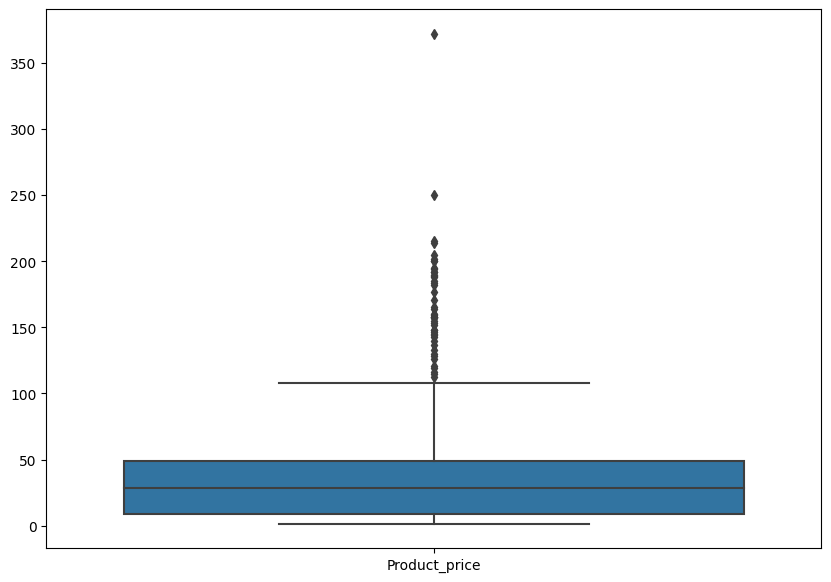

In [149]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_my_nonhalal[['Product_price']])
plt.show()

In [150]:
Q1 = df_my_nonhalal['Product_price'].quantile(0.25)
Q3 = df_my_nonhalal['Product_price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


df_my_nonhalal = df_my_nonhalal[(df_my_nonhalal['Product_price'] >= lower_bound) & (df_my_nonhalal['Product_price'] <= upper_bound)]

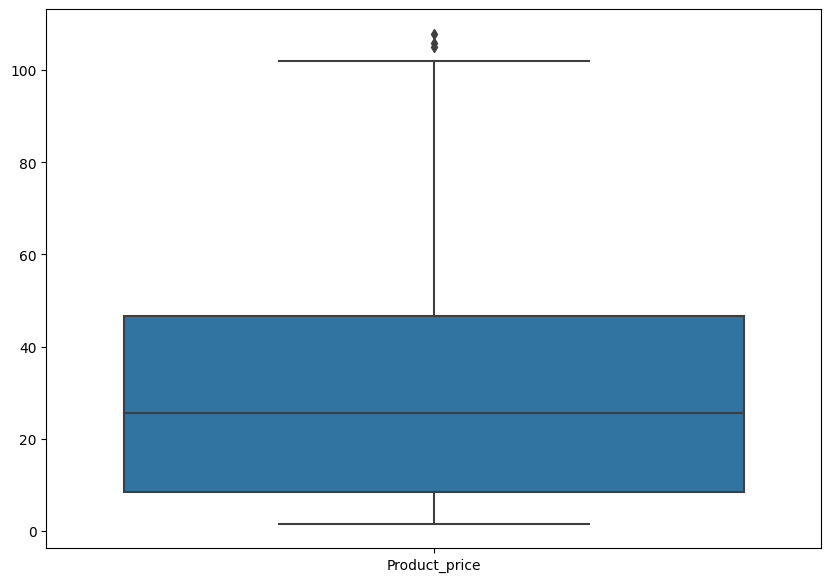

In [151]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_my_nonhalal[['Product_price']])
plt.show()

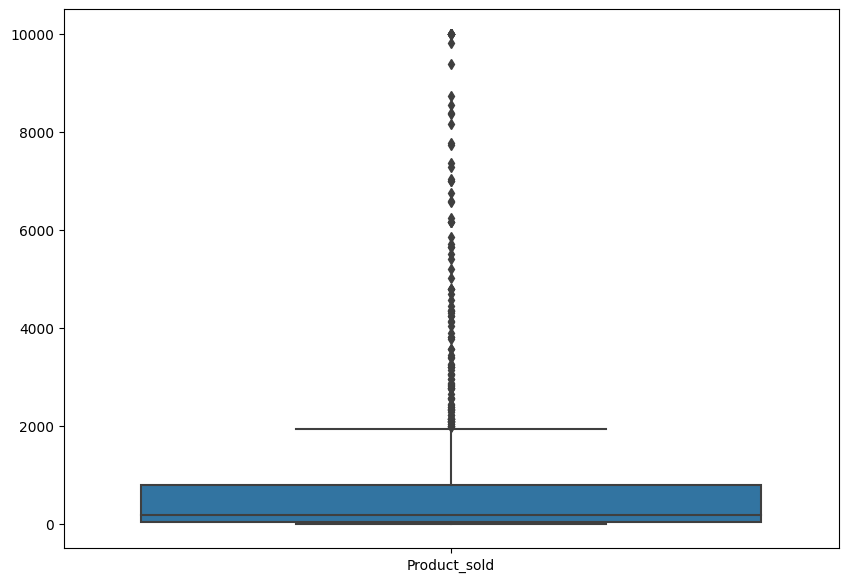

In [152]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_my_nonhalal[['Product_sold']])
plt.show()

In [153]:
df_my_nonhalal = df_my_nonhalal.loc[(df_my_nonhalal['Product_sold'] >= 150.0) & (df_my_nonhalal['Product_sold'] <= 3000)]

In [154]:
for i in range(0,2):
    Q1 = df_my_nonhalal['Product_sold'].quantile(0.25)
    Q3 = df_my_nonhalal['Product_sold'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR


    df_my_nonhalal = df_my_nonhalal[(df_my_nonhalal['Product_sold'] >= lower_bound) & (df_my_nonhalal['Product_sold'] <= upper_bound)]
    i+=1

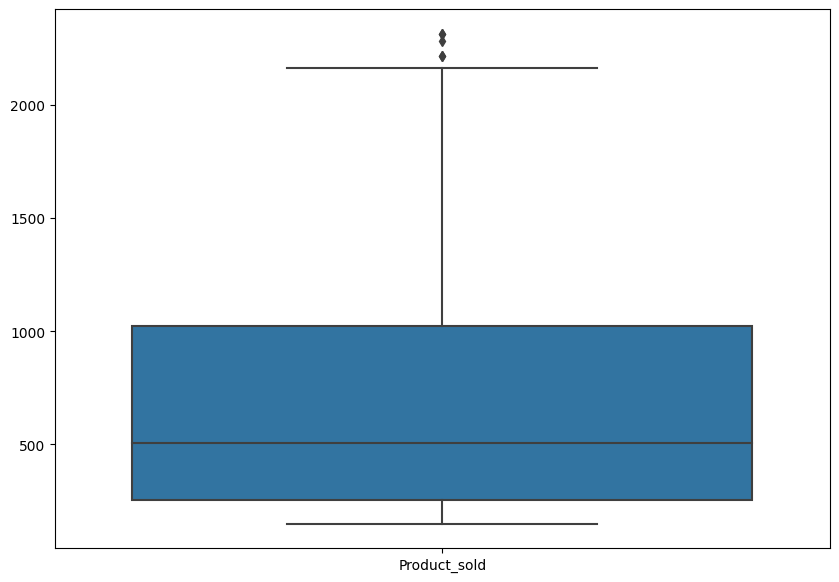

In [155]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_my_nonhalal[['Product_sold']])
plt.show()

In [156]:
df_my_nonhalal['Product_revenue'] = df_my_nonhalal['Product_price'] * df_my_nonhalal['Product_sold']

In [157]:
df_my_nonhalal['Country_label'] = 'MY'

In [158]:
df_my_nonhalal.describe()

Product_price  Product_sold  Product_revenue
count         382.00        382.00           382.00
mean           29.12        726.86         20092.48
std            22.02        579.46         23122.92
min             1.60        150.00           481.95
25%             8.21        255.00          4094.64
50%            26.65        507.50         10971.60
75%            45.49       1024.75         26571.87
max           107.90       2314.00        127338.75

In [159]:
# Querry
Category_my_nonhalal = df_my_nonhalal['Product_category'].value_counts()
Location_my_nonhalal = df_my_nonhalal['Product_location'].value_counts()
Sold_my_nonalal = df_my_nonhalal.groupby('Product_category')['Product_sold'].sum()
Location_my_nonhalal = Location_my_nonhalal.head(5)

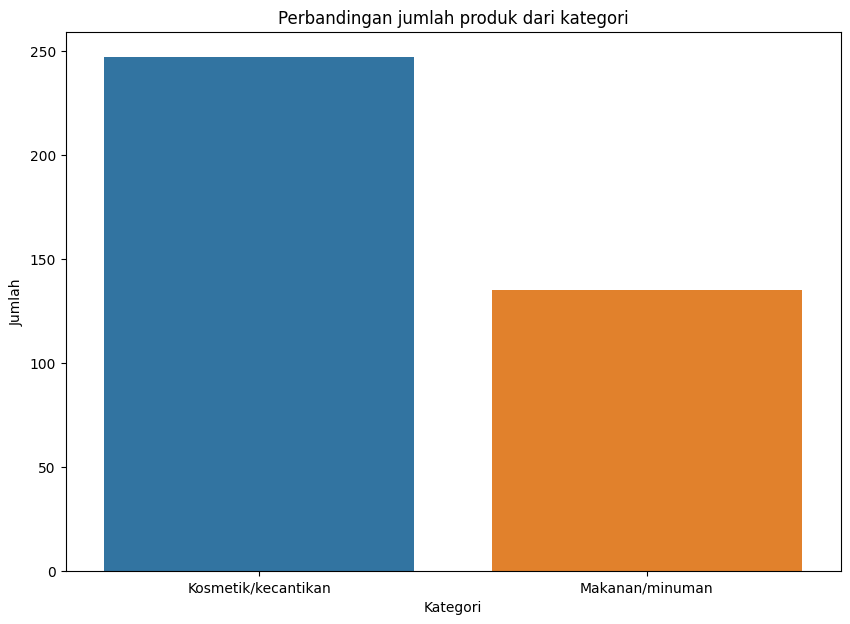

In [160]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_my_nonhalal.index, y= Category_my_nonhalal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk dari kategori')
plt.show()

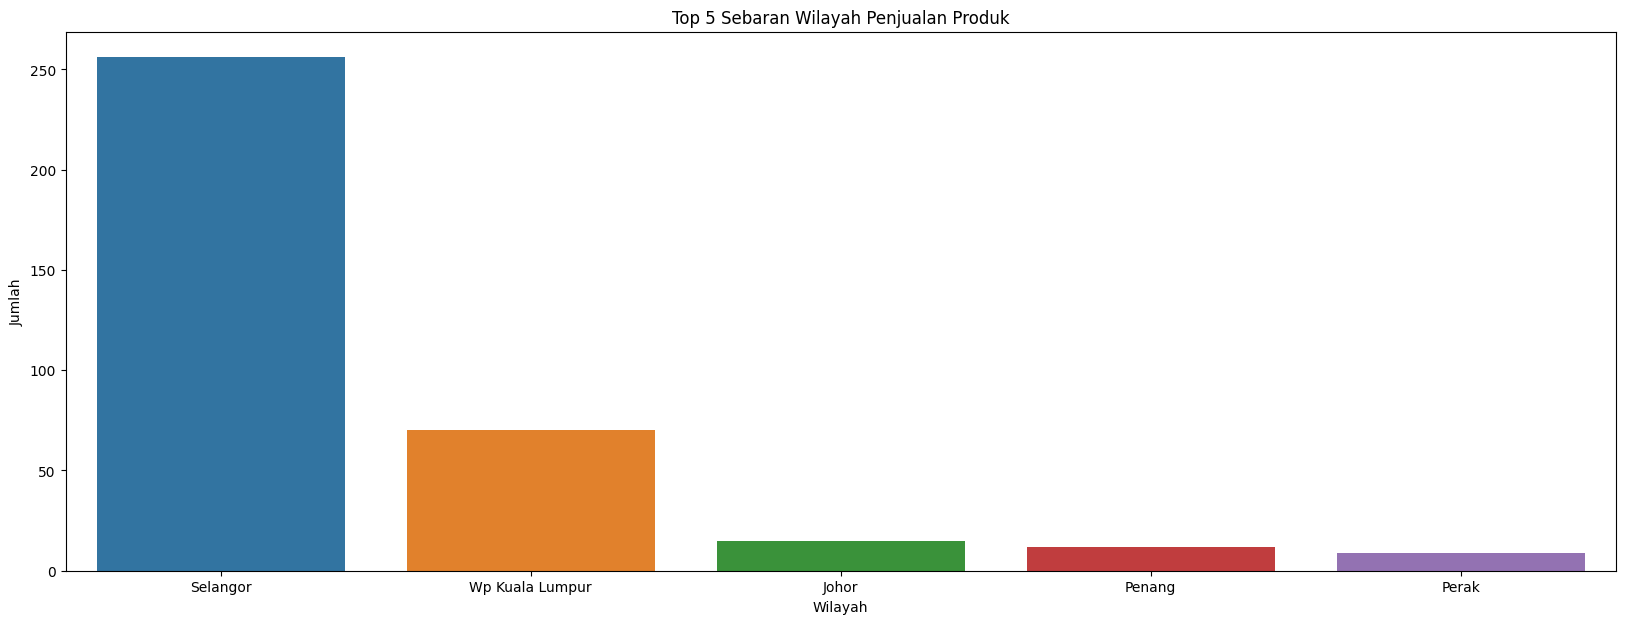

In [161]:
plt.figure(figsize=(20,7))
sns.barplot(x= Location_my_nonhalal.index, y= Location_my_nonhalal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\335733985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_my_nonhalal.corr(), annot=True)


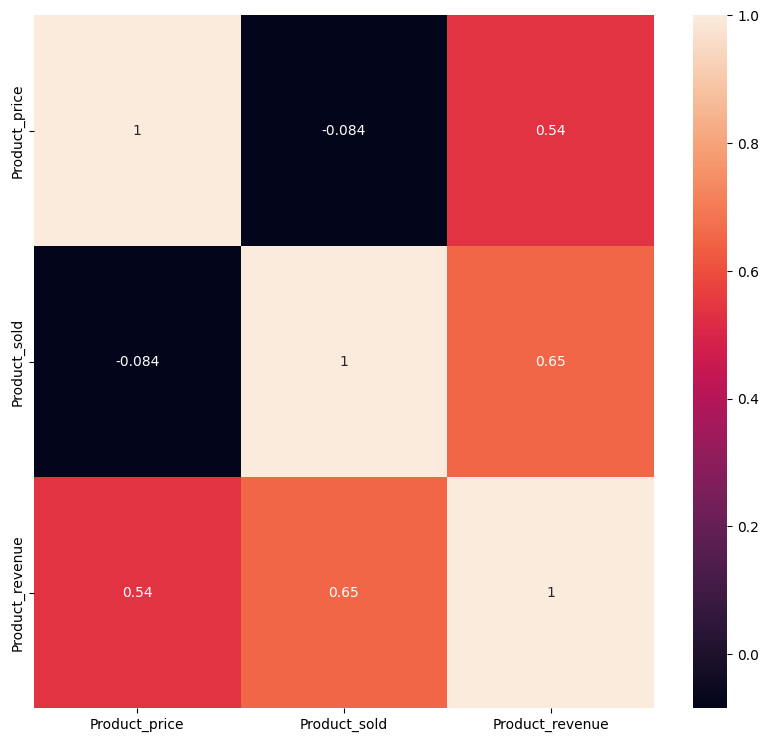

In [162]:
plt.figure(figsize=(10,9))
sns.heatmap(df_my_nonhalal.corr(), annot=True)
plt.show()

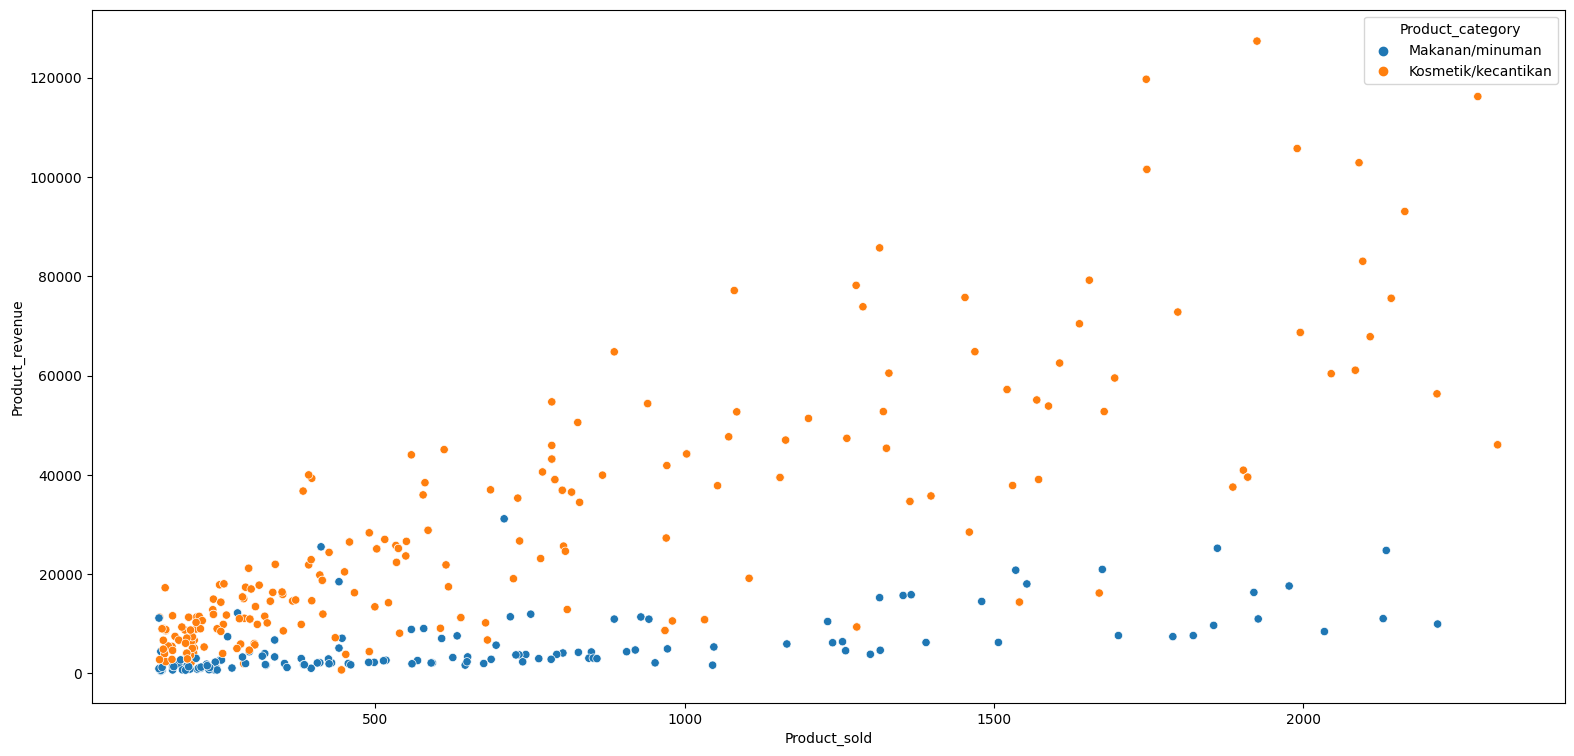

In [163]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue= 'Product_category', data=df_my_nonhalal)
plt.show()

In [164]:
df_my_nonhalal = df_my_nonhalal.reset_index(drop=True)
df_my_nonhalal

Product_name  Product_price  \
0    Korea’s No 1 CASS FRESH Beer (6 x 355ml) Cold ...          61.90   
1                             PAULANER WEISSBIER 510ML          29.00   
2                            Tiger Beer Can 6s x 320ml          44.00   
3    LOreal Paris Men Expert Hydra Energetic X Crea...          40.41   
4    LOreal Paris Elseve Total Repair 5 Repairing C...          15.04   
..                                                 ...            ...   
377    COSRX AC Collection Calming Foam Cleanser 150ml          31.50   
378         COSRX Full Fit Propolis Light Ampoule 30ml          57.00   
379  [Cosrx] Acne Pimple Master Patch - 24 patches ...           9.00   
380  COSRX Balancium Comfort Ceramide Cream Mist 120ml          47.00   
381  Cosrx Acne Pimple Master Patch (24 patches) / ...           8.50   

     Product_sold Product_location     Product_category  Product_revenue  \
0             412  Wp Kuala Lumpur      Makanan/minuman         25502.80   
1             153           Penang      Makanan/minuman          4437.00   
2             277         Selangor      Makanan/minuman         12188.00   
3            1163         Selangor  Kosmetik/kecantikan         46996.83   
4             605         Selangor  Kosmetik/kecantikan          9099.20   
..            ...              ...                  ...              ...   
377           193  Wp Kuala Lumpur  Kosmetik/kecantikan          6079.50   
378           312  Wp Kuala Lumpur  Kosmetik/kecantikan         17784.00   
379           490         Selangor  Kosmetik/kecantikan          4410.00   
380           349  Wp Kuala Lumpur  Kosmetik/kecantikan         16403.00   
381           452  Wp Kuala Lumpur  Kosmetik/kecantikan          3842.00   

    Country_label  
0              MY  
1              MY  
2              MY  
3              MY  
4              MY  
..            ...  
377            MY  
378            MY  
379            MY  
380            MY  
381            MY  

[382 rows x 7 columns]

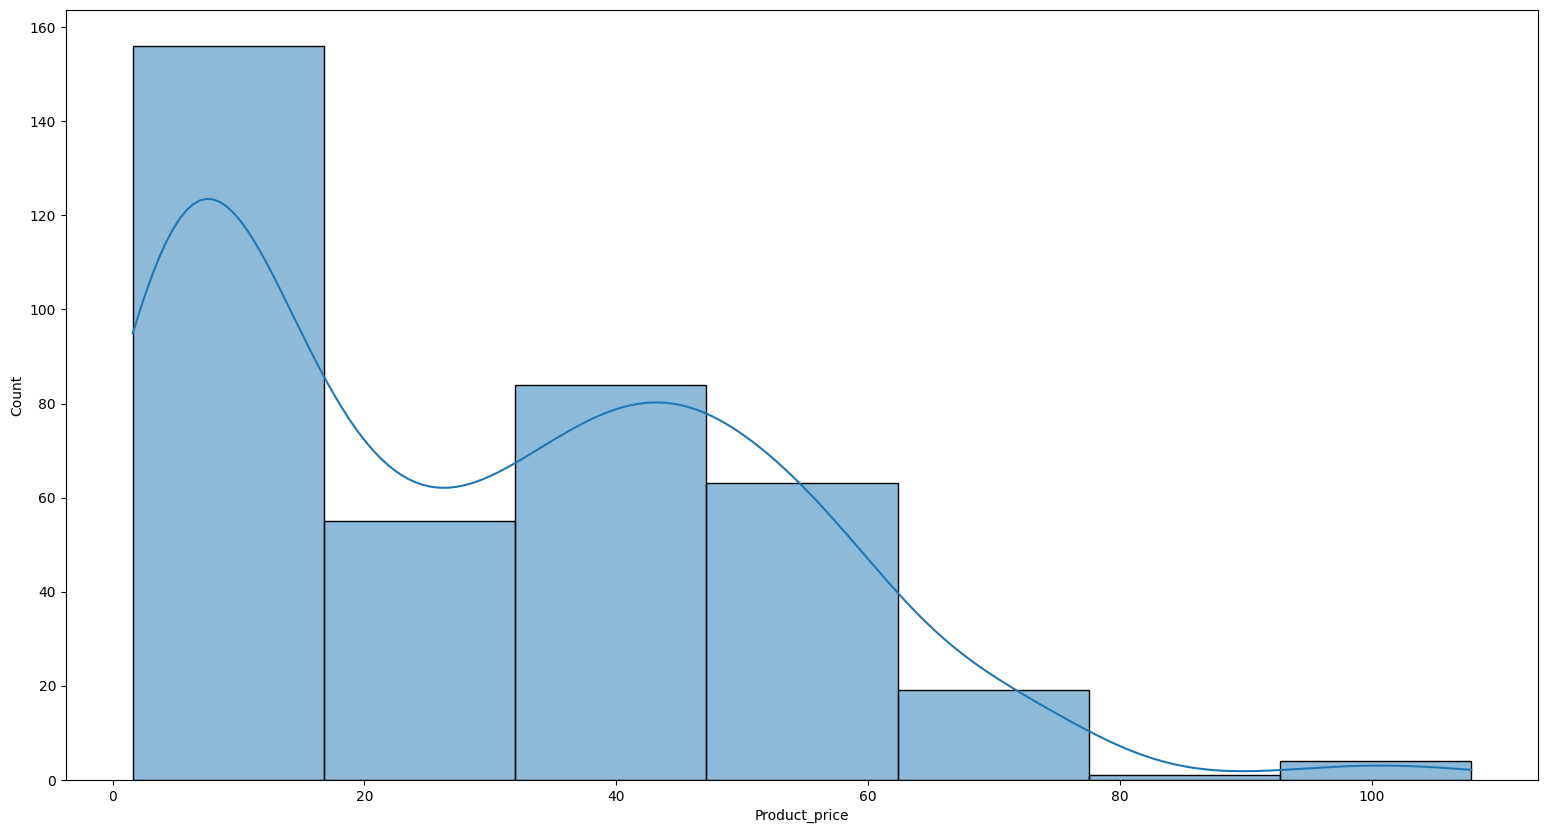

In [165]:
plt.figure(figsize=(19,10))
sns.histplot(df_my_nonhalal['Product_price'], kde=True, bins= 7)
plt.show()

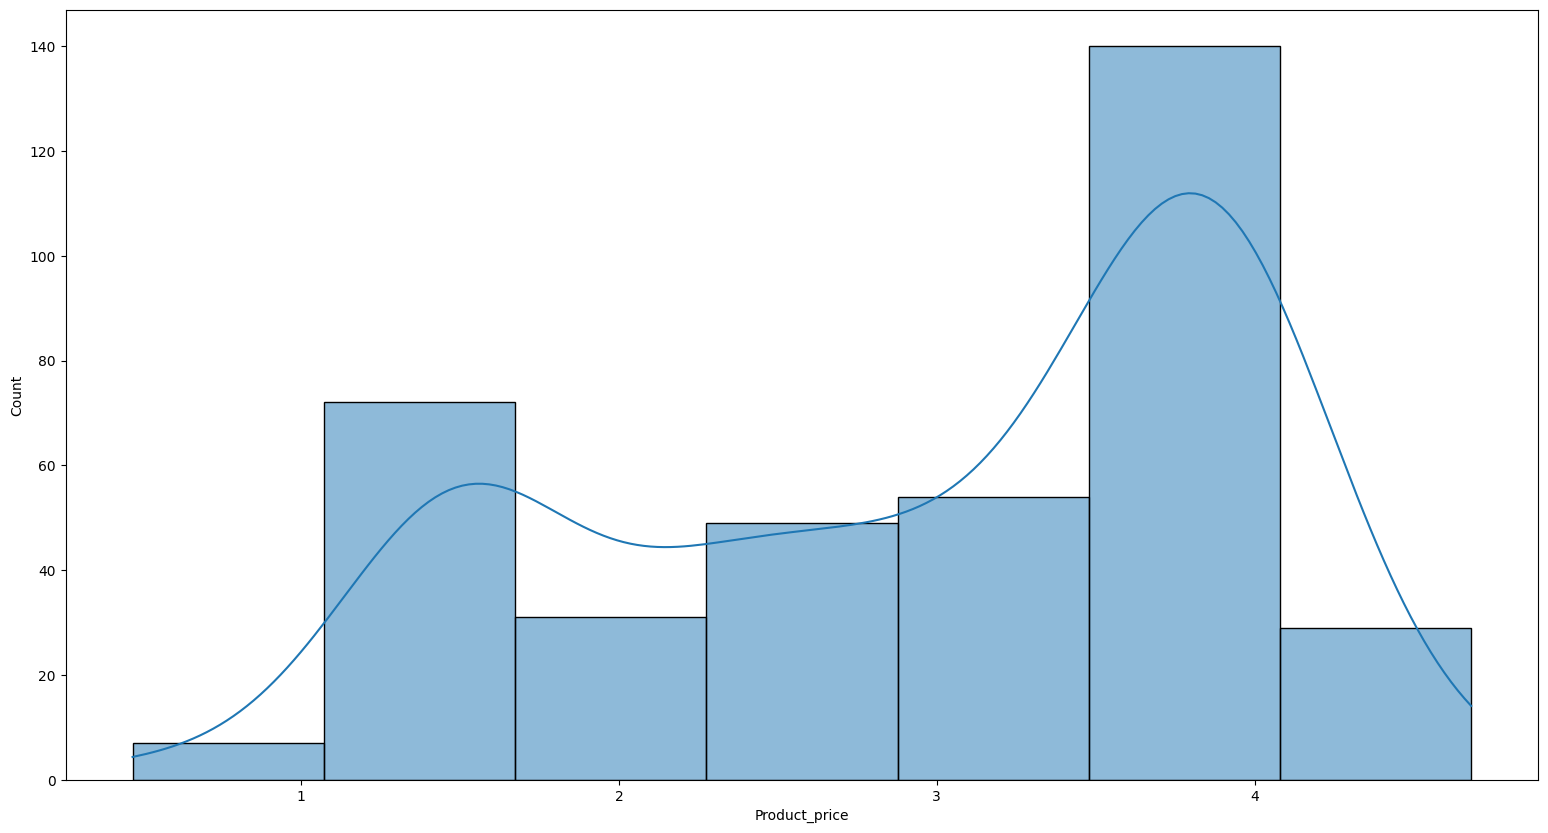

In [166]:
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_my_nonhalal['Product_price']), kde=True, bins= 7)
plt.show()

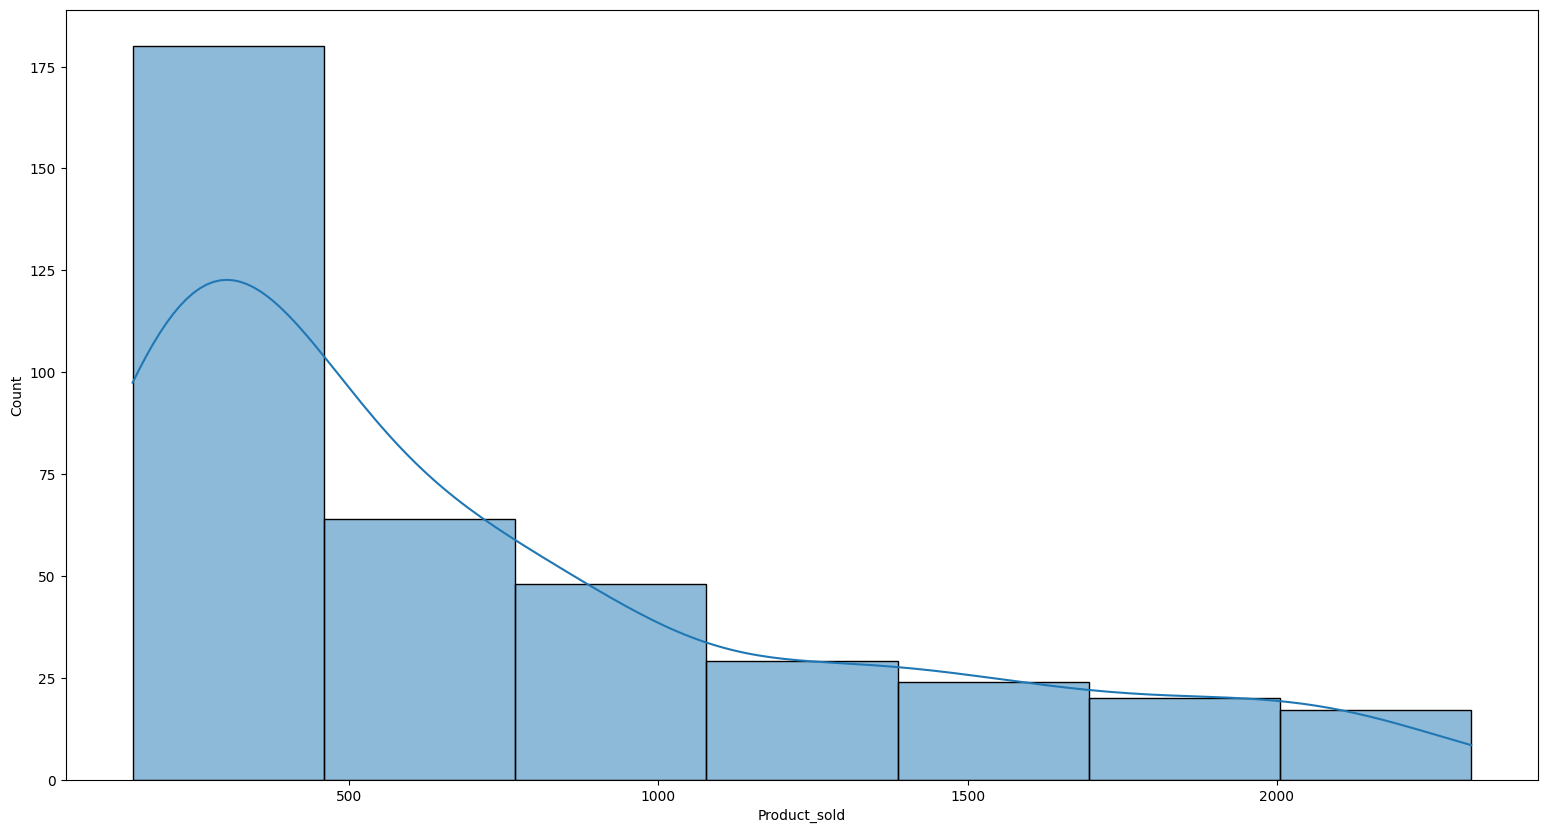

In [167]:
plt.figure(figsize=(19,10))
sns.histplot(df_my_nonhalal['Product_sold'], kde=True, bins= 7)
plt.show()

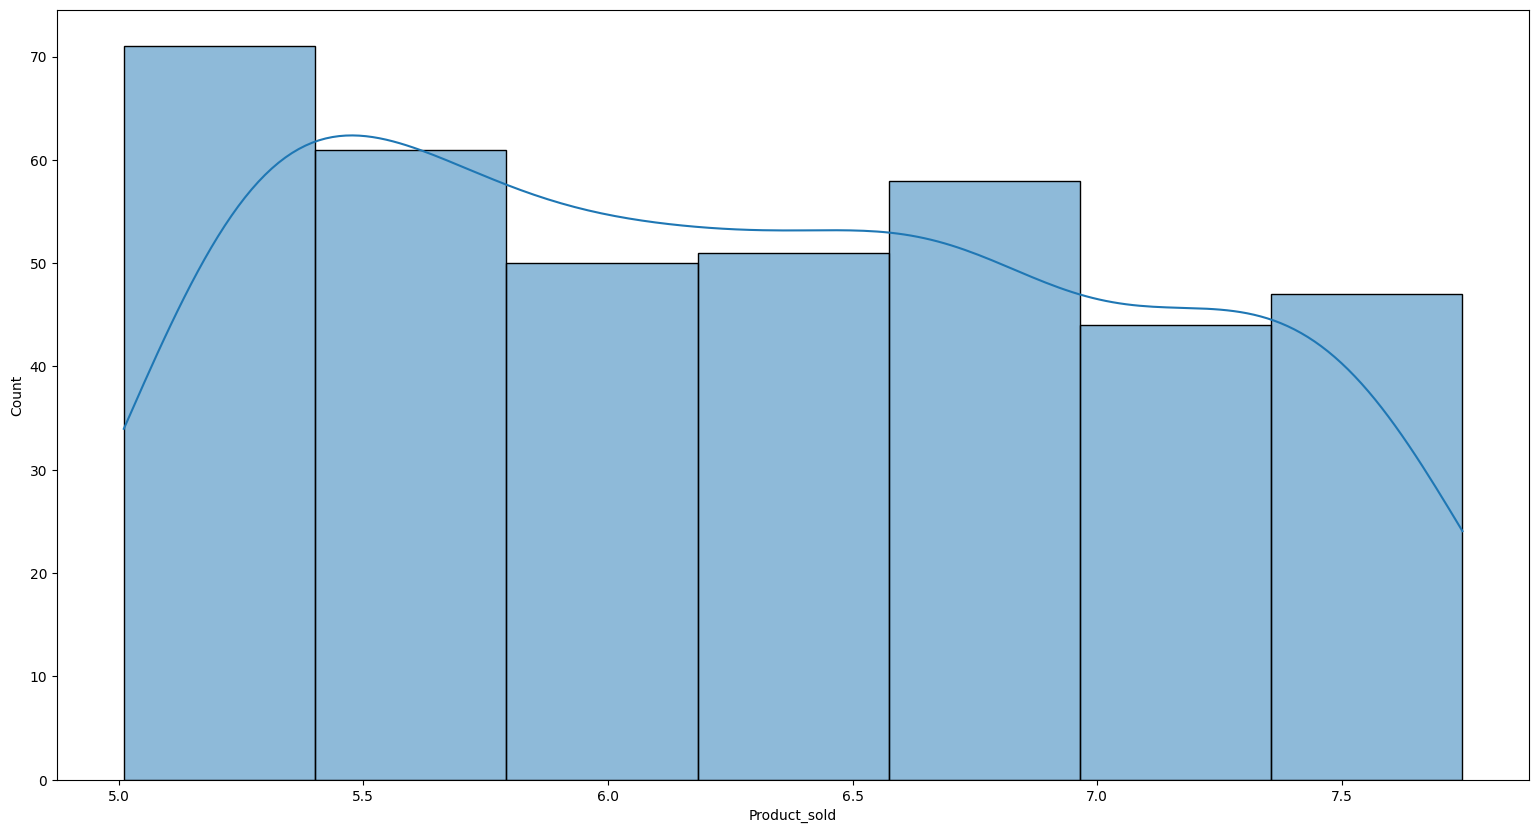

In [168]:
plt.figure(figsize=(19,10))
sns.histplot(np.log(df_my_nonhalal['Product_sold']), kde=True, bins= 7)
plt.show()

### (SG) Data Halal dan Non-Halal Singapore

#### Data Halal Singapore

In [169]:
df_sg_halal

Product_name  Product_price  \
0                     Cowhead Cheese Sandwich Crackers           2.85   
1                          Cowhead Milk Cream Crackers           2.85   
2                    Cowhead Cappuccino Butter Cookies           2.85   
3                       Cowhead Crispy Cheese Crackers           2.85   
4                       Cowhead Crispy Butter Crackers           2.85   
..                                                 ...            ...   
567  Julies Le-mond Cheddar Cheese Cream Puff Sandwich           3.23   
568  Hock Wong Pandan Tambun Biscuit 福王斑斓淡文饼 Malays...           9.40   
569  Julies Oat 25 Biscuits With Ten Grains (Laz Ma...           3.23   
571                     Julies Veggie Crackers Biscuit           2.93   
573  Julies Le-mond Cheddar Cheese Cream Puff Sandw...           3.23   

     Product_sold Product_location Product_category  
0            9999        Singapore  Makanan/minuman  
1            9999        Singapore  Makanan/minuman  
2            9999        Singapore  Makanan/minuman  
3            8135        Singapore  Makanan/minuman  
4            6547        Singapore  Makanan/minuman  
..            ...              ...              ...  
567          7169        Singapore  Makanan/minuman  
568            23        Singapore  Makanan/minuman  
569           142        Singapore  Makanan/minuman  
571          2416        Singapore  Makanan/minuman  
573            13        Singapore  Makanan/minuman  

[421 rows x 5 columns]

In [170]:
df_sg_halal.describe()

Product_price  Product_sold
count         421.00        421.00
mean            7.64       2080.54
std            11.04       3381.69
min             0.91          1.00
25%             2.38         40.00
50%             3.23        224.00
75%             5.75       2316.00
max            58.00       9999.00

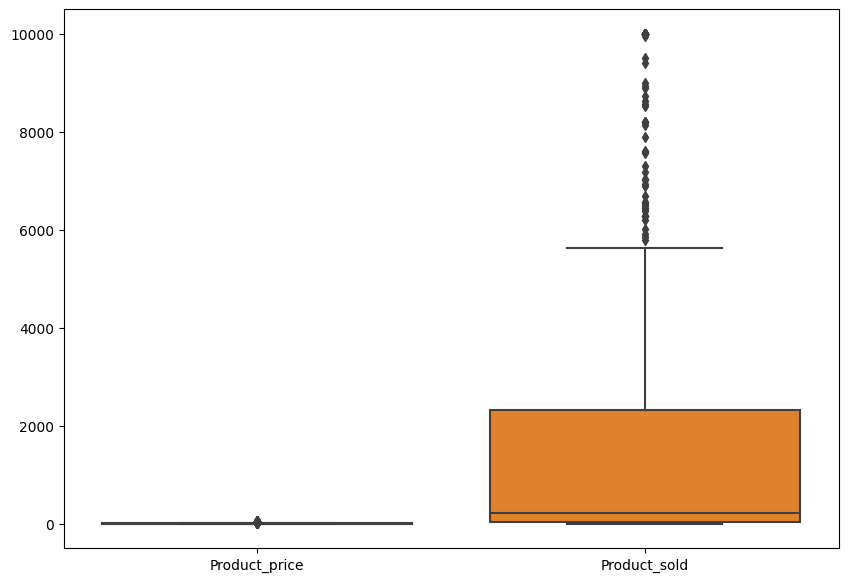

In [171]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_sg_halal[['Product_price', 'Product_sold']])
plt.show()

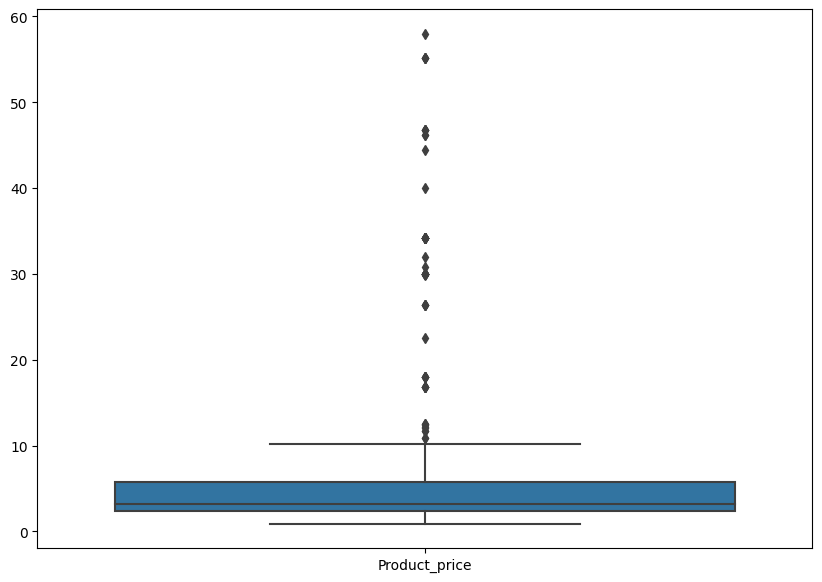

In [172]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_sg_halal[['Product_price']])
plt.show()

In [173]:
# df_sg_halal = df_sg_halal.loc[df_sg_halal['Product_price'] <= 10.0]

In [174]:
Q1 = df_sg_halal['Product_price'].quantile(0.25)
Q3 = df_sg_halal['Product_price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_sg_halal = df_sg_halal[(df_sg_halal['Product_price'] >= lower_bound) & (df_sg_halal['Product_price'] <= upper_bound)]

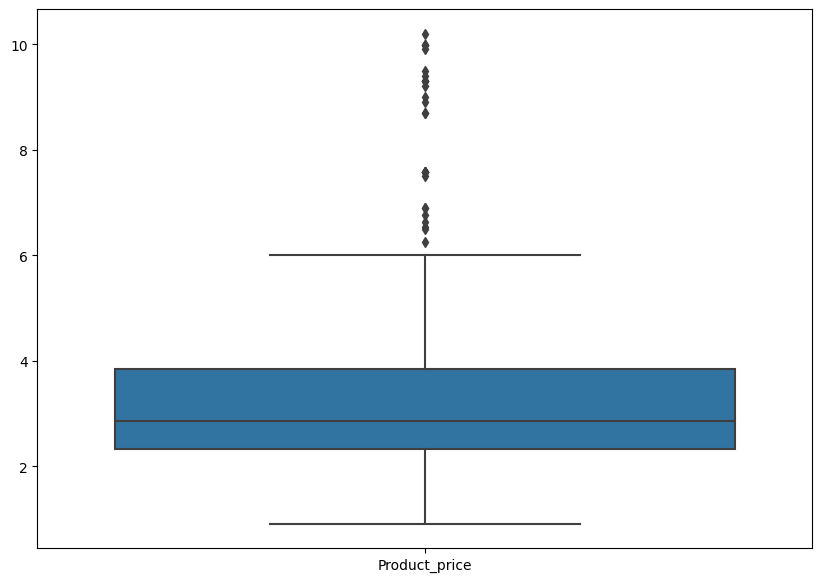

In [175]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_sg_halal[['Product_price']])
plt.show()

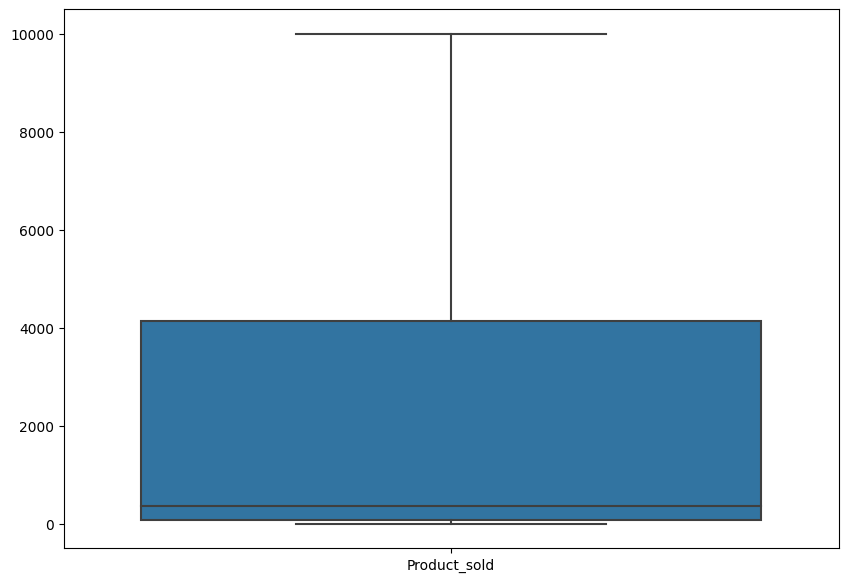

In [176]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_sg_halal[['Product_sold']])
plt.show()

In [177]:
Q1 = df_sg_halal['Product_sold'].quantile(0.25)
Q3 = df_sg_halal['Product_sold'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_sg_halal = df_sg_halal[(df_sg_halal['Product_sold'] >= lower_bound) & (df_sg_halal['Product_sold'] <= upper_bound)]

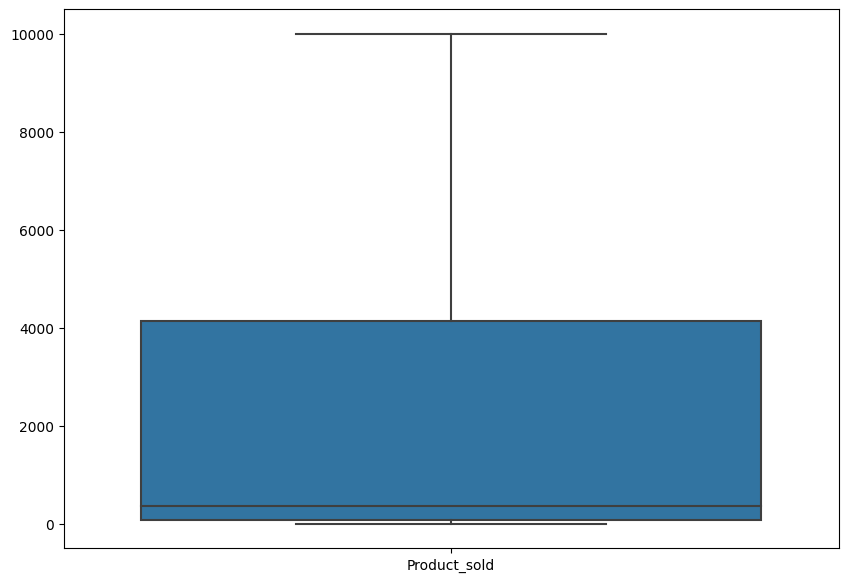

In [178]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_sg_halal[['Product_sold']])
plt.show()

In [179]:
# df_sg_halal['Product_sold'] = winsorize(df_sg_halal['Product_sold'], (0.2, 0.2))

In [180]:
# df_sg_halal = df_sg_halal.loc[df_sg_halal['Product_sold'] <= 900]

In [181]:
df_sg_halal['Product_revenue'] = df_sg_halal['Product_price'] * df_sg_halal['Product_sold']

In [182]:
df_sg_halal['Country_label'] = 'SG'

In [183]:
df_sg_halal

Product_name  Product_price  \
0                     Cowhead Cheese Sandwich Crackers           2.85   
1                          Cowhead Milk Cream Crackers           2.85   
2                    Cowhead Cappuccino Butter Cookies           2.85   
3                       Cowhead Crispy Cheese Crackers           2.85   
4                       Cowhead Crispy Butter Crackers           2.85   
..                                                 ...            ...   
567  Julies Le-mond Cheddar Cheese Cream Puff Sandwich           3.23   
568  Hock Wong Pandan Tambun Biscuit 福王斑斓淡文饼 Malays...           9.40   
569  Julies Oat 25 Biscuits With Ten Grains (Laz Ma...           3.23   
571                     Julies Veggie Crackers Biscuit           2.93   
573  Julies Le-mond Cheddar Cheese Cream Puff Sandw...           3.23   

     Product_sold Product_location Product_category  Product_revenue  \
0            9999        Singapore  Makanan/minuman         28497.15   
1            9999        Singapore  Makanan/minuman         28497.15   
2            9999        Singapore  Makanan/minuman         28497.15   
3            8135        Singapore  Makanan/minuman         23184.75   
4            6547        Singapore  Makanan/minuman         18658.95   
..            ...              ...              ...              ...   
567          7169        Singapore  Makanan/minuman         23155.87   
568            23        Singapore  Makanan/minuman           216.20   
569           142        Singapore  Makanan/minuman           458.66   
571          2416        Singapore  Makanan/minuman          7078.88   
573            13        Singapore  Makanan/minuman            41.99   

    Country_label  
0              SG  
1              SG  
2              SG  
3              SG  
4              SG  
..            ...  
567            SG  
568            SG  
569            SG  
571            SG  
573            SG  

[353 rows x 7 columns]

In [184]:
df_sg_halal.describe()

Product_price  Product_sold  Product_revenue
count         353.00        353.00           353.00
mean            3.39       2423.59          6999.82
std             1.89       3539.87         11284.62
min             0.91          1.00             5.10
25%             2.33         75.00           216.20
50%             2.85        357.00           969.28
75%             3.85       4126.00         11949.27
max            10.20       9999.00         86991.30

In [185]:
# Querry
Category_sg_halal = df_sg_halal['Product_category'].value_counts()
Location_sg_halal = df_sg_halal['Product_location'].value_counts()
Sold_sg_halal = df_sg_halal.groupby('Product_category')['Product_sold'].sum()
Location_sg_halal = Location_sg_halal.head(5)

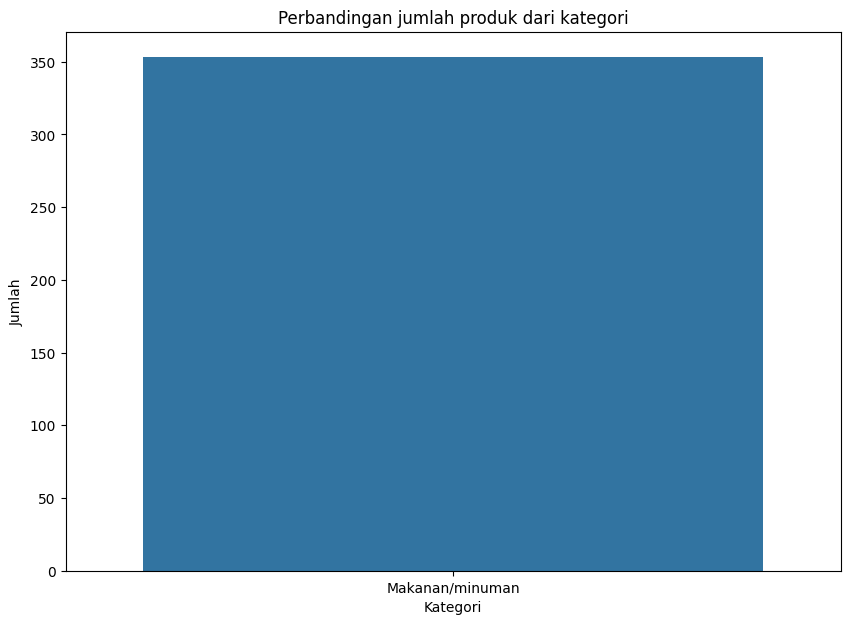

In [186]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_sg_halal.index, y= Category_sg_halal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk dari kategori')
plt.show()

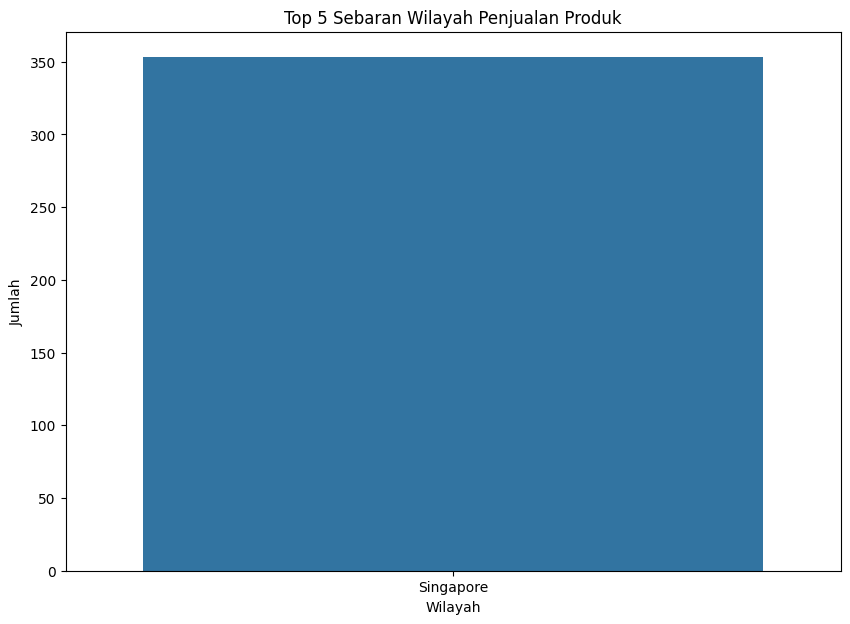

In [187]:
plt.figure(figsize=(10,7))
sns.barplot(x= Location_sg_halal.index, y= Location_sg_halal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

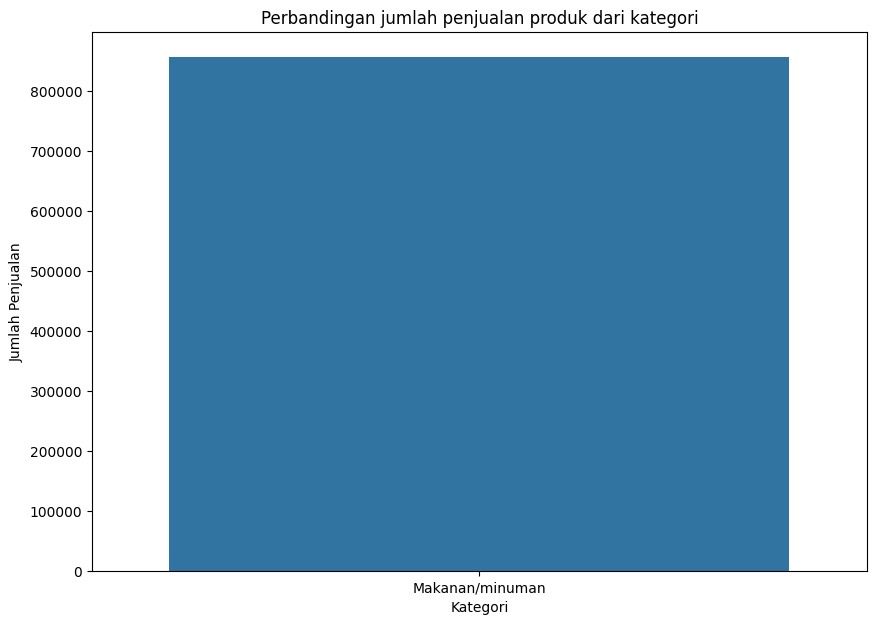

In [188]:
plt.figure(figsize=(10,7))
sns.barplot(x= Sold_sg_halal.index, y= Sold_sg_halal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Penjualan')
plt.title('Perbandingan jumlah penjualan produk dari kategori')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\1432372908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sg_halal.corr(), annot=True)


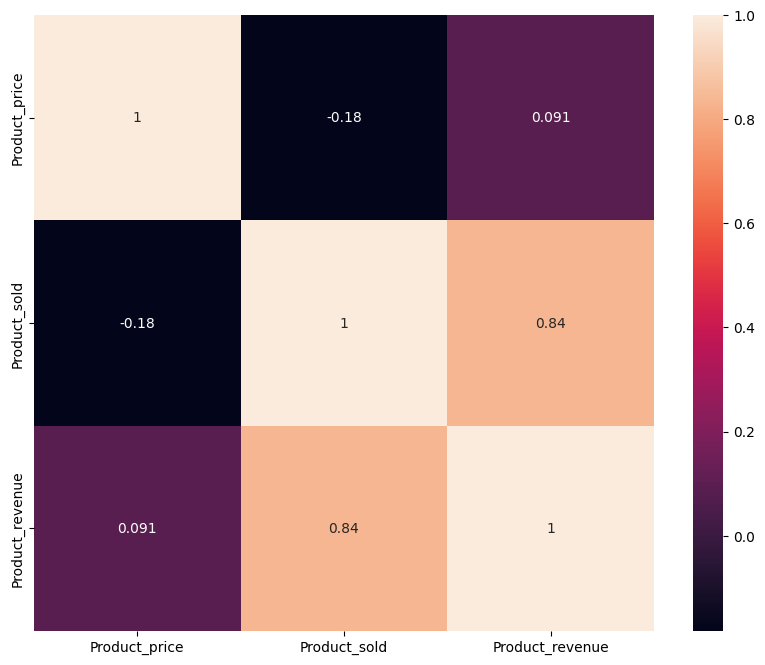

In [189]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sg_halal.corr(), annot=True)
plt.show()

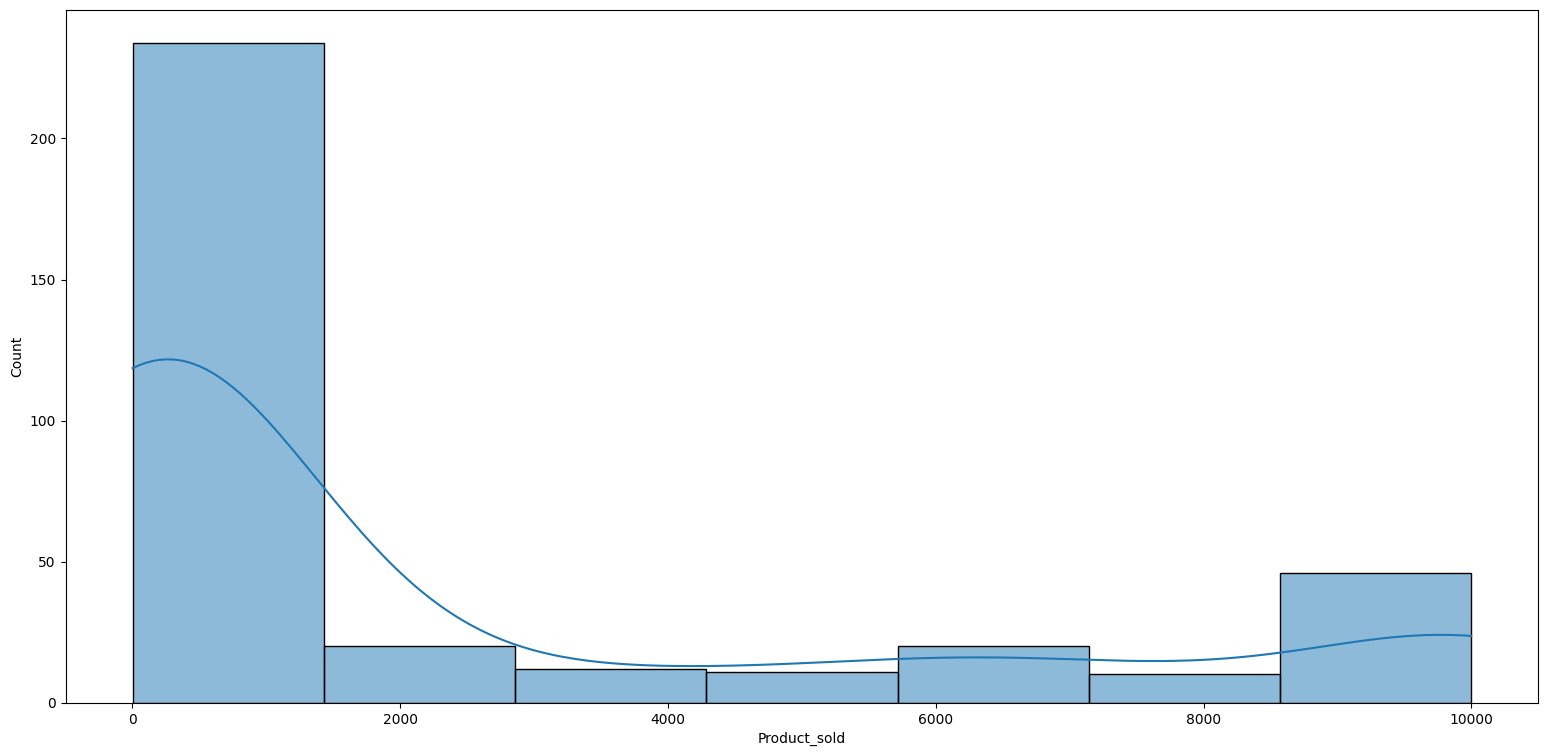

In [190]:
plt.figure(figsize=(19,9))
sns.histplot(df_sg_halal['Product_sold'], kde= True, bins=7)
plt.show()

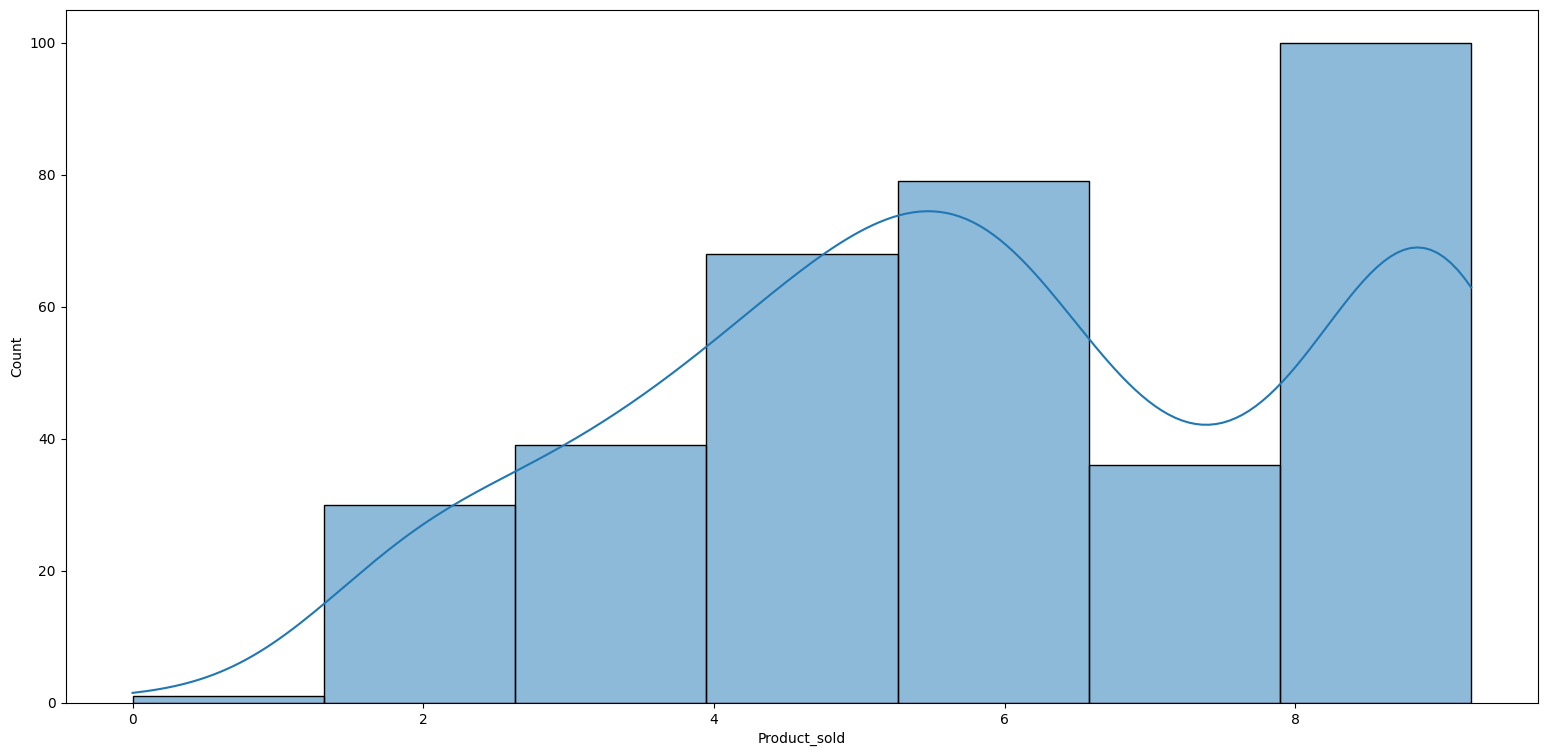

In [191]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_sg_halal['Product_sold']), kde= True, bins=7)
plt.show()

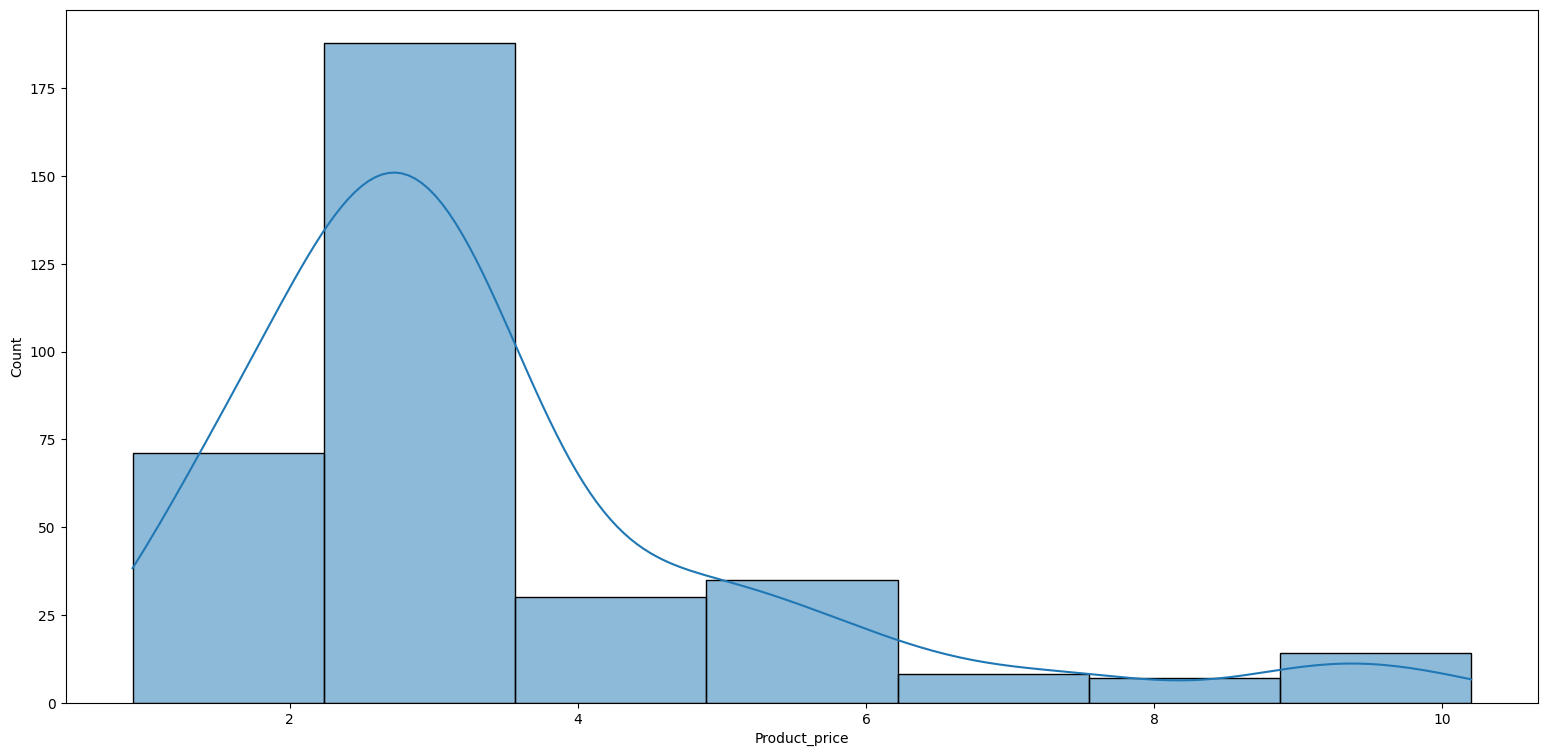

In [192]:
plt.figure(figsize=(19,9))
sns.histplot(df_sg_halal['Product_price'], kde= True, bins=7)
plt.show()

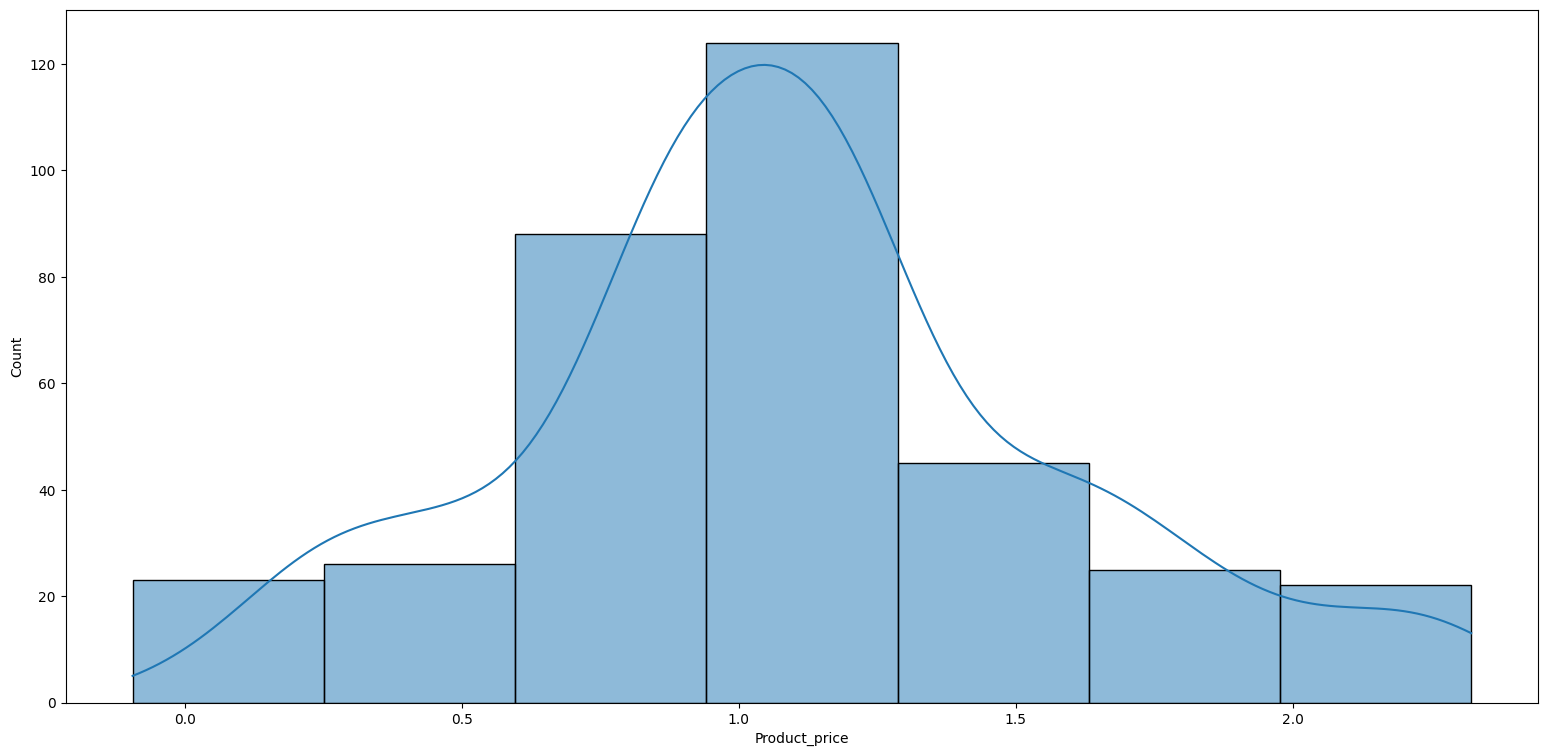

In [193]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_sg_halal['Product_price']), kde= True, bins=7)
plt.show()

#### Data Non-halal Singapore

In [194]:
df_sg_nonhalal

Product_name  Product_price  \
0                       Monster Pipeline Punch (355ML)           2.75   
1           Monster Pipeline Punch (24 X 355ML) - Case          57.60   
3    MONSTER ENERGY YELLOW RIPPER EUROPE 500ML X 24...          59.90   
4    MONSTER ENERGY ULTRA GOLD EUROPE 500ML X 24 (C...          65.90   
5                   Monster Energy - Case (24 x 355ML)          57.60   
..                                                 ...            ...   
756  KORYOMART - [Ottogi] Extry spicy Yeol ramen 오뚜...           5.60   
757  KORYOMART - [Ottogi] Jin Jjajang Ramen Cup 70g...           1.60   
759               Ottogi Real Cheese Ramen 135g x 4pkt           9.70   
760  Ottogi Japchae Korean Traditional Instant Nood...           3.50   
761  Ottogi Japchae Korean Traditional Instant Nood...          24.00   

     Product_sold Product_location Product_category  
0            2035        Singapore  Makanan/minuman  
1             293        Singapore  Makanan/minuman  
3               5        Singapore  Makanan/minuman  
4               7        Singapore  Makanan/minuman  
5             531        Singapore  Makanan/minuman  
..            ...              ...              ...  
756             9        Singapore  Makanan/minuman  
757            30        Singapore  Makanan/minuman  
759            47        Singapore  Makanan/minuman  
760            15        Singapore  Makanan/minuman  
761             8        Singapore  Makanan/minuman  

[649 rows x 5 columns]

In [195]:
df_sg_nonhalal.describe()

Product_price  Product_sold
count         649.00        649.00
mean           18.33       3117.37
std            45.81      11291.45
min             0.80          5.00
25%             3.21         35.00
50%             6.10        280.00
75%            16.50       1946.00
max           999.00     100000.00

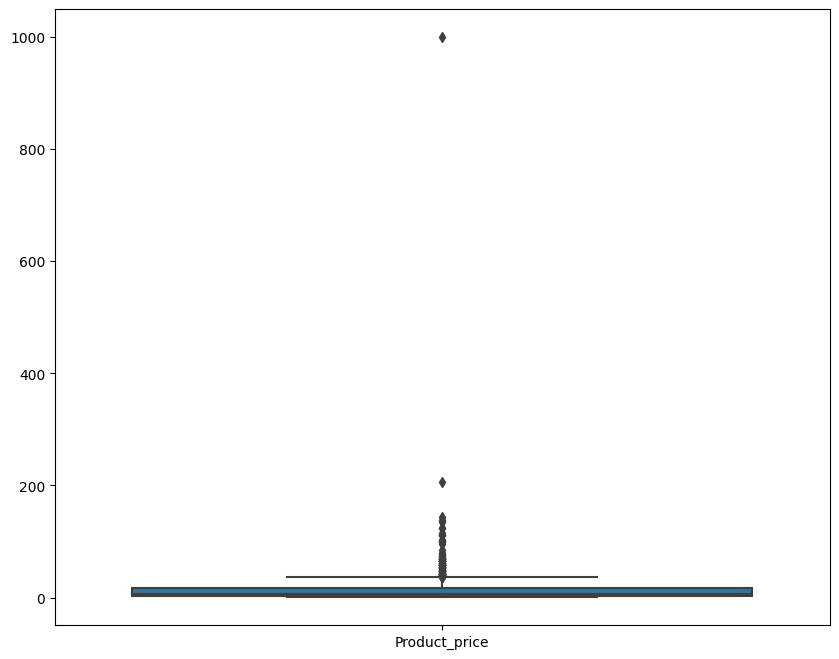

In [196]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_sg_nonhalal[['Product_price']])
plt.show()

In [197]:
for i in range(0,2):
    Q1 = df_sg_nonhalal['Product_price'].quantile(0.25)
    Q3 = df_sg_nonhalal['Product_price'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df_sg_nonhalal = df_sg_nonhalal[(df_sg_halal['Product_price'] >= lower_bound) & (df_sg_nonhalal['Product_price'] <= upper_bound)]
    i+=1

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\187450958.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sg_nonhalal = df_sg_nonhalal[(df_sg_halal['Product_price'] >= lower_bound) & (df_sg_nonhalal['Product_price'] <= upper_bound)]
C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\187450958.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sg_nonhalal = df_sg_nonhalal[(df_sg_halal['Product_price'] >= lower_bound) & (df_sg_nonhalal['Product_price'] <= upper_bound)]


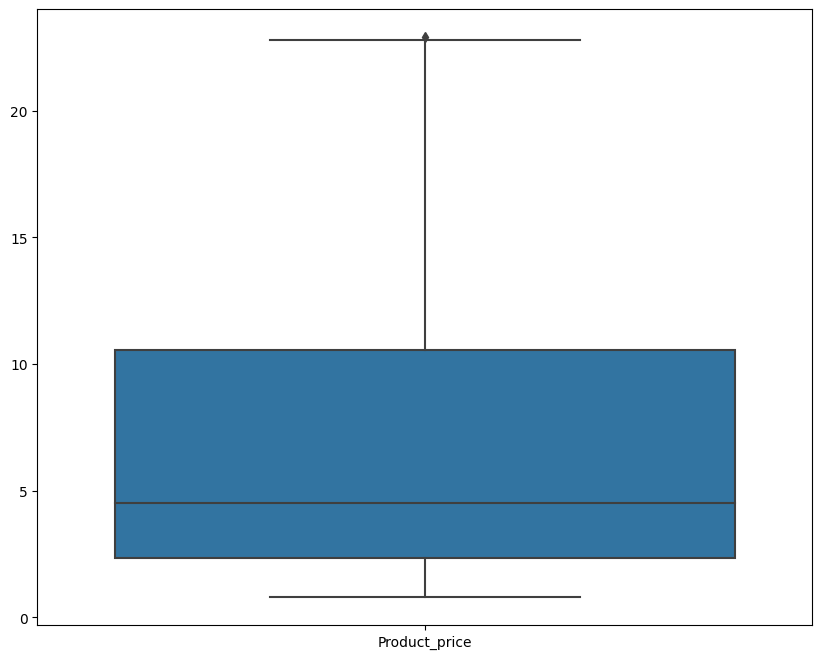

In [198]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_sg_nonhalal[['Product_price']])
plt.show()

In [199]:
# df_sg_nonhalal[df_sg_nonhalal['Product_price'] >= 25.0]

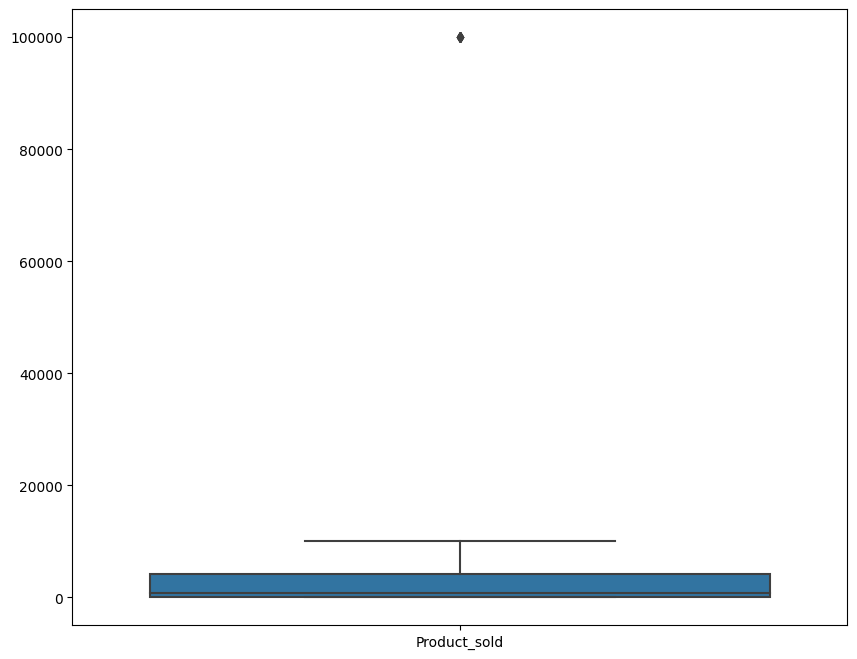

In [200]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_sg_nonhalal[['Product_sold']])
plt.show()

In [201]:
df_sg_nonhalal = df_sg_nonhalal.loc[(df_sg_nonhalal['Product_sold'] >=30.0 ) & (df_sg_nonhalal['Product_sold'] <=2000)]

In [202]:
for i in range(0,2):
    Q1 = df_sg_nonhalal['Product_sold'].quantile(0.25)
    Q3 = df_sg_nonhalal['Product_sold'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df_sg_nonhalal = df_sg_nonhalal[(df_sg_halal['Product_sold'] >= lower_bound) & (df_sg_nonhalal['Product_sold'] <= upper_bound)]
    i+=1

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3363906025.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sg_nonhalal = df_sg_nonhalal[(df_sg_halal['Product_sold'] >= lower_bound) & (df_sg_nonhalal['Product_sold'] <= upper_bound)]
C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3363906025.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sg_nonhalal = df_sg_nonhalal[(df_sg_halal['Product_sold'] >= lower_bound) & (df_sg_nonhalal['Product_sold'] <= upper_bound)]


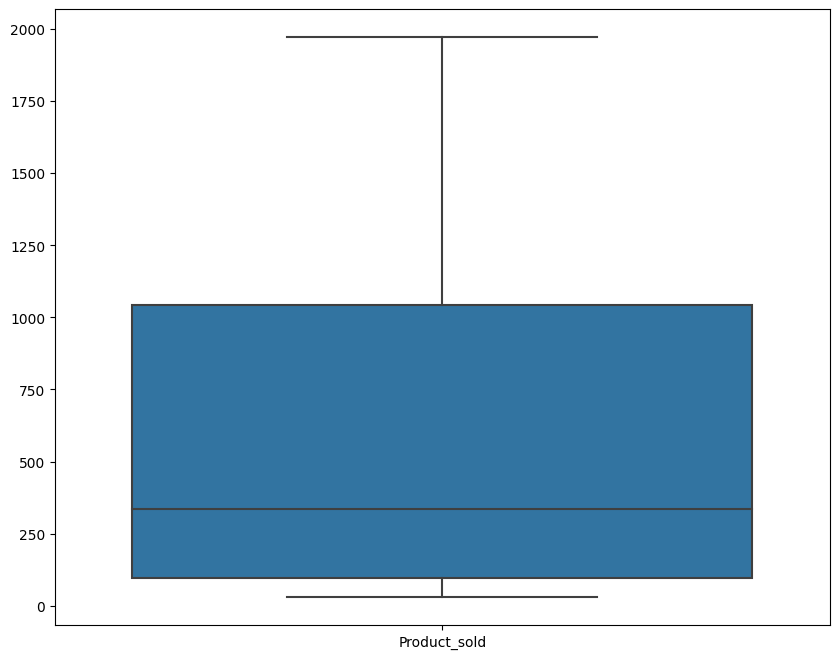

In [203]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_sg_nonhalal[['Product_sold']])
plt.show()

In [204]:
df_sg_nonhalal['Product_revenue'] = df_sg_nonhalal['Product_price'] * df_sg_nonhalal['Product_sold']

In [205]:
df_sg_nonhalal['Country_label'] = 'SG'

In [206]:
df_sg_nonhalal

Product_name  Product_price  \
9    Monster Energy Zero Ultra (355ML) (Laz Mama Shop)           2.40   
16                        Monster Energy Taster Bundle          18.00   
43   Calbee Tarako Butter Jagarico Potato Fries (La...           2.93   
46   Calbee Jagabee Butter Soy Sauce Flavour Potato...           3.84   
47   Calbee Jagabee Butter Soy Sauce Flavorful Snac...           3.65   
..                                                 ...            ...   
567              Nissin Cup Noodles Big Spicy Tonkotsu           2.00   
568     Nissin Ramen Bowl Kyushu Black (Laz Mama Shop)           2.43   
569  Nissin Donbei Toku Mori Kitsune Udon Cup Noodl...           5.15   
571  Nissin Mushroom Chicken Flavour Cup Noodles (L...           1.48   
573    Nissin Ramen Bowl Hokkaido Miso (Laz Mama Shop)           1.80   

     Product_sold Product_location Product_category  Product_revenue  \
9             438        Singapore  Makanan/minuman          1051.20   
16            125        Singapore  Makanan/minuman          2250.00   
43            223        Singapore  Makanan/minuman           653.39   
46             91        Singapore  Makanan/minuman           349.44   
47             77        Singapore  Makanan/minuman           281.05   
..            ...              ...              ...              ...   
567            63        Singapore  Makanan/minuman           126.00   
568           100        Singapore  Makanan/minuman           243.00   
569           118        Singapore  Makanan/minuman           607.70   
571           525        Singapore  Makanan/minuman           777.00   
573            71        Singapore  Makanan/minuman           127.80   

    Country_label  
9              SG  
16             SG  
43             SG  
46             SG  
47             SG  
..            ...  
567            SG  
568            SG  
569            SG  
571            SG  
573            SG  

[111 rows x 7 columns]

In [207]:
df_sg_nonhalal.describe()

Product_price  Product_sold  Product_revenue
count         111.00        111.00           111.00
mean            6.64        587.90          3261.92
std             5.46        574.27          3905.29
min             0.80         30.00            39.96
25%             2.42         95.00           470.66
50%             4.32        334.00          1254.96
75%            10.00       1042.50          5479.26
max            22.12       1971.00         17265.90

In [208]:
# Querry
Category_sg_nonhalal = df_sg_nonhalal['Product_category'].value_counts()
Location_sg_nonhalal = df_sg_nonhalal['Product_location'].value_counts()
Sold_sg_nonhalal = df_sg_nonhalal.groupby('Product_category')['Product_sold'].sum()
Location_sg_nonhalal = Location_sg_nonhalal.head(5)

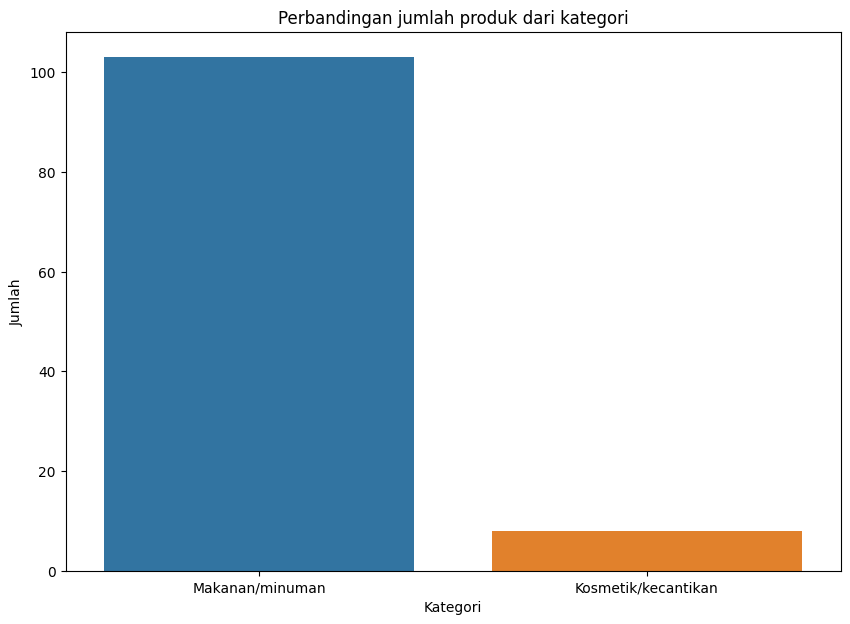

In [209]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_sg_nonhalal.index, y= Category_sg_nonhalal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk dari kategori')
plt.show()

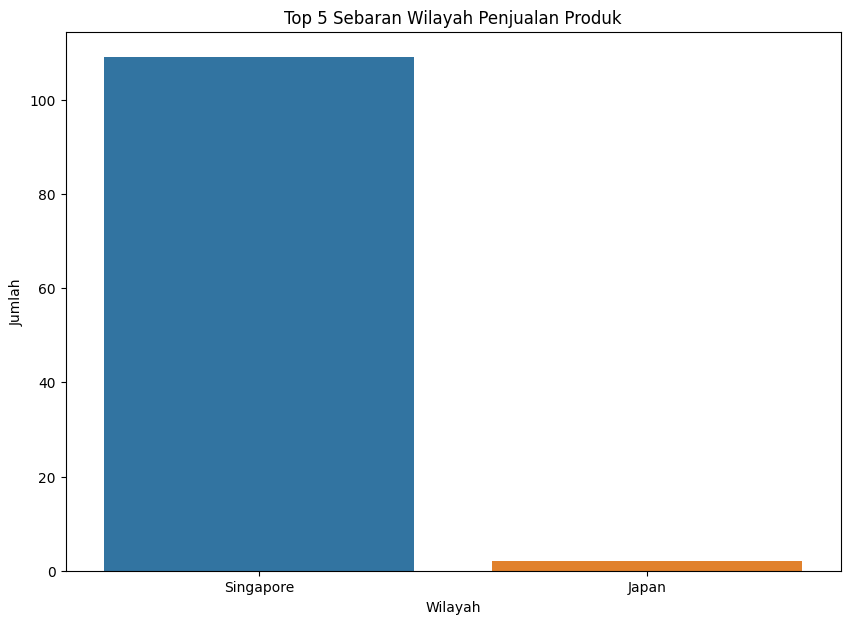

In [210]:
plt.figure(figsize=(10,7))
sns.barplot(x= Location_sg_nonhalal.index, y= Location_sg_nonhalal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

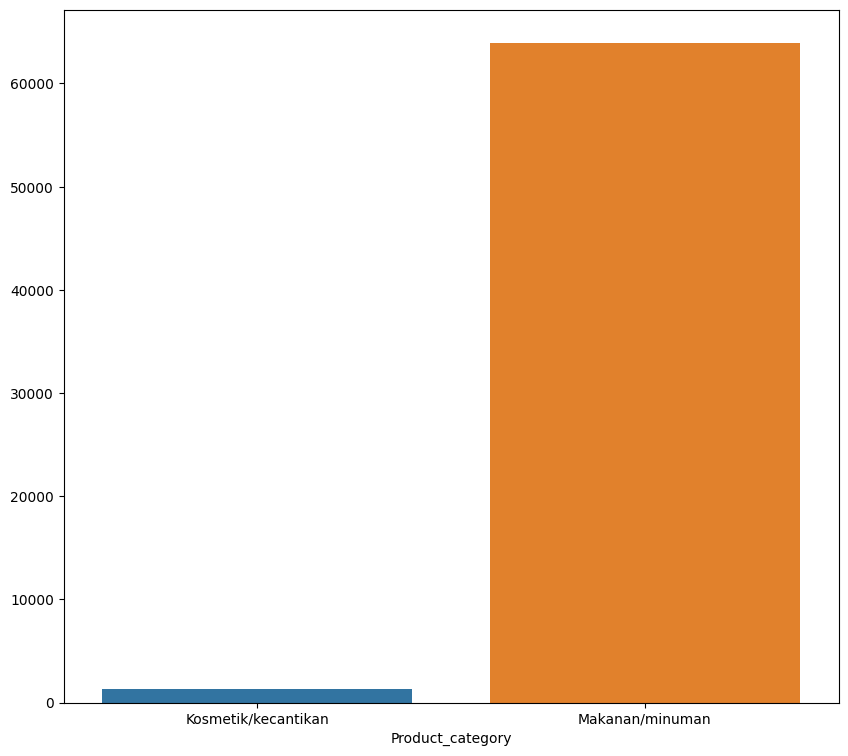

In [211]:
plt.figure(figsize=(10,9))
sns.barplot(x= Sold_sg_nonhalal.index, y= Sold_sg_nonhalal.values)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\965013945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sg_nonhalal.corr(), annot=True)


<Axes: >

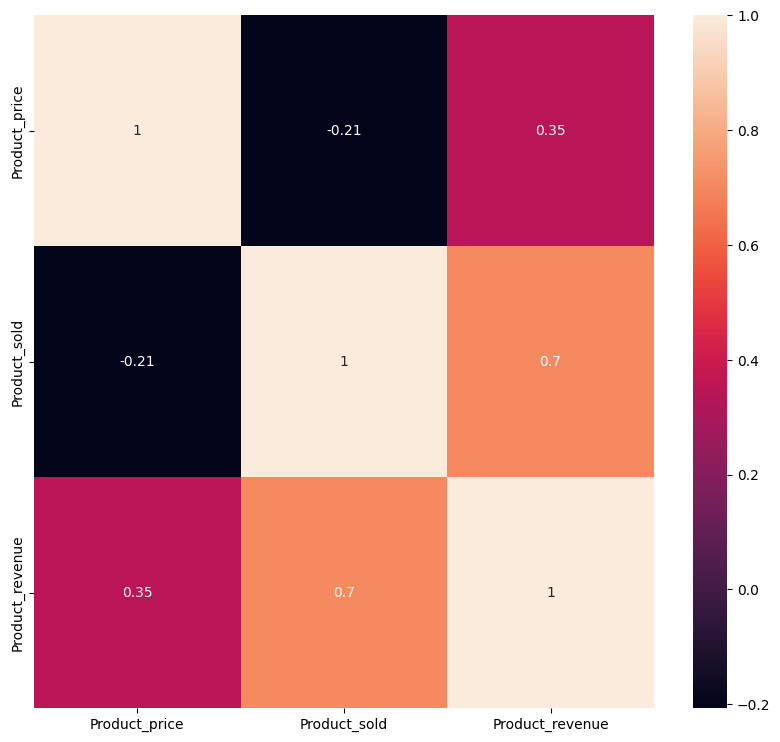

In [212]:
plt.figure(figsize=(10,9))
sns.heatmap(df_sg_nonhalal.corr(), annot=True)

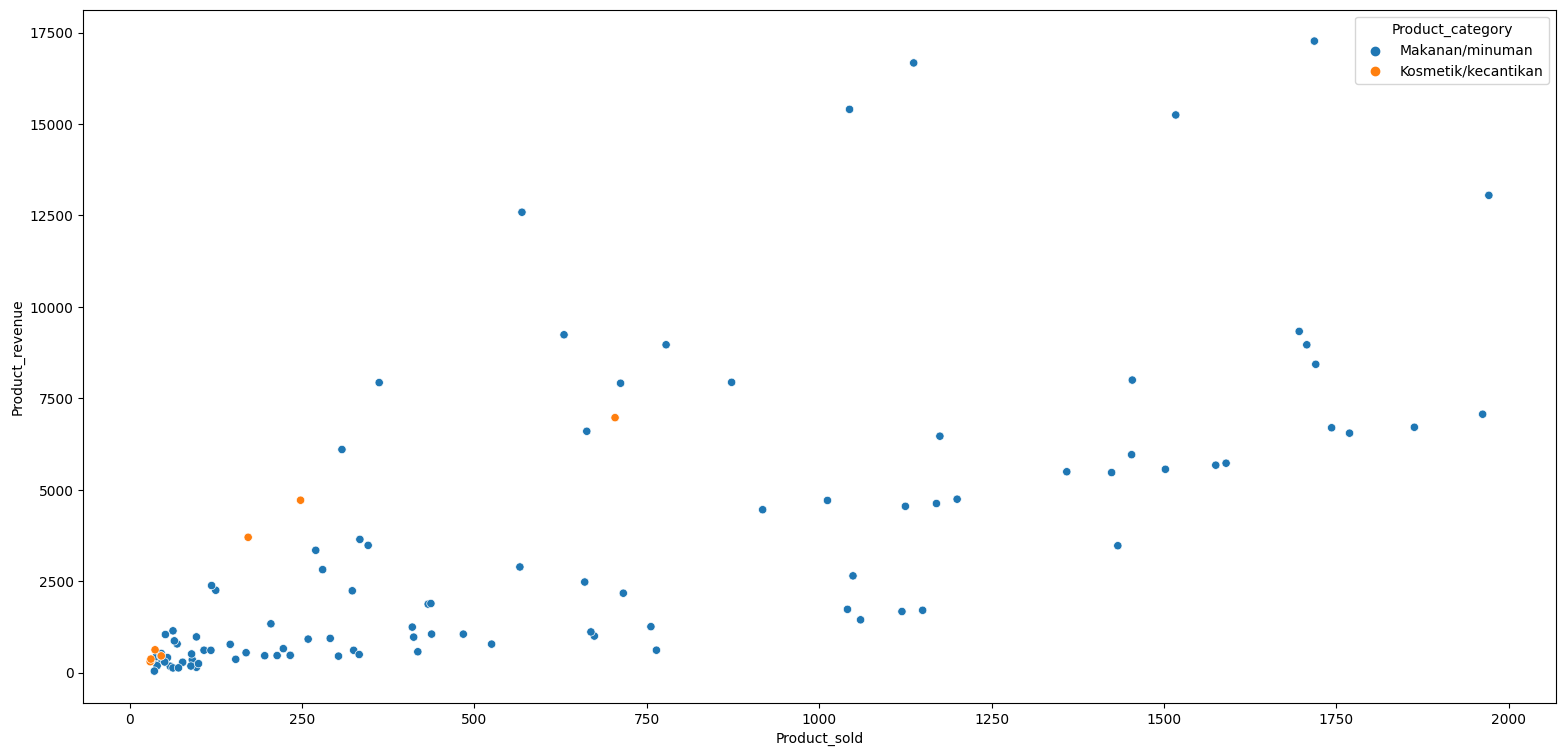

In [213]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue= 'Product_category', data=df_sg_nonhalal)
plt.show()

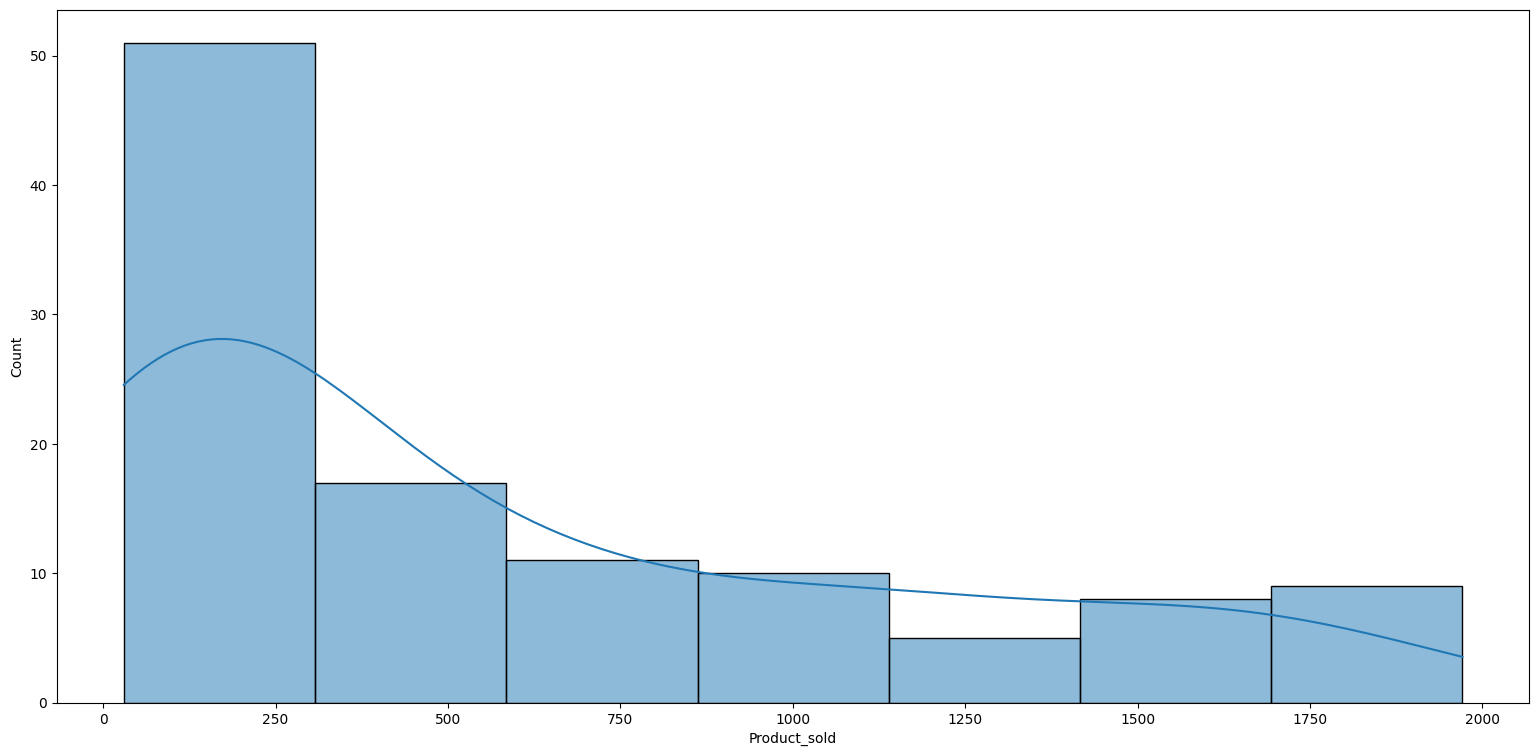

In [214]:
plt.figure(figsize=(19,9))
sns.histplot(df_sg_nonhalal['Product_sold'], kde=True, bins= 7)
plt.show()

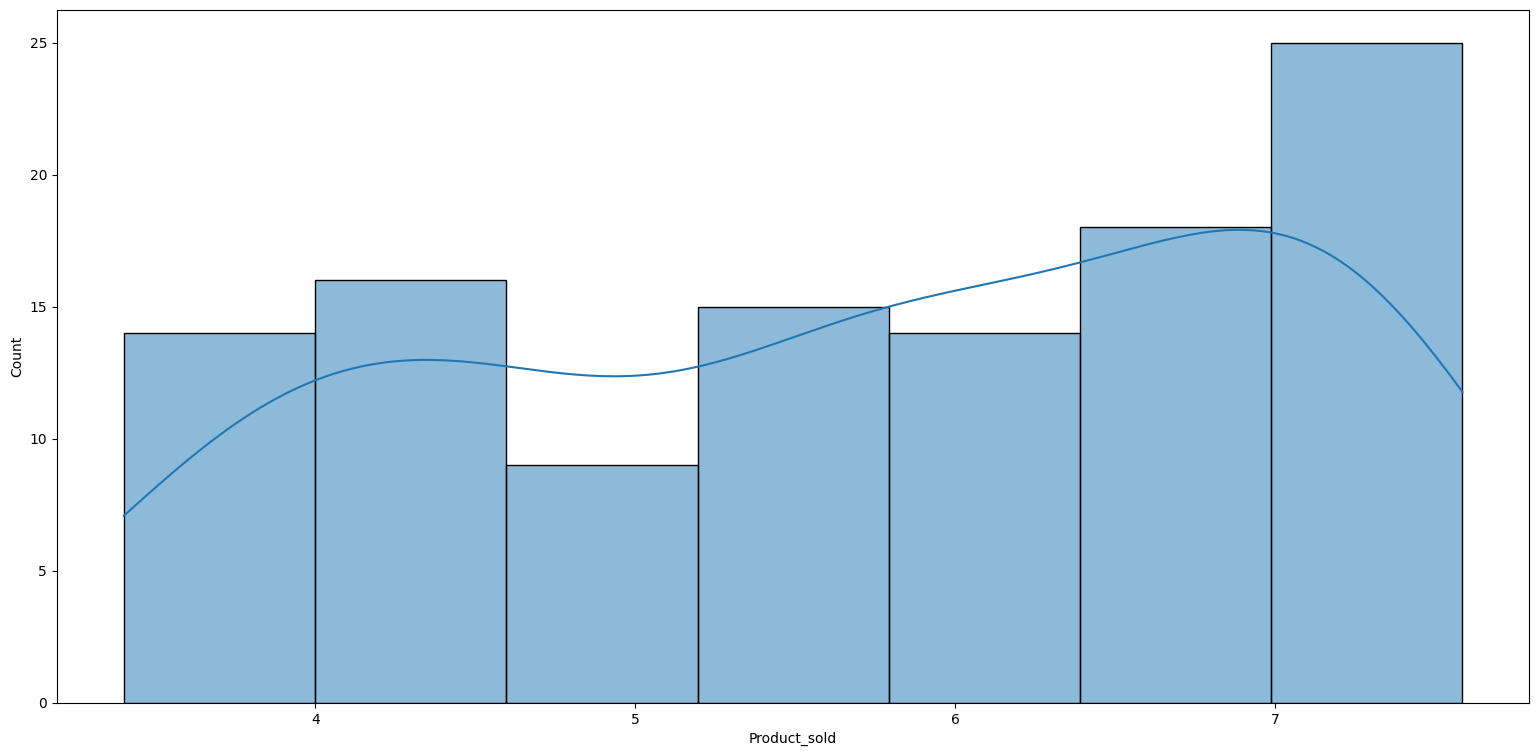

In [215]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_sg_nonhalal['Product_sold']), kde=True, bins= 7)
plt.show()

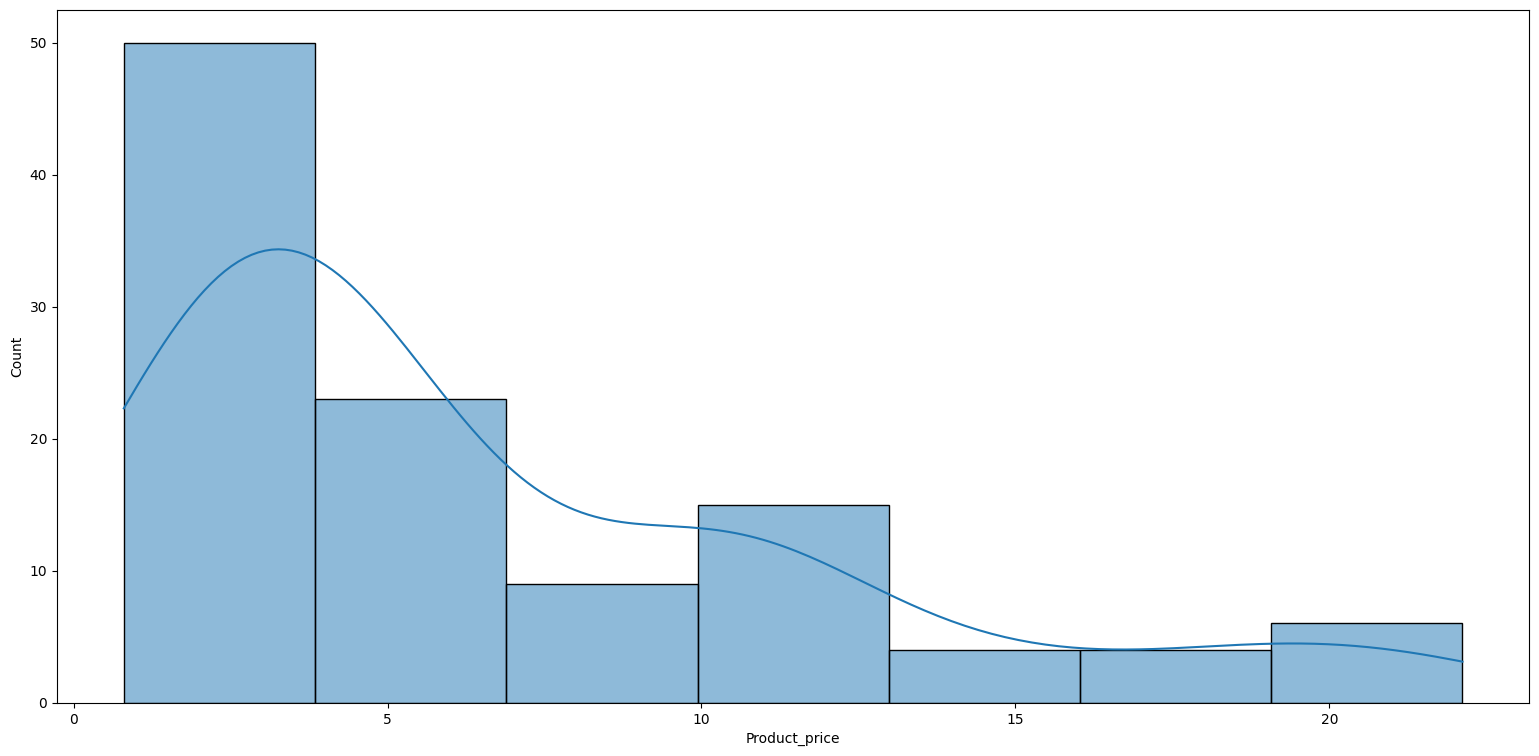

In [216]:
plt.figure(figsize=(19,9))
sns.histplot(df_sg_nonhalal['Product_price'], kde=True, bins= 7)
plt.show()

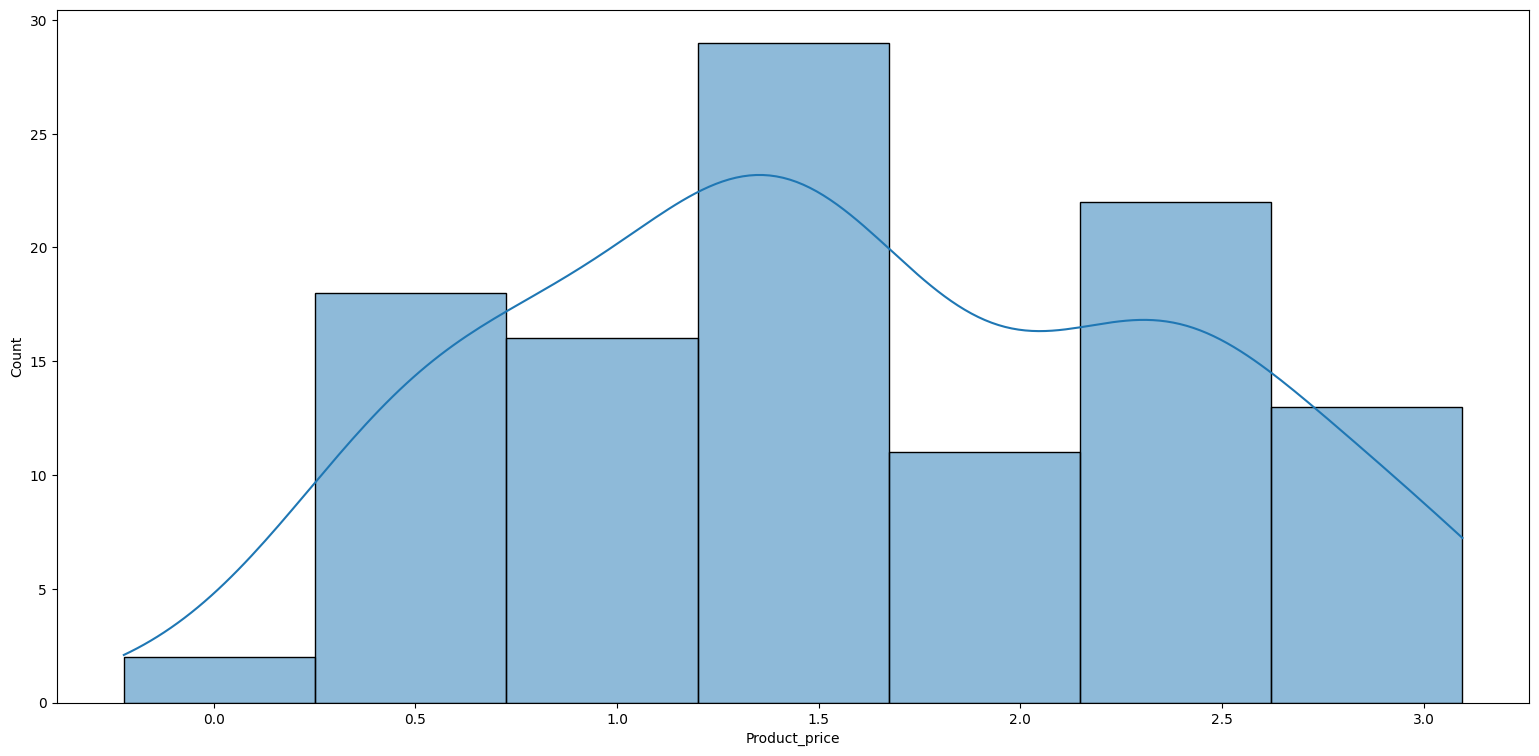

In [217]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_sg_nonhalal['Product_price']), kde=True, bins= 7)
plt.show()

### (TH) Data Halal dan Non-Halal Thailand

#### Data Halal Thai

In [218]:
df_th_halal

Product_name  Product_price  \
0                           Lucky Me Pancit Canton 80g          27.00   
1                        lucky Me Beef (Sept.10, 2023)          20.00   
2                Pancit Canton Kalamansi New Packaging          25.00   
3             Pancit Canton Chilimansi (New packaging)          25.00   
4     lucky me pancit canton original 80g(oct 17 2022)          25.00   
..                                                 ...            ...   
623  HOTTA ฮอทต้า เครื่องดื่มขิงผงสำเร็จรูป ผสมน้ำผ...         120.00   
624  Hotta Plus Ginger with mushroom extract Instan...         199.00   
625  HOTTA ฮอทต้า ขิงผงสูตรเข้มข้น ผสมหญ้าหวานสกัด ...         399.00   
626  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรต้นตำรับ ผสมหญ...         279.00   
627  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...         359.00   

     Product_sold Product_location Product_category  
0            1193          Bangkok  Makanan/minuman  
1             139         Chonburi  Makanan/minuman  
2             404          Bangkok  Makanan/minuman  
3             504          Bangkok  Makanan/minuman  
4               7         Chonburi  Makanan/minuman  
..            ...              ...              ...  
623            90          Bangkok  Makanan/minuman  
624            10          Bangkok  Makanan/minuman  
625            14          Bangkok  Makanan/minuman  
626            11          Bangkok  Makanan/minuman  
627            55     Kanchanaburi  Makanan/minuman  

[464 rows x 5 columns]

In [219]:
df_th_halal.describe()

Product_price  Product_sold
count         464.00        464.00
mean          222.40        611.72
std           172.12       1193.18
min            11.00          5.00
25%            99.00         30.75
50%           172.00        138.00
75%           297.00        626.75
max           999.00       8838.00

In [220]:
df_th_halal['Product_category'].value_counts()

Makanan/minuman        275
Kosmetik/kecantikan    189
Name: Product_category, dtype: int64

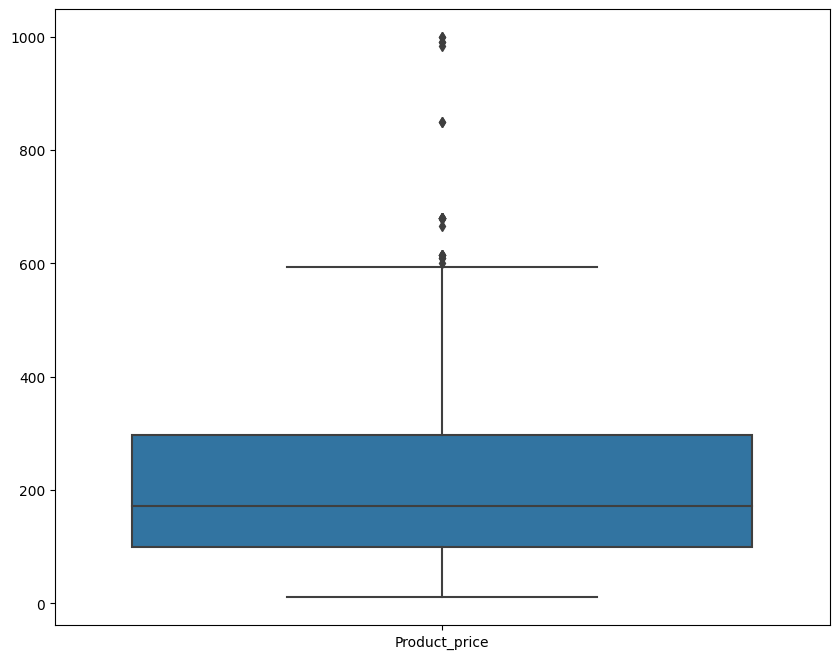

In [221]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_th_halal[['Product_price']])
plt.show()

In [222]:
df_th_halal = df_th_halal.loc[(df_th_halal['Product_price'] >= 30.0) & (df_th_halal['Product_price'] <=700)]

In [223]:
# Q1_1 = df_th_halal['Product_price'].quantile(0.25)
# Q3_1 = df_th_halal['Product_price'].quantile(0.75)
# IQR_1 = Q3_1-Q1_1
# lower_1 = Q1_1 - 1.5*IQR_1
# upper_1 = Q1_1 + 1.5*IQR_1
# # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] < lower_1, lower_1, df_ina_halal['Product_price'])
# # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] > upper_1, upper_1, df_ina_halal['Product_price'])
# df_th_halal = df_th_halal[(df_th_halal['Product_price'] >= lower_1) & (df_th_halal['Product_price'] <= upper_1)]

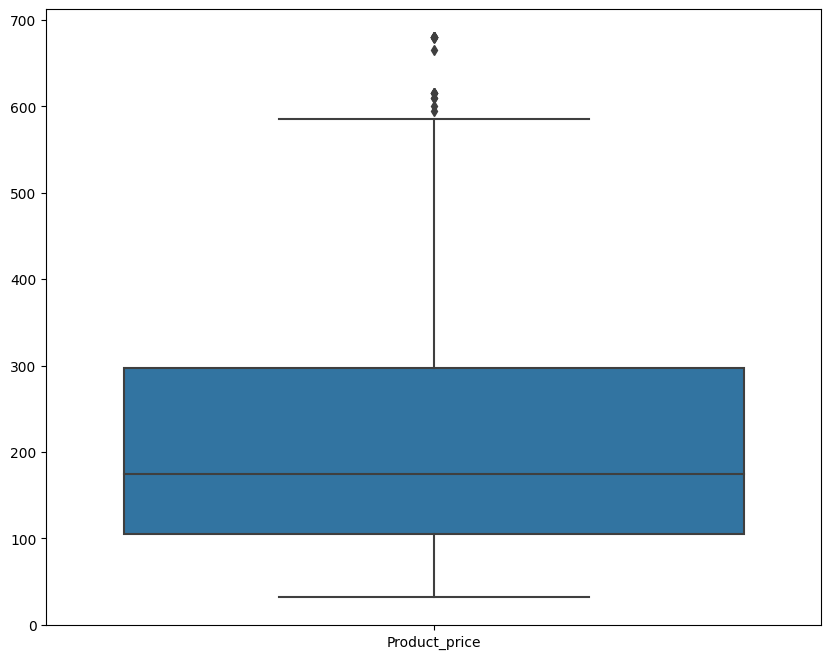

In [224]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_th_halal[['Product_price']])
plt.show()

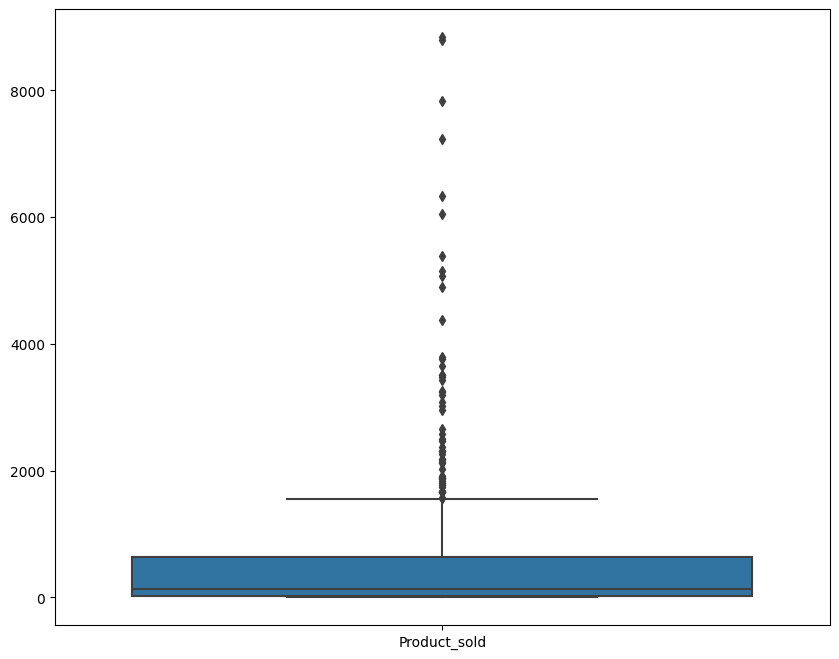

In [225]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_th_halal[['Product_sold']])
plt.show()

In [226]:
df_th_halal = df_th_halal.loc[(df_th_halal['Product_sold'] >= 50.0) & (df_th_halal['Product_sold'] <= 900)]

In [227]:
df_th_halal['Country_label'] = 'THA'

In [228]:
df_th_halal

Product_name  Product_price  \
13   ซือดะ บะหมี่กึ่งสำเร็จรูปรสต้มยำกุ้ง ชนิดถ้วย ...          68.00   
15   ซือดะ บะหมี่กึ่งสำเร็จรูปรสต้มยำกุ้ง แบบซอง 1ก...         175.00   
16   ซือดะ บะหมี่กึ่งสำเร็จรูปรสต้มยำกุ้งน้ำข้น ชนิ...          68.00   
21   ซือดะ บะหมี่กึ่งสำเร็จรูปรสต้มโคล้ง ชนิดถ้วย 1...          68.00   
24   [3 แพ็ค] Voiz Cracker Creamy Butter Family Pac...         114.00   
..                                                 ...            ...   
613  HOTTA Original Ginger with Honey Instant Ginge...         180.00   
614  HOTTA Plus Ginger With Ginseng Extract Instant...         230.00   
615  HOTTA 100% Ginger Instant Ginger 7g.x10 Sachet...         164.00   
623  HOTTA ฮอทต้า เครื่องดื่มขิงผงสำเร็จรูป ผสมน้ำผ...         120.00   
627  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...         359.00   

     Product_sold Product_location Product_category Country_label  
13             95    Nakhon Pathom  Makanan/minuman           THA  
15             65    Nakhon Pathom  Makanan/minuman           THA  
16             75    Nakhon Pathom  Makanan/minuman           THA  
21             93    Nakhon Pathom  Makanan/minuman           THA  
24            102     Samut Prakan  Makanan/minuman           THA  
..            ...              ...              ...           ...  
613            60          Bangkok  Makanan/minuman           THA  
614           121          Bangkok  Makanan/minuman           THA  
615           113          Bangkok  Makanan/minuman           THA  
623            90          Bangkok  Makanan/minuman           THA  
627            55     Kanchanaburi  Makanan/minuman           THA  

[220 rows x 6 columns]

In [229]:
# df_th_halal['Product_sold'] = winsorize(df_th_halal['Product_sold'], (0.2,0.2))

In [230]:
# for i in range(0,3):
#     Q1_1 = df_th_halal['Product_sold'].quantile(0.25)
#     Q3_1 = df_th_halal['Product_sold'].quantile(0.75)
#     IQR_1 = Q3_1-Q1_1
#     lower_1 = Q1_1 - 1.5*IQR_1
#     upper_1 = Q1_1 + 1.5*IQR_1
#     # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] < lower_1, lower_1, df_ina_halal['Product_price'])
#     # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] > upper_1, upper_1, df_ina_halal['Product_price'])
#     df_th_halal = df_th_halal[(df_th_halal['Product_sold'] >= lower_1) & (df_th_halal['Product_sold'] <= upper_1)]
#     i+=1

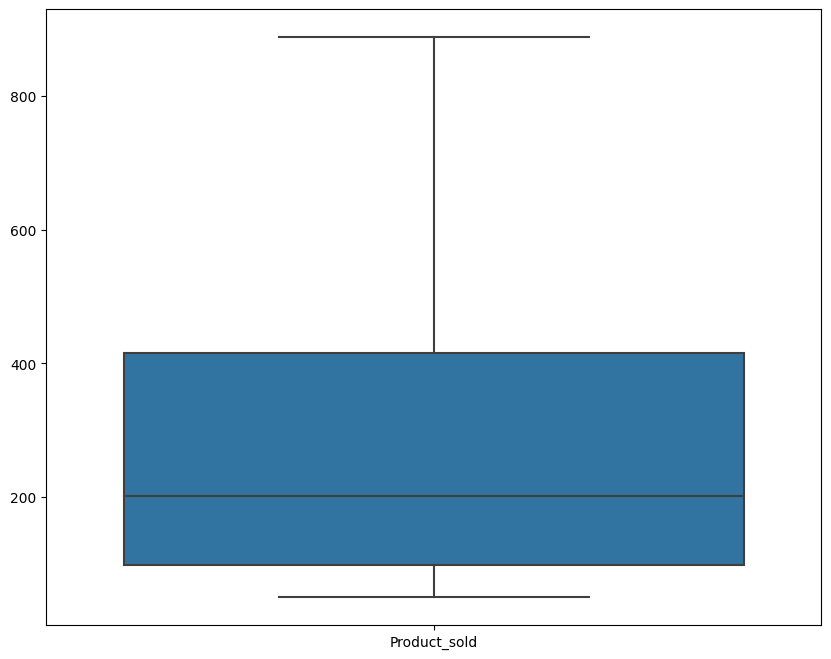

In [231]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_th_halal[['Product_sold']])
plt.show()

In [232]:
# df_th_halal = df_th_halal[df_th_halal['Product_sold'] <= 80]

In [233]:
df_th_halal['Product_category'].value_counts()

Makanan/minuman        119
Kosmetik/kecantikan    101
Name: Product_category, dtype: int64

In [234]:
df_th_halal.describe()

Product_price  Product_sold
count         220.00        220.00
mean          205.79        287.13
std           143.03        231.36
min            35.50         50.00
25%            99.00         98.00
50%           169.00        201.50
75%           275.00        415.50
max           680.00        888.00

In [235]:
df_th_halal['Product_revenue'] = df_th_halal['Product_price'] * df_th_halal['Product_sold']

In [236]:
# Querry
Category_th_halal = df_th_halal['Product_category'].value_counts()
Location_th_halal = df_th_halal['Product_location'].value_counts()
Sold_th_halal = df_th_halal.groupby('Product_category')['Product_sold'].sum()
Location_th_halal = Location_th_halal.head(5)

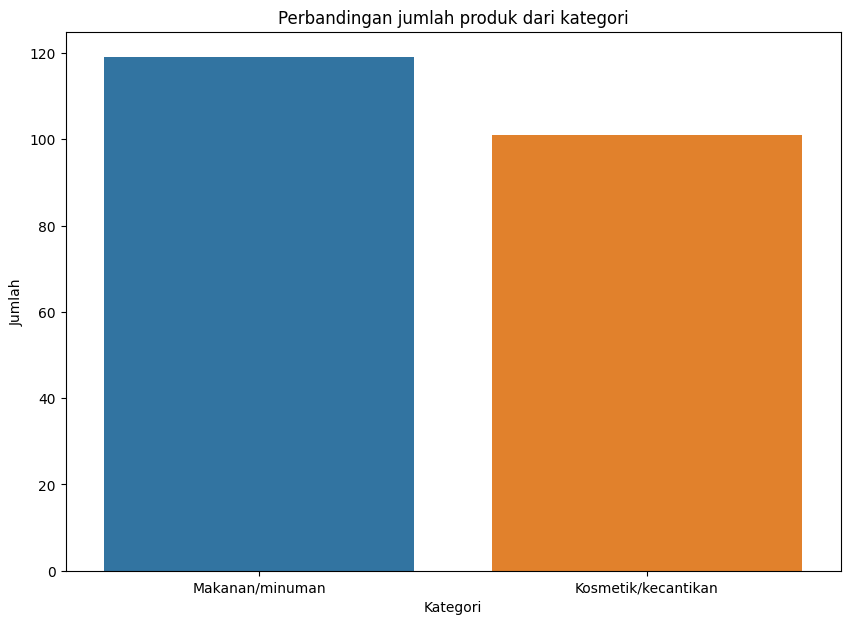

In [237]:
plt.figure(figsize=(10,7))
sns.barplot(x= Category_th_halal.index, y= Category_th_halal.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan jumlah produk dari kategori')
plt.show()

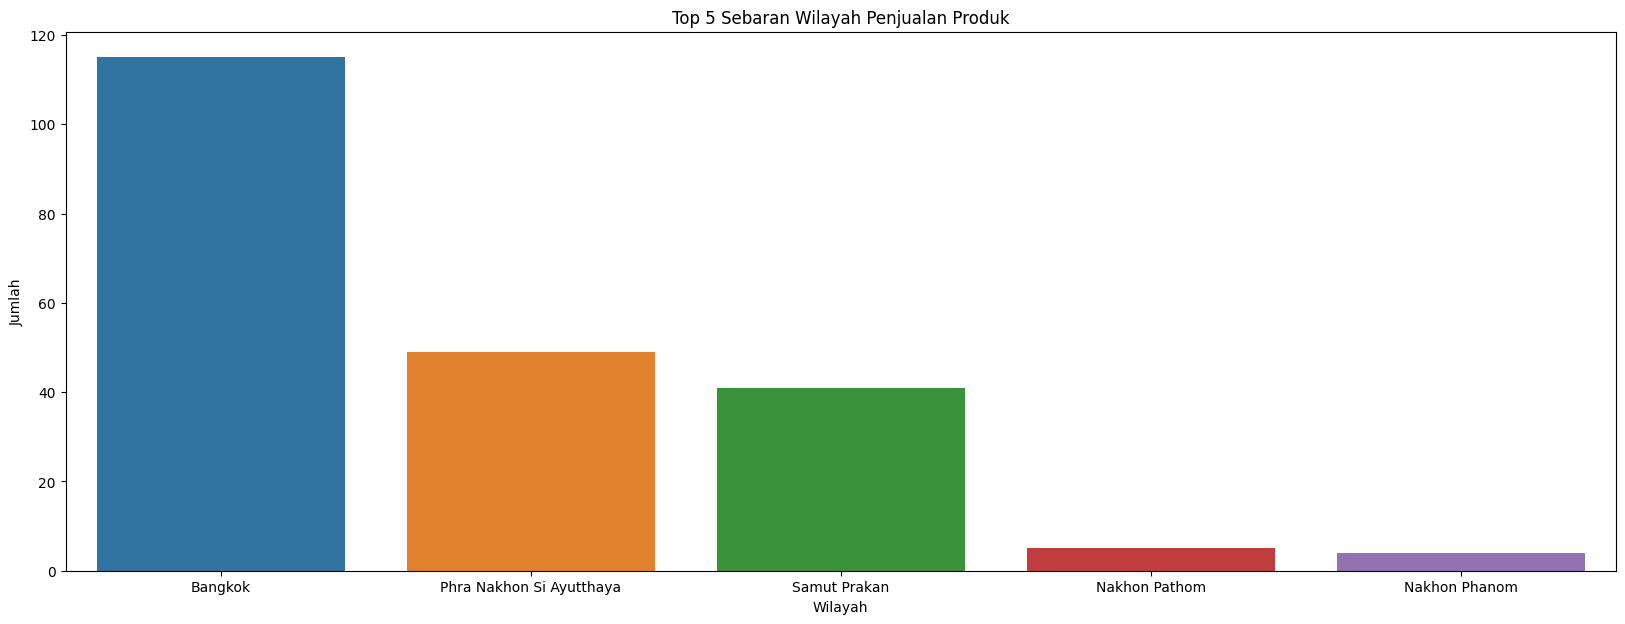

In [238]:
plt.figure(figsize=(20,7))
sns.barplot(x= Location_th_halal.index, y= Location_th_halal.values)
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.title('Top 5 Sebaran Wilayah Penjualan Produk')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\579750621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_th_halal.corr(), annot=True)


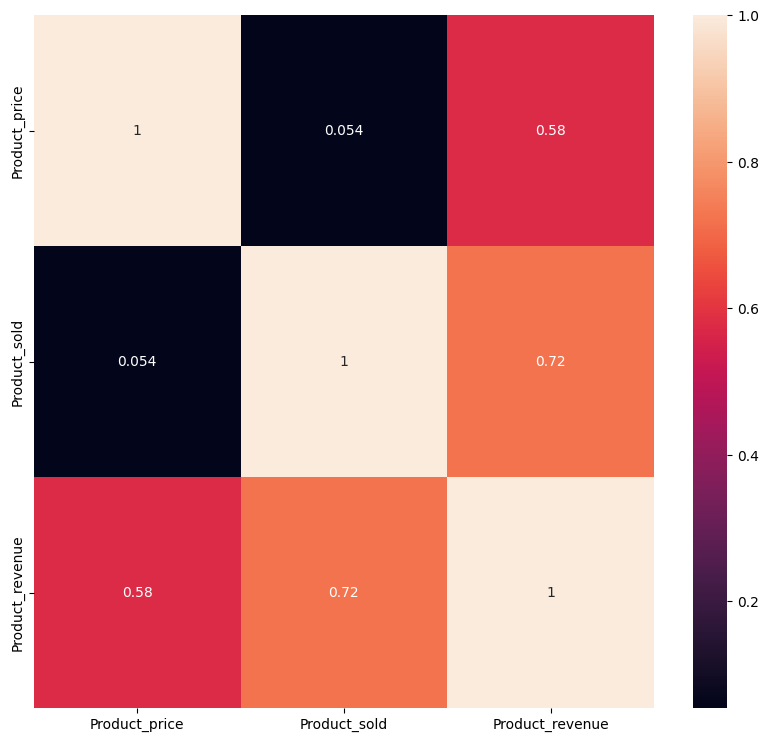

In [239]:
plt.figure(figsize=(10,9))
sns.heatmap(df_th_halal.corr(), annot=True)
plt.show()

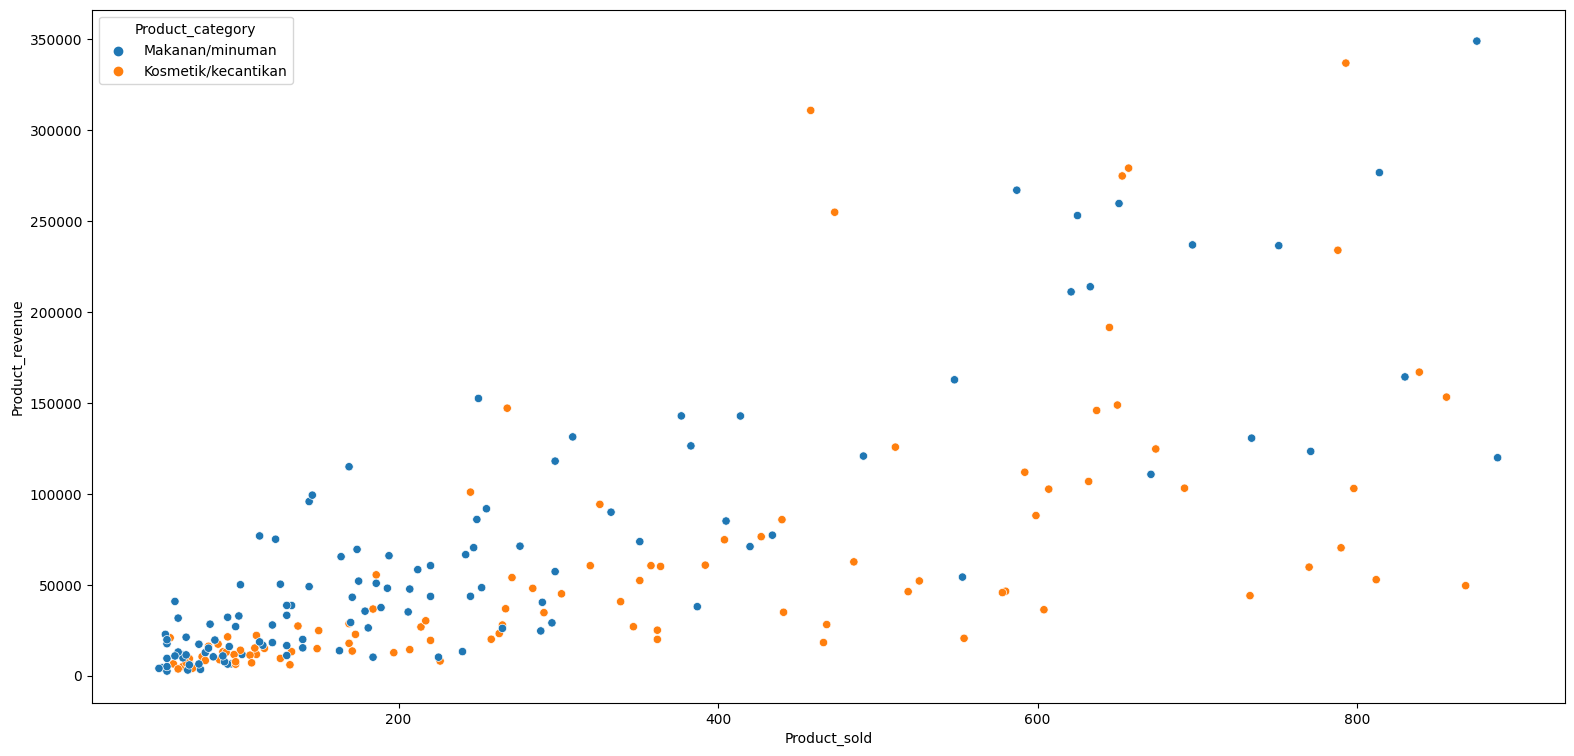

In [240]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue= 'Product_category', data=df_th_halal)
plt.show()

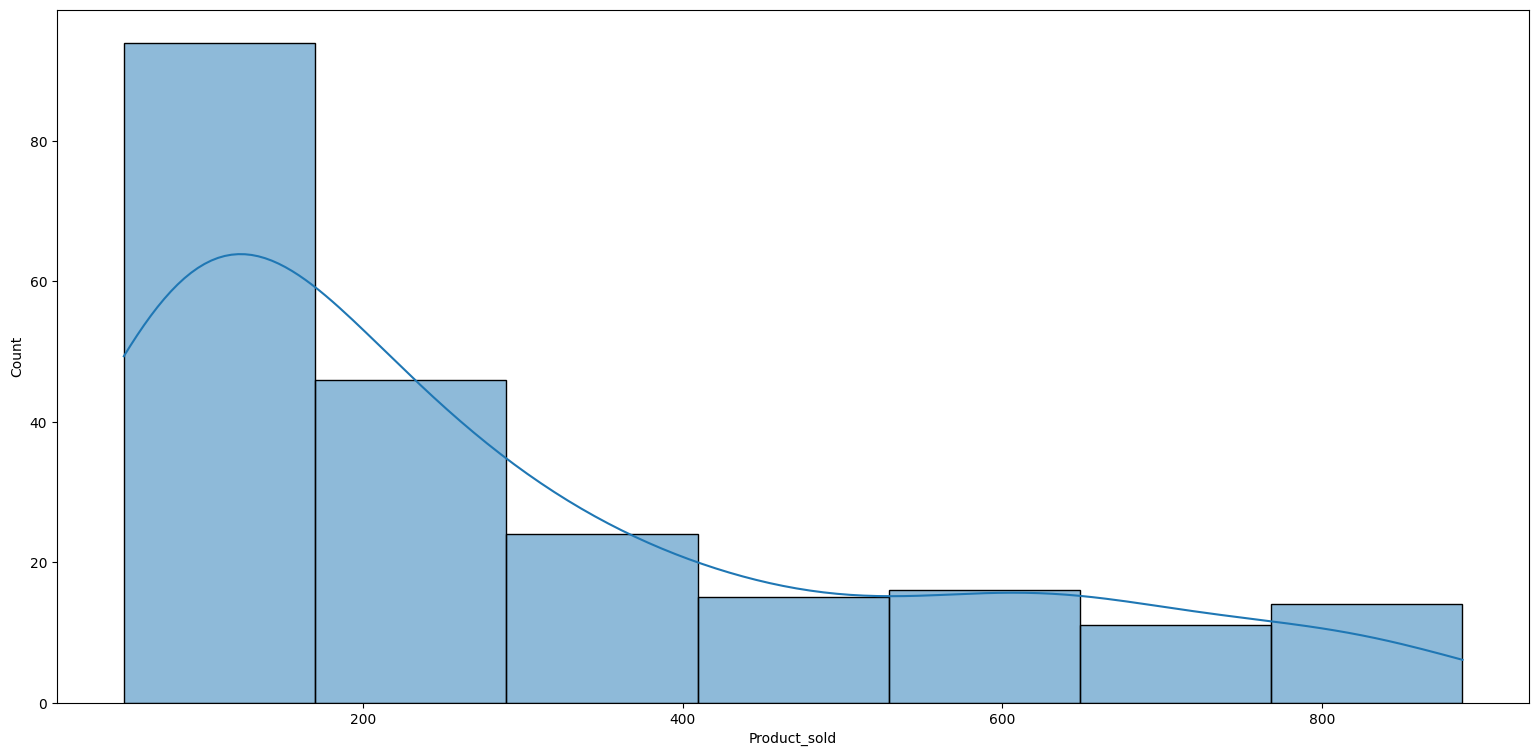

In [241]:
plt.figure(figsize=(19,9))
sns.histplot(df_th_halal['Product_sold'], kde=True, bins= 7)
plt.show()

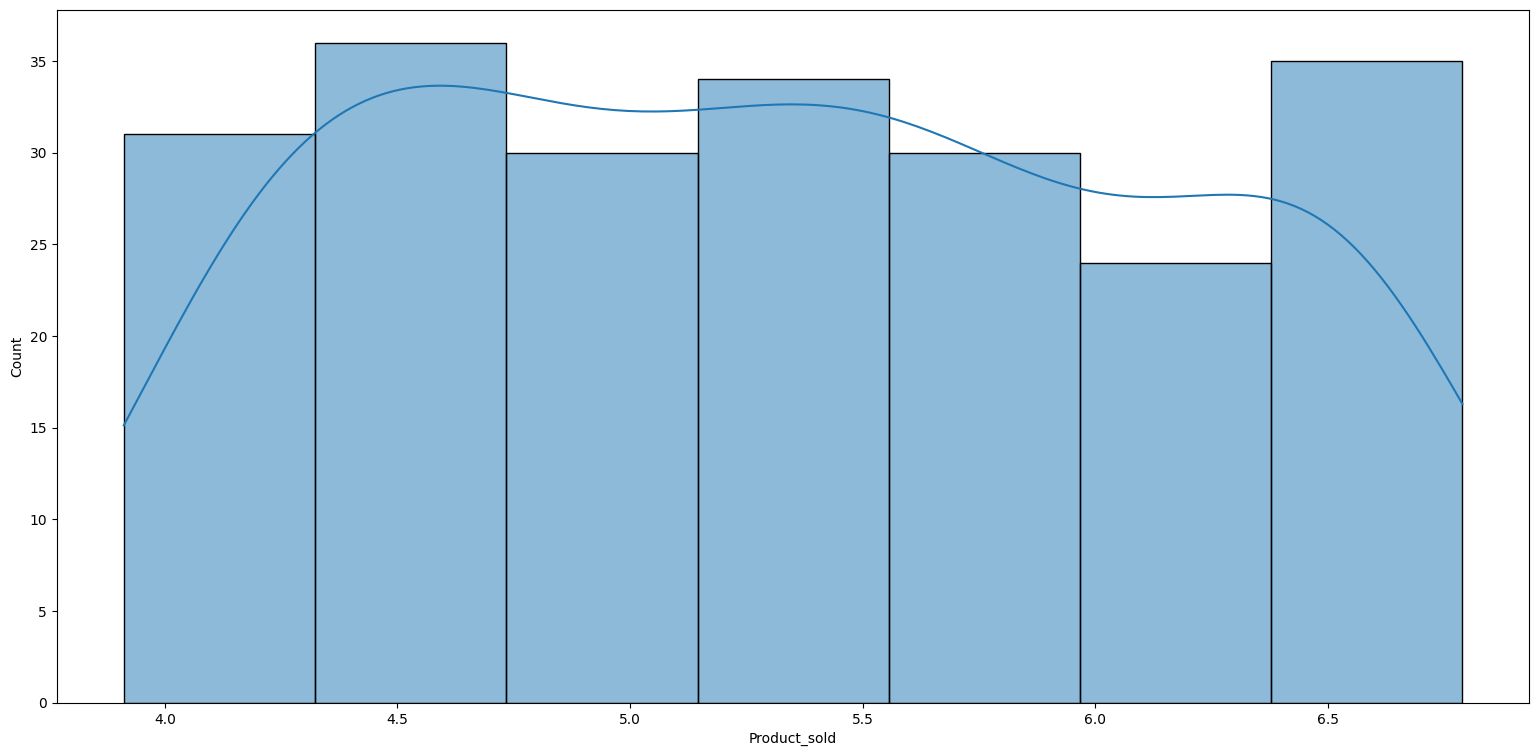

In [242]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_th_halal['Product_sold']), kde=True, bins= 7)
plt.show()

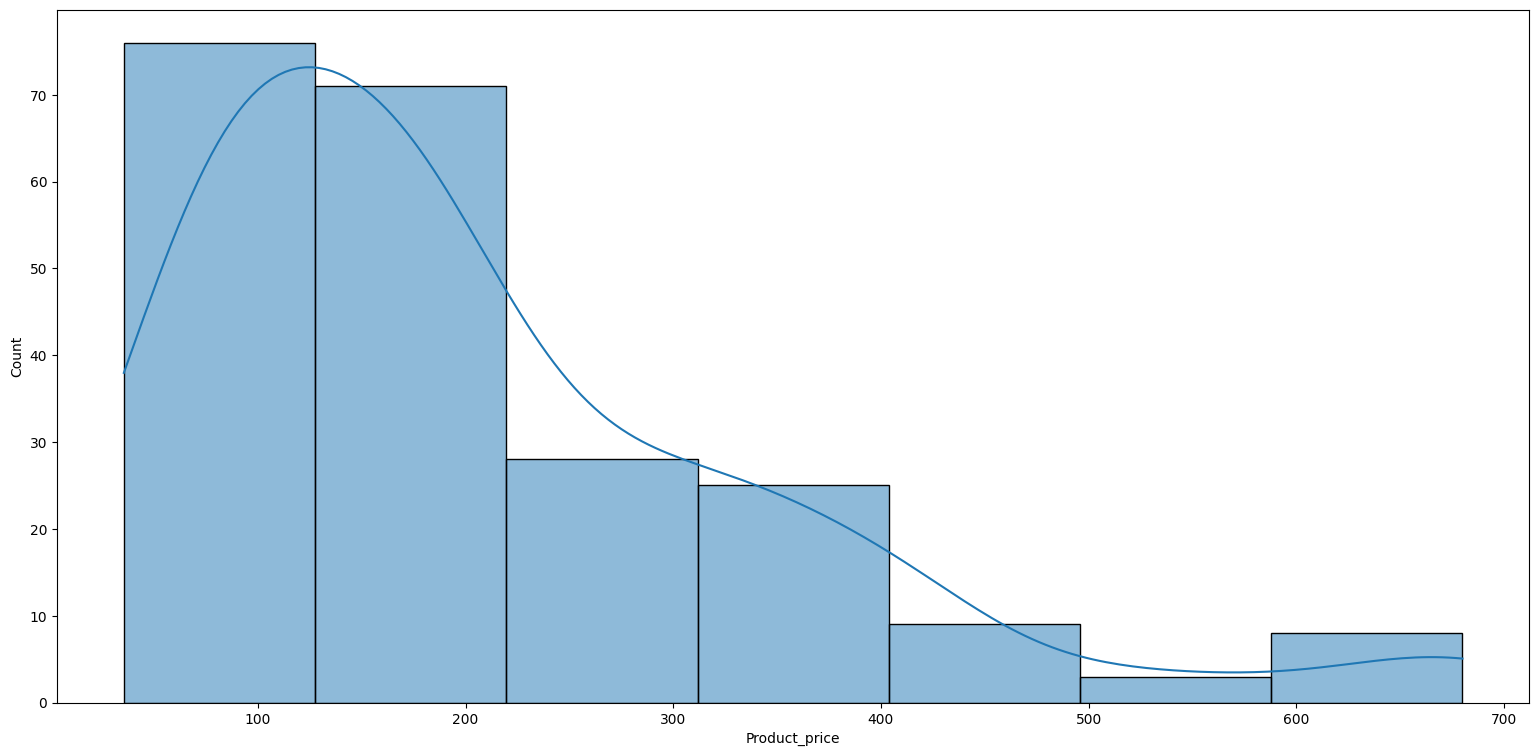

In [243]:
plt.figure(figsize=(19,9))
sns.histplot(df_th_halal['Product_price'], kde=True, bins= 7)
plt.show()

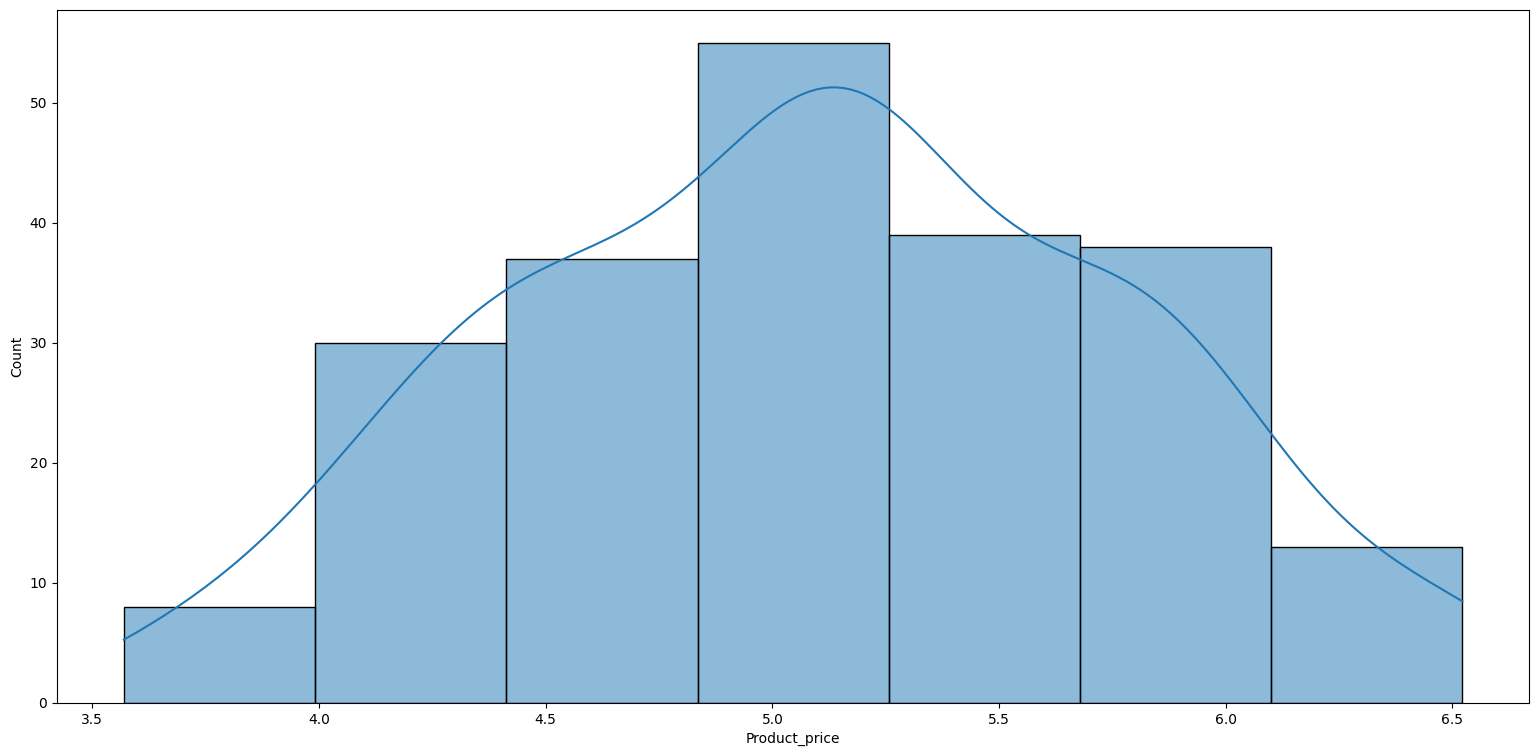

In [244]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_th_halal['Product_price']), kde=True, bins= 7)
plt.show()

#### Data Non-Halal Thai

In [245]:
df_th_nonhalal

Product_name  Product_price  \
0    RED BULL Energy Drink (Europe Imported) เรดบูล...         349.00   
1    เรดบูล เอ็กซ์ตร้า 170 มล. 24 ขวด ยกลัง RED BUL...         349.00   
3    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส เมนโทลิปตัส 170 มล...         348.00   
4    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส วอเตอร์เมลอน 170 ม...         348.00   
6               Red Bull Energy Drink 250 ml x 24 Cans        1999.00   
..                                                 ...            ...   
545  เถ้าแก่น้อย - สาหร่ายอบลองชีต รสออริจินัล 1.6 ...         144.00   
546  เถ้าแก่น้อยบิ๊กโรล สาหร่ายโรลปรุงรส 3 กรัม (แพ...          47.00   
547  Taokaenoi Special Box Set Zee-Nunew ชุดสุดพิเศ...        1700.00   
549  [แพ็คสุดคุ้ม 12 ซอง] เถ้าแก่น้อย สาหร่ายปรุงรส...          60.00   
552  Tao Kae Noi Seasoned Seaweed Big Sheet, Origin...          99.00   

     Product_sold Product_location Product_category  
0              90     Samut Prakan  Makanan/minuman  
1            8012          Bangkok  Makanan/minuman  
3             100          Bangkok  Makanan/minuman  
4             131          Bangkok  Makanan/minuman  
6              14          Bangkok  Makanan/minuman  
..            ...              ...              ...  
545            83          Bangkok  Makanan/minuman  
546            90          Bangkok  Makanan/minuman  
547            66          Bangkok  Makanan/minuman  
549            45          Bangkok  Makanan/minuman  
552            20          Lampang  Makanan/minuman  

[401 rows x 5 columns]

In [246]:
df_th_nonhalal.describe()

Product_price  Product_sold
count         401.00        401.00
mean          189.32        870.84
std           371.83       1474.74
min            12.00          5.00
25%            62.00         38.00
50%           106.00        192.00
75%           182.00       1072.00
max          4790.00       9328.00

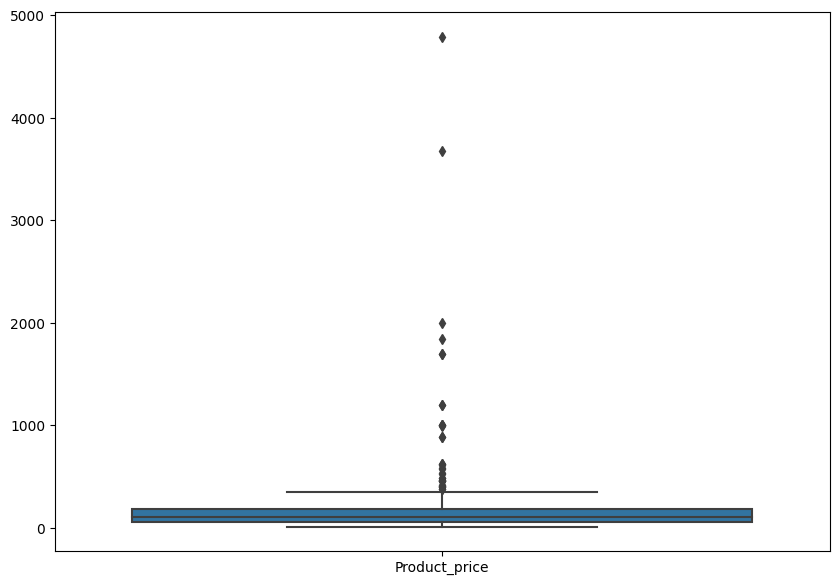

In [247]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_th_nonhalal[['Product_price']])
plt.show()

In [248]:
Q1 = df_th_nonhalal['Product_price'].quantile(0.25)
Q3 = df_th_nonhalal['Product_price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
# df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] < lower_1, lower_1, df_ina_halal['Product_price'])
# df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] > upper_1, upper_1, df_ina_halal['Product_price'])
df_th_nonhalal = df_th_nonhalal[(df_th_nonhalal['Product_price'] >= lower_bound) & (df_th_nonhalal['Product_price'] <= upper_bound)]

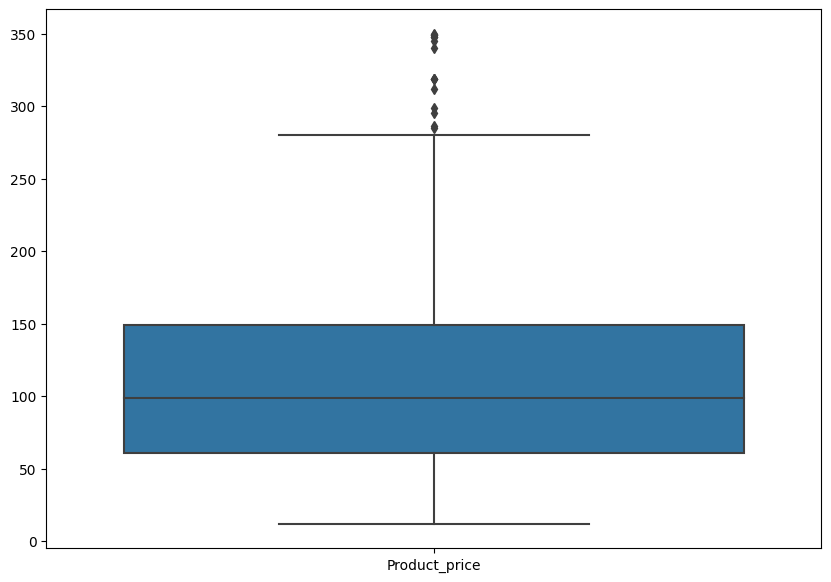

In [249]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_th_nonhalal[['Product_price']])
plt.show()

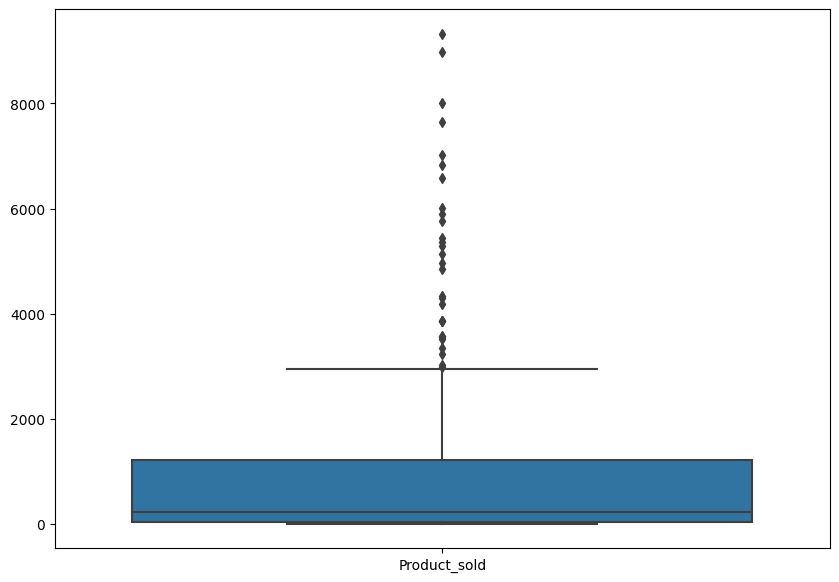

In [250]:
plt.figure(figsize=(10,7))
sns.boxplot(data= df_th_nonhalal[['Product_sold']])
plt.show()

In [251]:
df_th_nonhalal = df_th_nonhalal.loc[(df_th_nonhalal['Product_sold'] >= 50.0) & (df_th_nonhalal['Product_sold'] <= 1200)]

In [252]:
# Q1_1 = df_th_nonhalal['Product_sold'].quantile(0.25)
# Q3_1 = df_th_nonhalal['Product_sold'].quantile(0.75)
# IQR_1 = Q3_1-Q1_1
# lower_1 = Q1_1 - 1.5*IQR_1
# upper_1 = Q1_1 + 1.5*IQR_1
# # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] < lower_1, lower_1, df_ina_halal['Product_price'])
# # df_ina_halal['Product_price'] = np.where(df_ina_halal['Product_price'] > upper_1, upper_1, df_ina_halal['Product_price'])
# df_th_nonhalal = df_th_nonhalal[(df_th_nonhalal['Product_sold'] >= lower_1) & (df_th_nonhalal['Product_sold'] <= upper_1)]

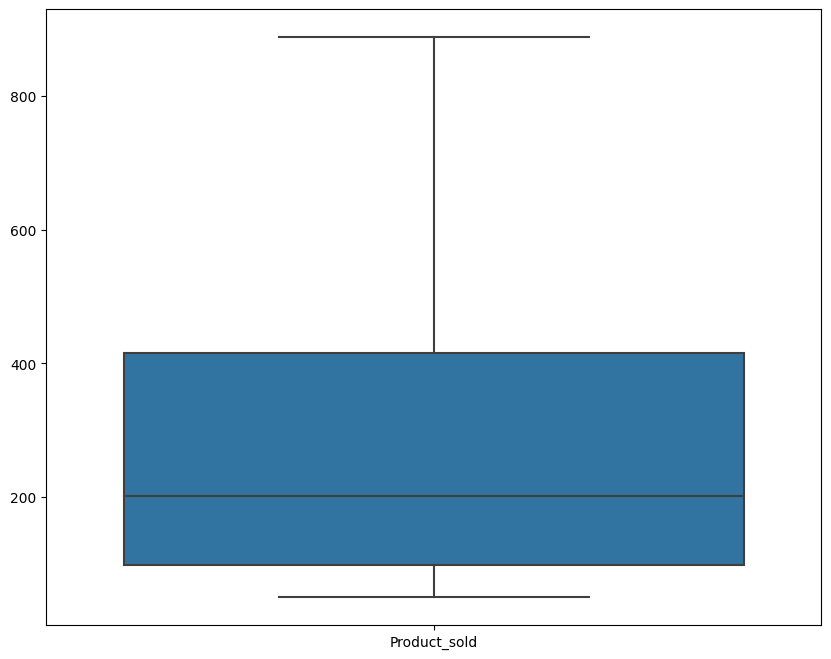

In [253]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df_th_halal[['Product_sold']])
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\3338259068.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_th_nonhalal.corr(), annot=True)


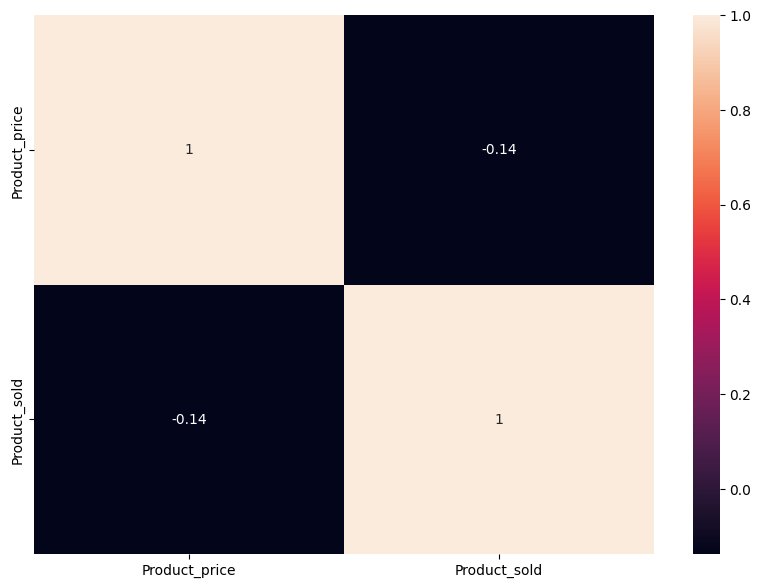

In [254]:
plt.figure(figsize=(10,7))
sns.heatmap(df_th_nonhalal.corr(), annot=True)
plt.show()

In [255]:
df_th_nonhalal['Product_revenue'] = df_th_nonhalal['Product_price'] * df_th_nonhalal['Product_sold']

In [256]:
df_th_nonhalal['Country_label'] = 'THA'

In [257]:
df_th_nonhalal

Product_name  Product_price  \
0    RED BULL Energy Drink (Europe Imported) เรดบูล...         349.00   
3    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส เมนโทลิปตัส 170 มล...         348.00   
4    เรดบูล กลิ่นฮอลล์ เอ็กซ์เอส วอเตอร์เมลอน 170 ม...         348.00   
8    Paulaner Non-Alcoholic Weissbier 0,0% 500 ml. ...         185.00   
40   KHAO SHONG 3IN1 COFFEE MIXED POWDER  ESPRESSO...         103.00   
..                                                 ...            ...   
534  เถ้าแก่น้อย บิ๊กโรล สาหร่ายม้วนย่างสไตล์ญี่ปุ่...          61.00   
536  ก็อดบาวี่ ยากิซูซิโนริ สาหร่ายแผ่นอบแห้งสำหรับ...          45.00   
537  ก็อดบาวี่ สาหร่าย ซีวีด ออริจินัล (5กรัม x 3) ...          45.00   
545  เถ้าแก่น้อย - สาหร่ายอบลองชีต รสออริจินัล 1.6 ...         144.00   
546  เถ้าแก่น้อยบิ๊กโรล สาหร่ายโรลปรุงรส 3 กรัม (แพ...          47.00   

     Product_sold          Product_location Product_category  Product_revenue  \
0              90              Samut Prakan  Makanan/minuman         31410.00   
3             100                   Bangkok  Makanan/minuman         34800.00   
4             131                   Bangkok  Makanan/minuman         45588.00   
8              67                   Bangkok  Makanan/minuman         12395.00   
40            768  Phra Nakhon Si Ayutthaya  Makanan/minuman         79104.00   
..            ...                       ...              ...              ...   
534           199                   Bangkok  Makanan/minuman         12139.00   
536           675                   Bangkok  Makanan/minuman         30375.00   
537           613                   Bangkok  Makanan/minuman         27585.00   
545            83                   Bangkok  Makanan/minuman         11952.00   
546            90                   Bangkok  Makanan/minuman          4230.00   

    Country_label  
0             THA  
3             THA  
4             THA  
8             THA  
40            THA  
..            ...  
534           THA  
536           THA  
537           THA  
545           THA  
546           THA  

[171 rows x 7 columns]

In [258]:
df_th_nonhalal.describe()

Product_price  Product_sold  Product_revenue
count         171.00        171.00           171.00
mean          113.21        384.05         40256.40
std            72.31        324.43         42630.63
min            12.00         50.00           996.00
25%            58.50        111.00         10257.00
50%            99.00        257.00         26509.00
75%           149.50        614.00         49718.50
max           350.00       1172.00        233244.00

In [259]:
# Querry
Category_th_nonhalal = df_th_nonhalal['Product_category'].value_counts()
Location_th_nonhalal = df_th_nonhalal['Product_location'].value_counts()
Sold_th_nonhalal = df_th_nonhalal.groupby('Product_category')['Product_sold'].sum()
Location_th_nonhalal = Location_th_nonhalal.head(5)

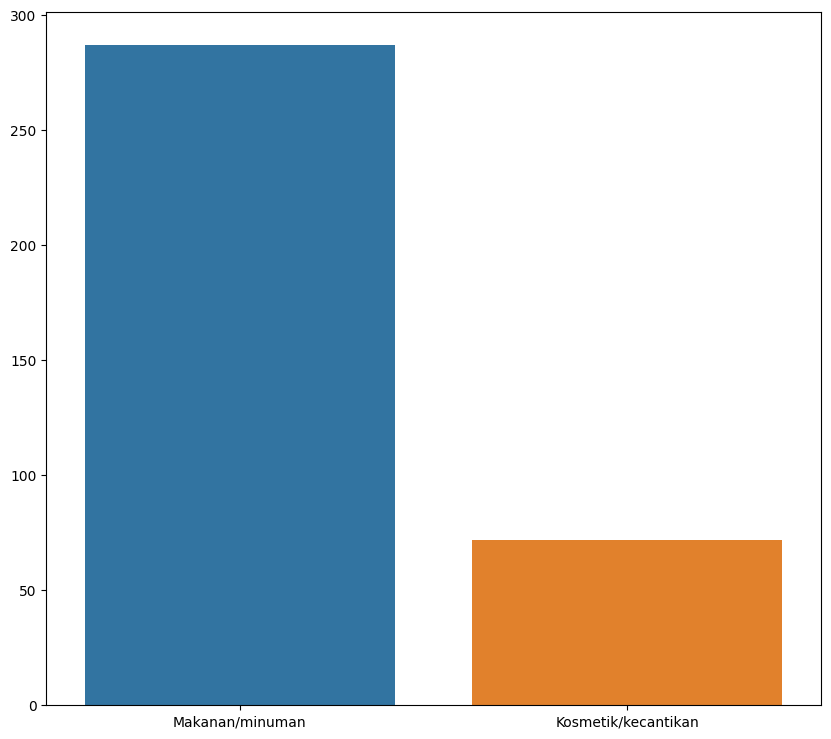

In [260]:
plt.figure(figsize=(10,9))
sns.barplot(x= Category_ina_halal.index, y= Category_ina_halal.values)
plt.show()

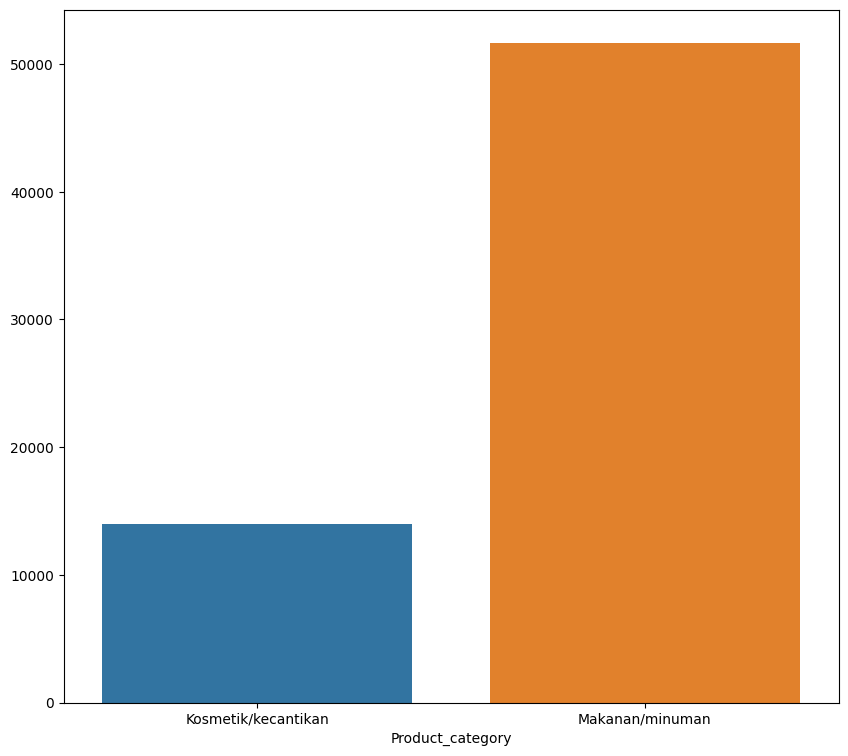

In [261]:
plt.figure(figsize=(10,9))
sns.barplot(x= Sold_th_nonhalal.index, y= Sold_th_nonhalal.values)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_1140\474241099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_th_nonhalal.corr(), annot=True)


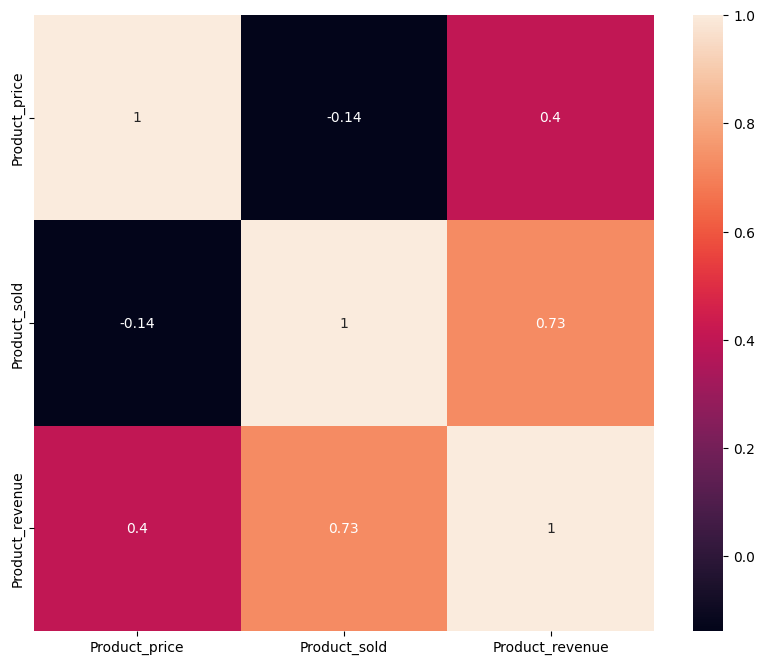

In [262]:
plt.figure(figsize=(10,8))
sns.heatmap(df_th_nonhalal.corr(), annot=True)
plt.show()

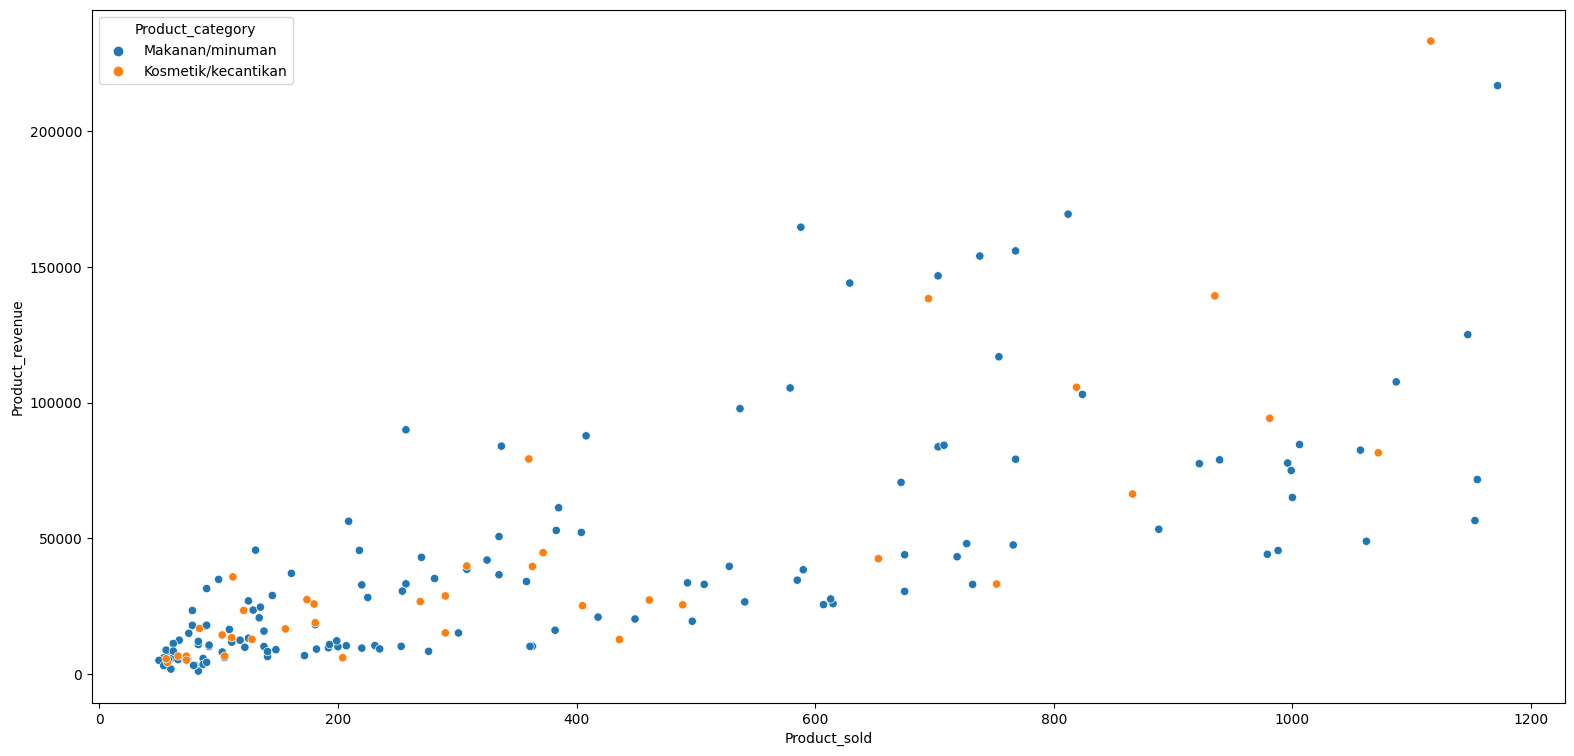

In [263]:
plt.figure(figsize=(19,9))
sns.scatterplot(x= 'Product_sold', y= 'Product_revenue', hue='Product_category', data= df_th_nonhalal)
plt.show()

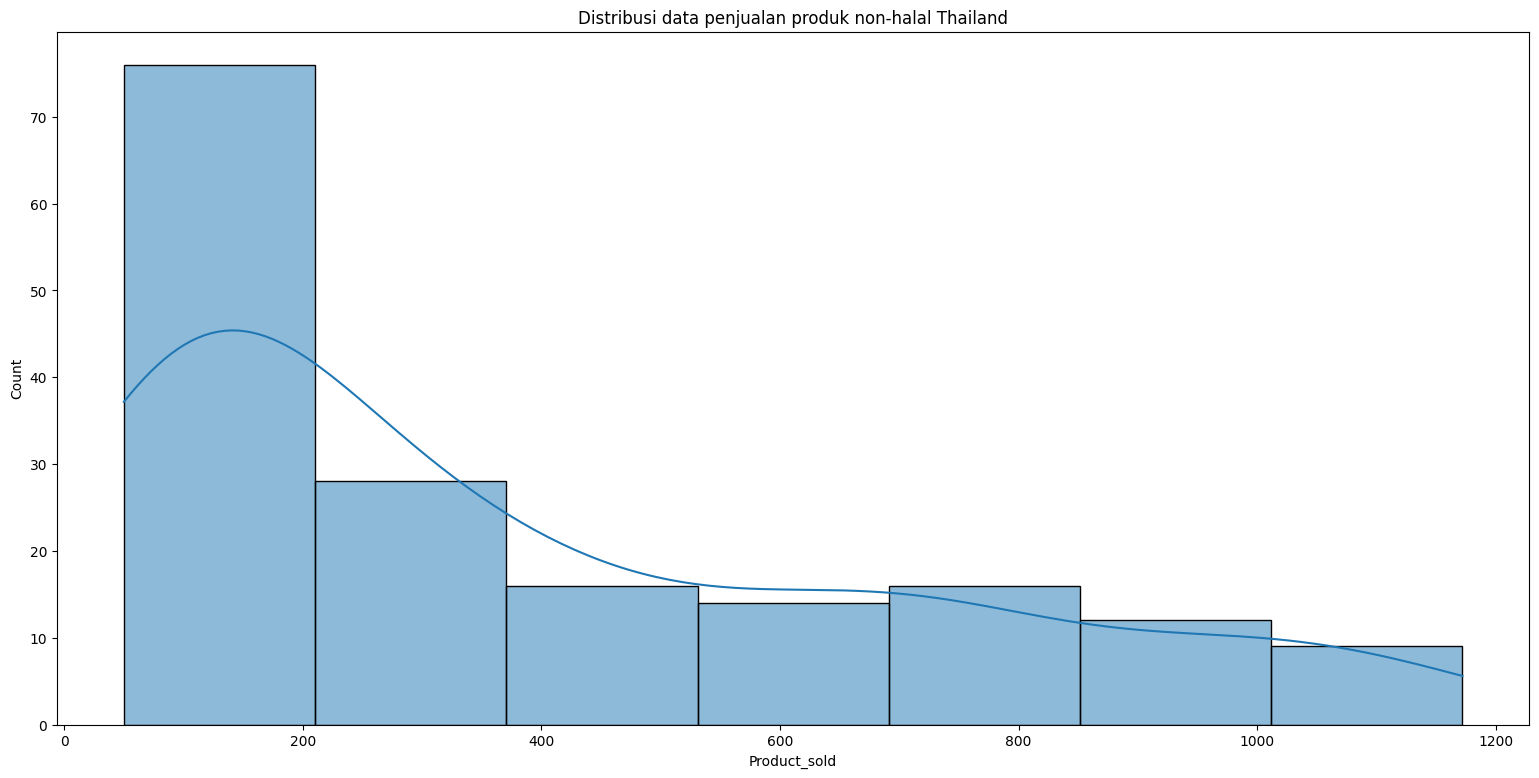

In [264]:
plt.figure(figsize=(19,9))
sns.histplot(df_th_nonhalal['Product_sold'], kde=True, bins= 7)
plt.title('Distribusi data penjualan produk non-halal Thailand')
plt.show()

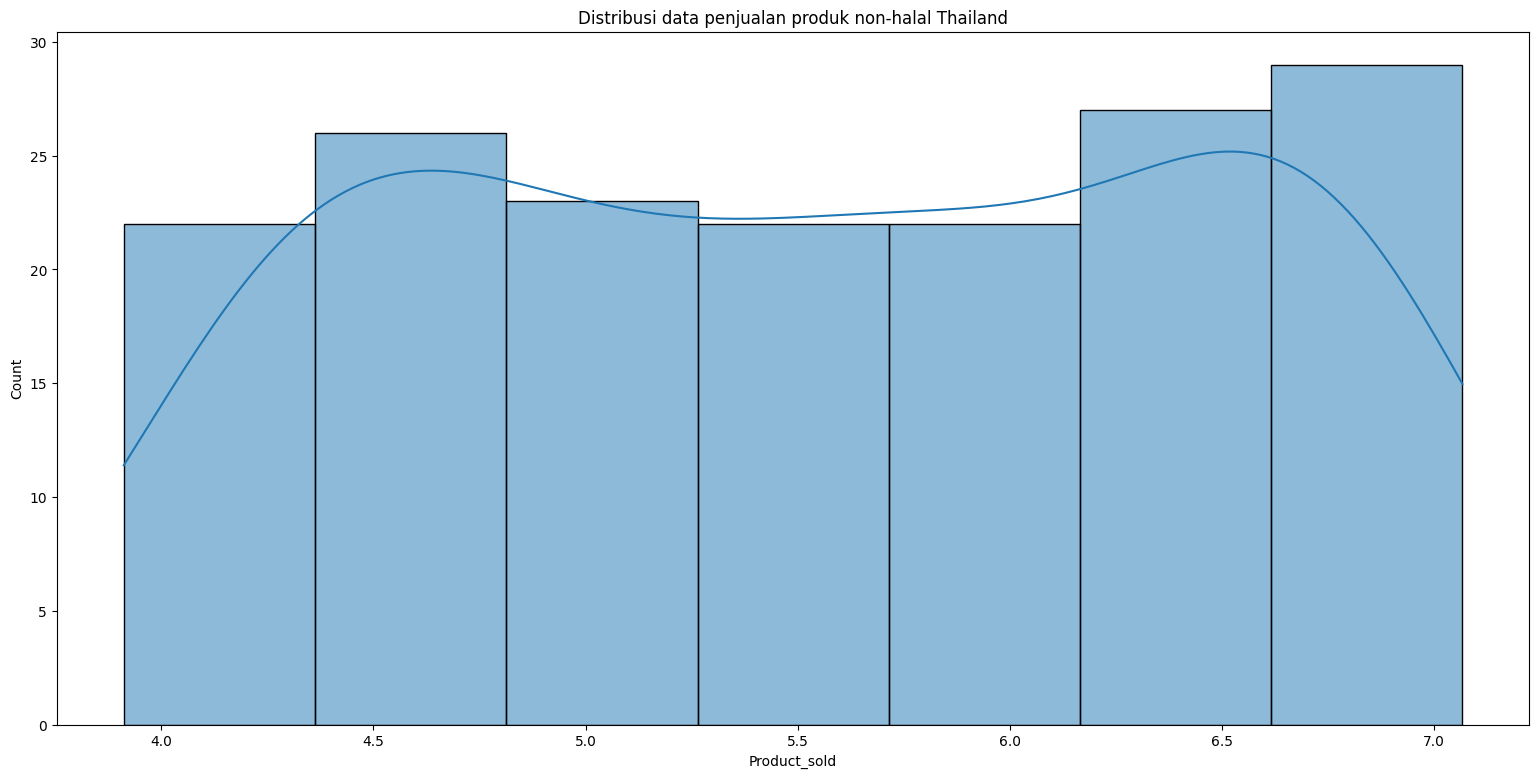

In [265]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_th_nonhalal['Product_sold']), kde=True, bins= 7)
plt.title('Distribusi data penjualan produk non-halal Thailand')
plt.show()

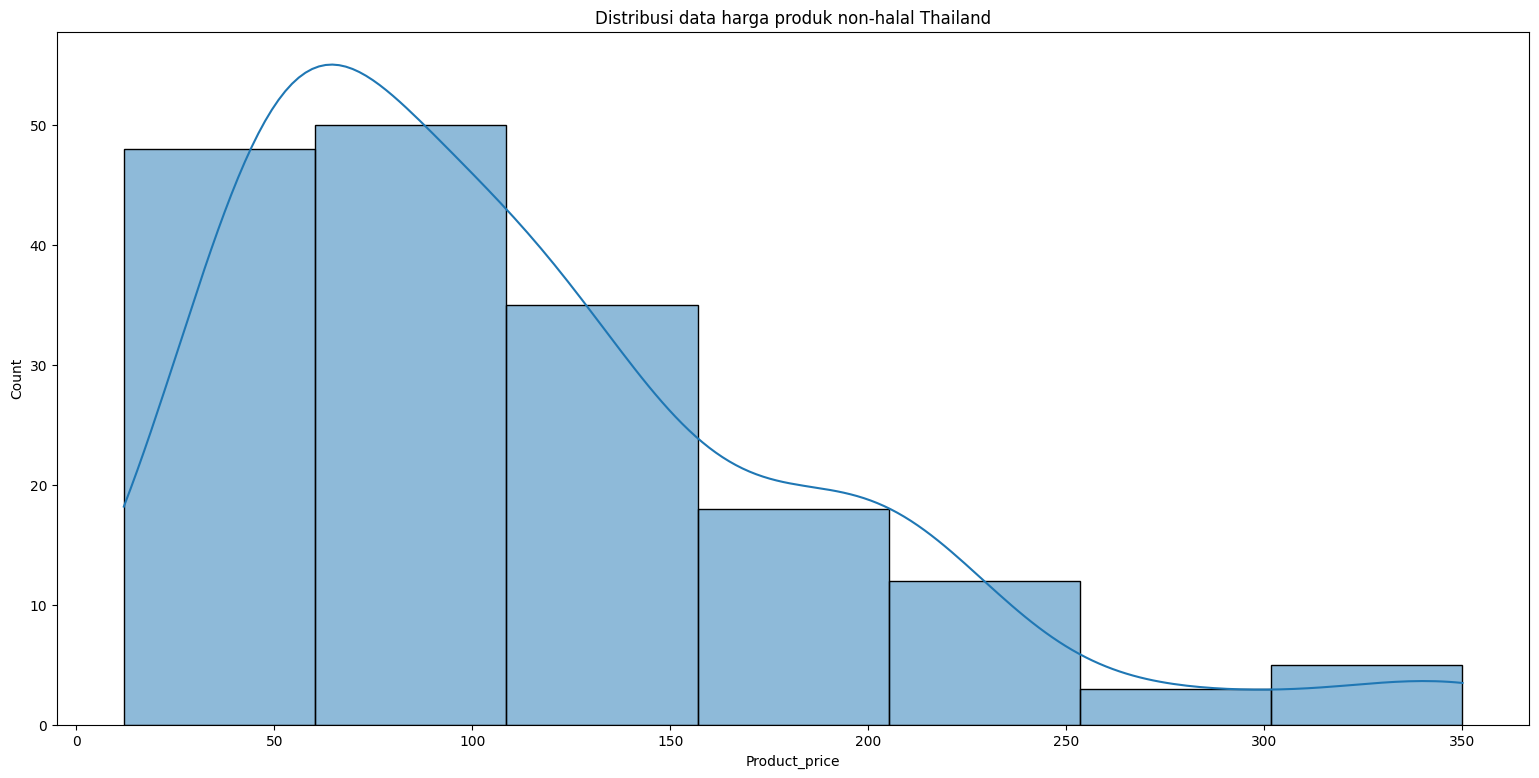

In [266]:
plt.figure(figsize=(19,9))
sns.histplot(df_th_nonhalal['Product_price'], kde=True, bins= 7)
plt.title('Distribusi data harga produk non-halal Thailand')
plt.show()

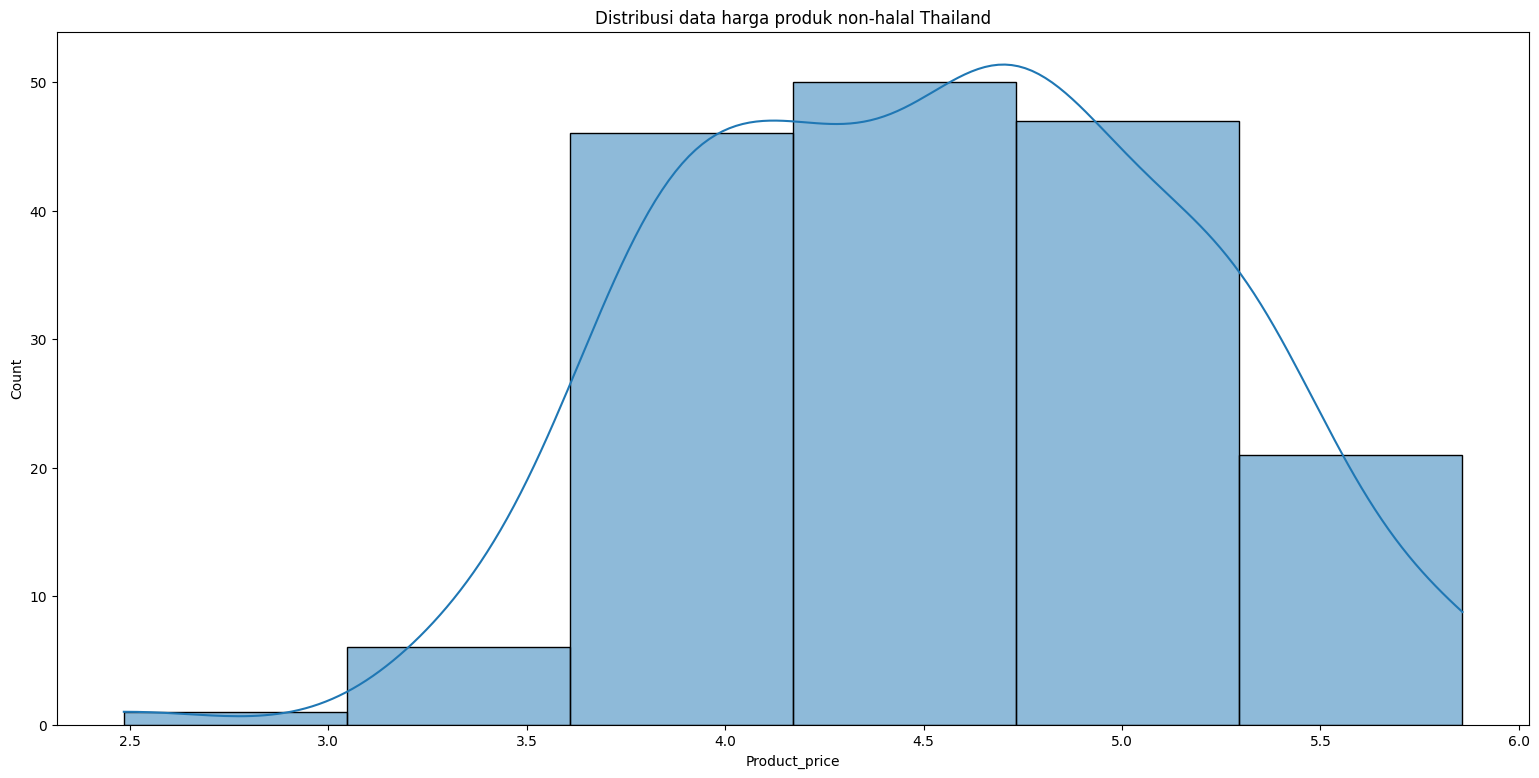

In [267]:
plt.figure(figsize=(19,9))
sns.histplot(np.log(df_th_nonhalal['Product_price']), kde=True, bins= 6)
plt.title('Distribusi data harga produk non-halal Thailand')
plt.show()

In [268]:
data_merge_halal = pd.concat([df_ina_halal, df_my_halal, df_sg_halal, df_th_halal])

In [269]:
data_merge_halal 

Product_name  Product_price  \
11   Indomie Mi Instan Goreng Jumbo Rasa Ayam Pangg...       21100.00   
20                       JUMBO INDOMIE MI GORENG JUMBO        4114.00   
23                                 indomie AYAM GEPREK        3588.00   
24                              INDOMIE KARI KARE AYAM        3588.00   
26   Paket Bundling Indomie Mie Instan Goreng Rasa ...       16050.00   
..                                                 ...            ...   
613  HOTTA Original Ginger with Honey Instant Ginge...         180.00   
614  HOTTA Plus Ginger With Ginseng Extract Instant...         230.00   
615  HOTTA 100% Ginger Instant Ginger 7g.x10 Sachet...         164.00   
623  HOTTA ฮอทต้า เครื่องดื่มขิงผงสำเร็จรูป ผสมน้ำผ...         120.00   
627  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...         359.00   

     Product_sold      Product_location Product_category  Product_revenue  \
11            335  Kota Jakarta Selatan  Makanan/minuman       7068500.00   
20            901        Kab. Mojokerto  Makanan/minuman       3706714.00   
23            509        Kab. Mojokerto  Makanan/minuman       1826292.00   
24            703        Kab. Mojokerto  Makanan/minuman       2522364.00   
26            700        Kota Tangerang  Makanan/minuman      11235000.00   
..            ...                   ...              ...              ...   
613            60               Bangkok  Makanan/minuman         10800.00   
614           121               Bangkok  Makanan/minuman         27830.00   
615           113               Bangkok  Makanan/minuman         18532.00   
623            90               Bangkok  Makanan/minuman         10800.00   
627            55          Kanchanaburi  Makanan/minuman         19745.00   

    Country_label  
11            INA  
20            INA  
23            INA  
24            INA  
26            INA  
..            ...  
613           THA  
614           THA  
615           THA  
623           THA  
627           THA  

[1310 rows x 7 columns]

In [271]:
data_merge_halal = data_merge_halal.reset_index(drop=True)

In [272]:
data_merge_halal

Product_name  Product_price  \
0     Indomie Mi Instan Goreng Jumbo Rasa Ayam Pangg...       21100.00   
1                         JUMBO INDOMIE MI GORENG JUMBO        4114.00   
2                                   indomie AYAM GEPREK        3588.00   
3                                INDOMIE KARI KARE AYAM        3588.00   
4     Paket Bundling Indomie Mie Instan Goreng Rasa ...       16050.00   
...                                                 ...            ...   
1305  HOTTA Original Ginger with Honey Instant Ginge...         180.00   
1306  HOTTA Plus Ginger With Ginseng Extract Instant...         230.00   
1307  HOTTA 100% Ginger Instant Ginger 7g.x10 Sachet...         164.00   
1308  HOTTA ฮอทต้า เครื่องดื่มขิงผงสำเร็จรูป ผสมน้ำผ...         120.00   
1309  HOTTA ฮอทต้า ขิงผงสำเร็จรูป สูตรเข้มข้น ผสมหญ้...         359.00   

      Product_sold      Product_location Product_category  Product_revenue  \
0              335  Kota Jakarta Selatan  Makanan/minuman       7068500.00   
1              901        Kab. Mojokerto  Makanan/minuman       3706714.00   
2              509        Kab. Mojokerto  Makanan/minuman       1826292.00   
3              703        Kab. Mojokerto  Makanan/minuman       2522364.00   
4              700        Kota Tangerang  Makanan/minuman      11235000.00   
...            ...                   ...              ...              ...   
1305            60               Bangkok  Makanan/minuman         10800.00   
1306           121               Bangkok  Makanan/minuman         27830.00   
1307           113               Bangkok  Makanan/minuman         18532.00   
1308            90               Bangkok  Makanan/minuman         10800.00   
1309            55          Kanchanaburi  Makanan/minuman         19745.00   

     Country_label  
0              INA  
1              INA  
2              INA  
3              INA  
4              INA  
...            ...  
1305           THA  
1306           THA  
1307           THA  
1308           THA  
1309           THA  

[1310 rows x 7 columns]

# Data Modelling

### Analisis ANOVA akan di bagi menjadi dua yaitu: 
1. Melihat perbandingan produk halal dan non halal pada masing-masing negara
2. Melihat Perbandingan produk halal dan non halal pada negara yang berbeda 

### Sebelum melakukan analisis ANOVA, ada beberapa syarat yang harus dipenuhi yaitu:
1. Variabel yang akan dilakukan perbandingan bersifat independen atau tidak terikat satu sama lain
2. Asumsi Data berdistrubusi normal
3. Asumi Data memiliki Varians yang sama

#### Pengujian produk halal

In [ ]:
# df_ina_halal.groupby('Product_category').agg({'Product_revenue': ['mean', 'count', 'sum']})

**Uji Normalitas**

In [ ]:
# Melakukan uji normalistas
# Menggunakan Saphiwo wilk
# Dengan Asumsi
# H0 : Data berdistribusi normal
# H1 : Data tidak berdistribusi normal
list_negara = ['ina', 'my', 'sg', 'th']
for i in list_negara:
    if i == 'ina':
        stats, pvalue = shapiro(df_ina_halal['Product_sold'])
    elif i == 'my':
        stats, pvalue = shapiro(df_my_halal['Product_sold'])
    elif i == 'sg':
        stats, pvalue = shapiro(df_sg_halal['Product_sold'])
    else:
        stats, pvalue = shapiro(df_th_halal['Product_sold'])
    print(i,' p-value:', '%.20f' % pvalue, 'stats:', stats)

In [ ]:
for i in list_negara:
    if i == 'ina':
        stats, pvalue = kstest(df_ina_halal['Product_sold'], 'norm')
    elif i == 'my':
        stats, pvalue = kstest(df_my_halal['Product_sold'], 'norm')
    elif i == 'sg':
        stats, pvalue = kstest(df_sg_halal['Product_sold'], 'norm')
    else:
        stats, pvalue = kstest(df_th_halal['Product_sold'], 'norm')
    print(i,' p-value:', '%.20f' % pvalue, 'stats:', stats)

In [ ]:
stats, pvalue = levene(df_ina_halal['Product_sold'], df_sg_halal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
stats, pvalue = levene(df_ina_halal['Product_sold'], df_th_halal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
stats, pvalue = levene(df_my_halal['Product_sold'], df_th_halal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
stats, pvalue = levene(df_my_halal['Product_sold'], df_sg_halal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

**Uji Anova Non-Parametrik**

In [ ]:
from itertools import combinations
groups = [df_ina_halal['Product_sold'], # 0
          df_my_halal['Product_sold'],  # 1
          df_sg_halal['Product_sold'],  # 2
          df_th_halal['Product_sold']]  # 3

for i, j in combinations(range(len(groups)), 2):
    group_i = groups[i]
    group_j = groups[j]
    stats, pvalue = kruskal(group_i, group_j)
    print(f"Perbandingan {i} - {j}: Stats = {'%.4f' % stats}, p-value = {'%.10f' % pvalue}")

#### Pengujian produk Non-Halal

**Uji Normalitas**

In [ ]:
for i in list_negara:
    if i == 'ina':
        stats, pvalue = shapiro(df_ina_nonhalal['Product_sold'])
    elif i == 'my':
        stats, pvalue = shapiro(df_my_nonhalal['Product_sold'])
    elif i == 'sg':
        stats, pvalue = shapiro(df_sg_nonhalal['Product_sold'])
    else:
        stats, pvalue = shapiro(df_th_nonhalal['Product_sold'])
    print(i,' p-value:', '%.20f' % pvalue, 'stats:', stats)

In [ ]:
for i in list_negara:
    if i == 'ina':
        stats, pvalue = kstest(df_ina_nonhalal['Product_sold'], 'norm')
    elif i == 'my':
        stats, pvalue = kstest(df_my_nonhalal['Product_sold'], 'norm')
    elif i == 'sg':
        stats, pvalue = kstest(df_sg_nonhalal['Product_sold'], 'norm')
    else:
        stats, pvalue = kstest(df_th_nonhalal['Product_sold'], 'norm')
    print(i,' p-value:', '%.20f' % pvalue, 'stats:', stats)

In [ ]:
stats, pvalue = levene(df_ina_nonhalal['Product_sold'], df_sg_nonhalal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
stats, pvalue = levene(df_ina_nonhalal['Product_sold'], df_th_nonhalal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
stats, pvalue = levene(df_my_nonhalal['Product_sold'], df_sg_nonhalal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
stats, pvalue = levene(df_my_nonhalal['Product_sold'], df_th_nonhalal['Product_sold'])
print('stats:', '%.4f' % stats)
print('p-value:', '%.10f' % pvalue)

In [ ]:
# stats, pvalue = f_oneway(df_my_nonhalal['Product_sold'], df_sg_nonhalal['Product_sold'])
# print('stats:', '%.4f' % stats)
# print('p-value:', '%.10f' % pvalue)
# **Uji Anova Non-Parametrik**

**Uji Anova Non-Parametrik**

In [ ]:
groups = [df_ina_nonhalal['Product_sold'], 
          df_my_nonhalal['Product_sold'],
          df_sg_nonhalal['Product_sold'], 
          df_th_nonhalal['Product_sold']]

for i, j in combinations(range(len(groups)), 2):
    group_i = groups[i]
    group_j = groups[j]
    stats, pvalue = kruskal(group_i, group_j)
    print(f"Perbandingan {i} - {j}: Stats = {'%.4f' % stats}, p-value = {'%.10f' % pvalue}")

In [ ]:
# sum_sold_ina = df_ina_halal[:272]

In [ ]:
merge_sold = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Export\Merge_sold.csv')
merge_sold

In [ ]:
merge_sold.info()

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=merge_sold['Product_sold'],     # Data
                          groups=merge_sold['Negara_halal'],   # Groups
                          alpha=0.05)   
print(tukey.summary())

In [ ]:
# comparison = MultiComparison(merge_sold['Product_sold'], merge_sold['Negara_halal'])
# tukey = comparison.tukeyhsd(0.05)
# print(tukey.summary())

In [ ]:
merge_sold_nonhalal = pd.read_csv('D:\Kuliah\SKRIPSI\Project_skripsi\Export\Merge_sold_nonhalal.csv')
merge_sold_nonhalal

In [ ]:
tukey = pairwise_tukeyhsd(endog=merge_sold_nonhalal['Product_sold'],     # Data
                          groups=merge_sold_nonhalal['Negara_nonhalal'],   # Groups
                          alpha=0.05)   
print(tukey.summary())